In [122]:
import random
import time
import pygame
import numpy as np
from pygame.locals import *
from pygame.color import *
import pymunk
from pymunk import Vec2d
import pymunk.pygame_util
from IPython.display import Image 
import csv
import pandas as pd
import sys
import distutils.util
import matplotlib.pyplot as plt
%cd '/Users/xiaoyingliu/desktop'

/Users/xiaoyingliu/Desktop


In [9]:
# Some general variables -- you don't need to change any of these
N_BLOCKS = 6 # How many blocks will fall?
BLOCK_SIZE = 20 # How big are the blocks?
deltaY     = 35 # How far spaced out vertically are they?
xSD        = 30.0 # What is the SD for their x-locations?
FPS = 30. # how many frames per second do we run?
BLOCK_MASS = 1.0
BLOCK_FRICTION = 1.0
FLOOR = 100
RUN_TIME = 20.0 # Time in seconds that we will run a simulation for -- this was increased to be sure we run for long enough across platforms
STEPS_PER_FRAME = 5.0 # Do not change this
WIDTH = 600 # Screen dimensions -- don't change
HEIGHT = 600


class BlockTower:
    # Implement a class to show/simulate blocks falling via pymunk
    # Note: this code has been modified from the pymunk pyramid demo

    def __init__(self, positions):
        # The intializer takes a list of x-positions for blocks; their height is set
        # by the code here.
        assert(len(positions)==N_BLOCKS) # can't give more than N_BLOCKS since we need to draw them

        self.positions = positions # store the positions of our blocks

        # Set up some pygame stuff
        self.running = True
        self.physics_running = False
        self.start_time = 0
        self.drawing = True
        self.w, self.h = WIDTH,HEIGHT
        self.screen = pygame.display.set_mode((self.w, self.h))
        self.clock = pygame.time.Clock()

        ### Init pymunk and create space
        self.space = pymunk.Space()
        self.space.gravity = (0.0, -900.0)
        self.space.sleep_time_threshold = 0.3

        self.floor = pymunk.Segment(self.space.static_body, (0, FLOOR), (self.w,FLOOR), 1.0)
        self.floor.friction = 1.0
        self.space.add(self.floor)

        # Draw each block and add it to the physics
        for i in range(N_BLOCKS):
            points = [(-BLOCK_SIZE, -BLOCK_SIZE), (-BLOCK_SIZE, BLOCK_SIZE), (BLOCK_SIZE,BLOCK_SIZE), (BLOCK_SIZE, -BLOCK_SIZE)]
            moment = pymunk.moment_for_poly(BLOCK_MASS, points, (0,0))
            body = pymunk.Body(BLOCK_MASS, moment)
            xpos = self.positions[i]
            ypos = FLOOR + (2*i+1) * deltaY
            body.position = Vec2d(xpos,ypos)
            shape = pymunk.Poly(body, points)
            if(i == N_BLOCKS-1):     # color the top
                shape.color = (1,0,0,1)
                self.target_block = shape # store the top one we are tracking
            shape.friction = 1
            self.space.add(body,shape)

        ### draw options for drawing
        self.draw_options = pymunk.pygame_util.DrawOptions(self.screen)
        
    def change_x_y(self, new_x):
        # This is what you should call instead of initializing new objects
        # this resets the y-positions and puts the blocks at the specified x positions
        self.space.remove(self.space.bodies)
        self.__init__(new_x)

    def is_black_block_on_floor(self):
        # Returns true or false depending on whether the black block is on the bottom
        col = self.target_block.shapes_collide(self.floor) # this resturns a ContactPointSet
        return len(col.points) > 0

    def run_person(self):
        # Show a window where people can predict yes/no (y/n) for whether the black block hits the bottom.
        # After they respond, they can observe the physics.
        # Returns their prediction and whether the black block actually hit the floor

        prediction = None # what people predicted?

        # Call this to run a single simulation with the given positions
        while self.running and (time.time() - self.start_time) < RUN_TIME or self.start_time==0:
            for event in pygame.event.get():
                if event.type == QUIT:
                    self.running = False
                elif event.type == KEYDOWN and event.key == K_ESCAPE:
                    self.running = False
                elif event.type == KEYDOWN and (event.key == K_y or event.key==K_n):  ## This detects a space press and starts simulating
                    prediction = (event.key == K_y)
                    self.physics_running = True
                    self.start_time = time.time()  # remember the time that physics started running
            if self.physics_running:
                self.space.step(1.0 / FPS / STEPS_PER_FRAME)  ## conveera frames per second to internal clock tics -- don't change!

            if self.drawing:
                self.draw()

            self.clock.tick(FPS) # don't let this loop run faster than FPS
        return (prediction, self.is_black_block_on_floor())

    
    def simulate(self):        
        # Just run a simulation, returning whether after 10s the black block hits the floor        
        for s in range(int(FPS*5*RUN_TIME)): # run for 10s            
            self.space.step(1.0 / FPS / STEPS_PER_FRAME) # run this many steps        
            return self.is_black_block_on_floor()

    def draw(self):
        ### This gets called to draw the scene
        win = pygame.display.set_mode((800, 800))
        ### Clear the screen
        self.screen.fill(THECOLORS["white"])
        ### Draw space  with our given options
        self.space.debug_draw(self.draw_options)

        ### All done, lets flip the display, which will cause it to be displayed
        pygame.display.flip()
        pygame.image.save(win, 'screenshot.jpg')


In [14]:
#1.200 trials, save starting positions, my predictions and simulation result as a csv file. 
def trial(n):
    result=[]
    for i in range(0,n):
        positions = [np.random.normal(WIDTH/2, xSD) for i in range(N_BLOCKS)]
        bt=BlockTower(positions)
        result.append(positions)
        bt.draw()
        display(Image(filename='screenshot.jpg') )
        guess=input()
        bt.simulate()
        result.append([guess,bt.simulate()])
    return result


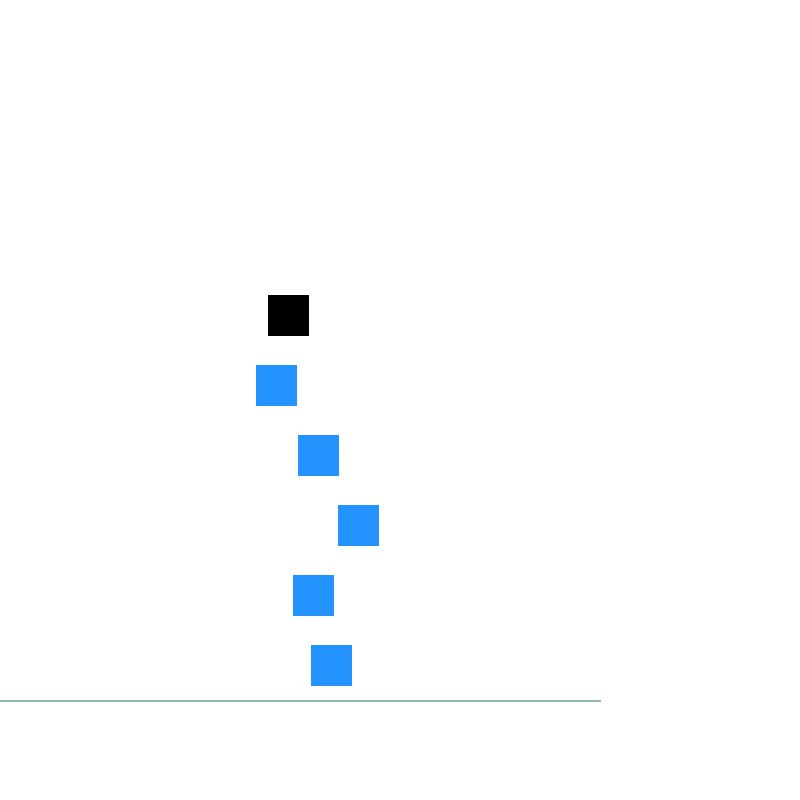

F


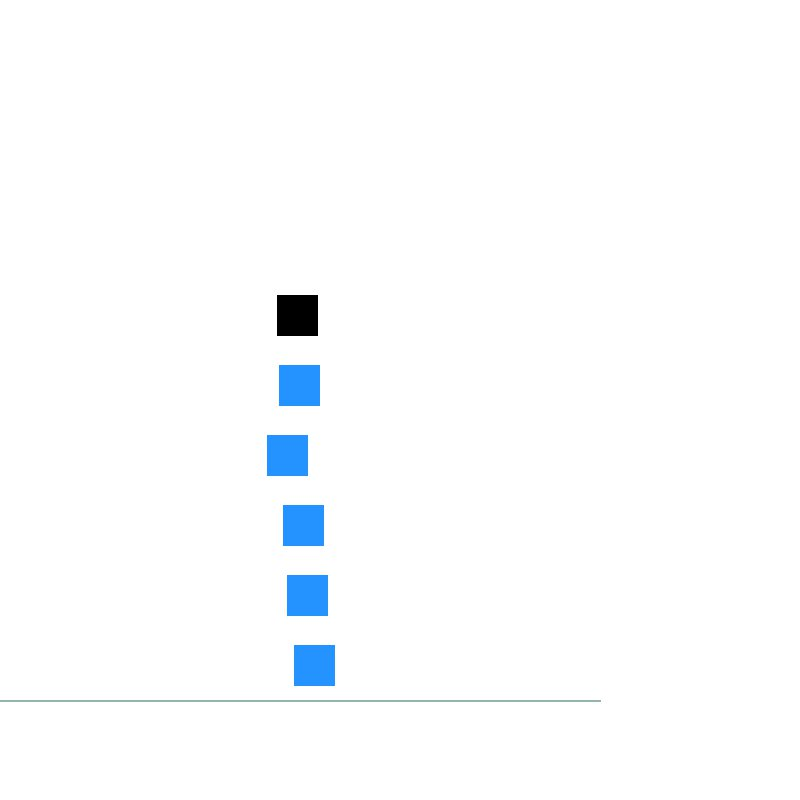

T


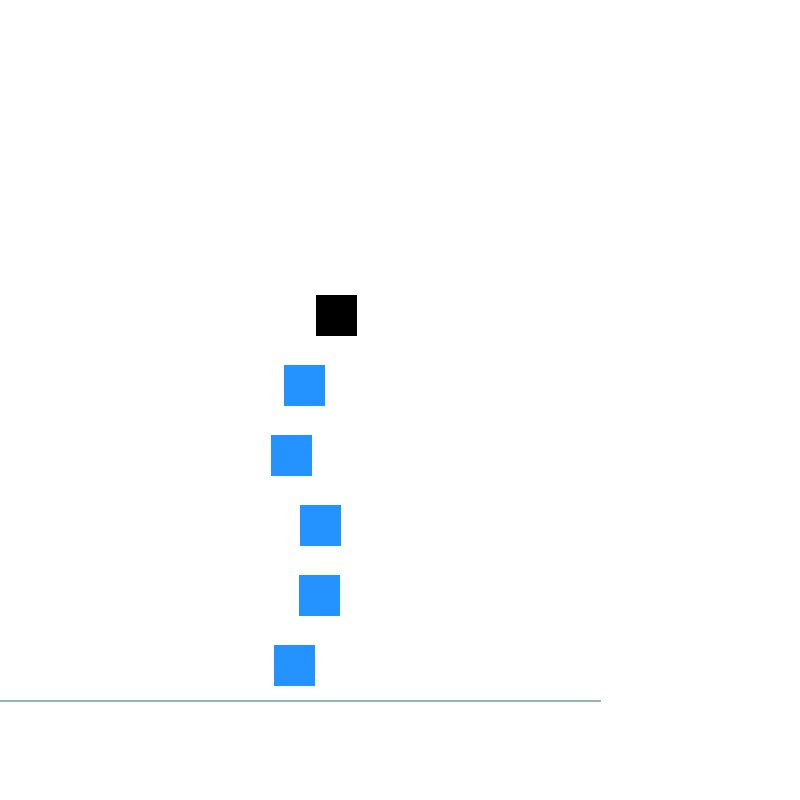

T


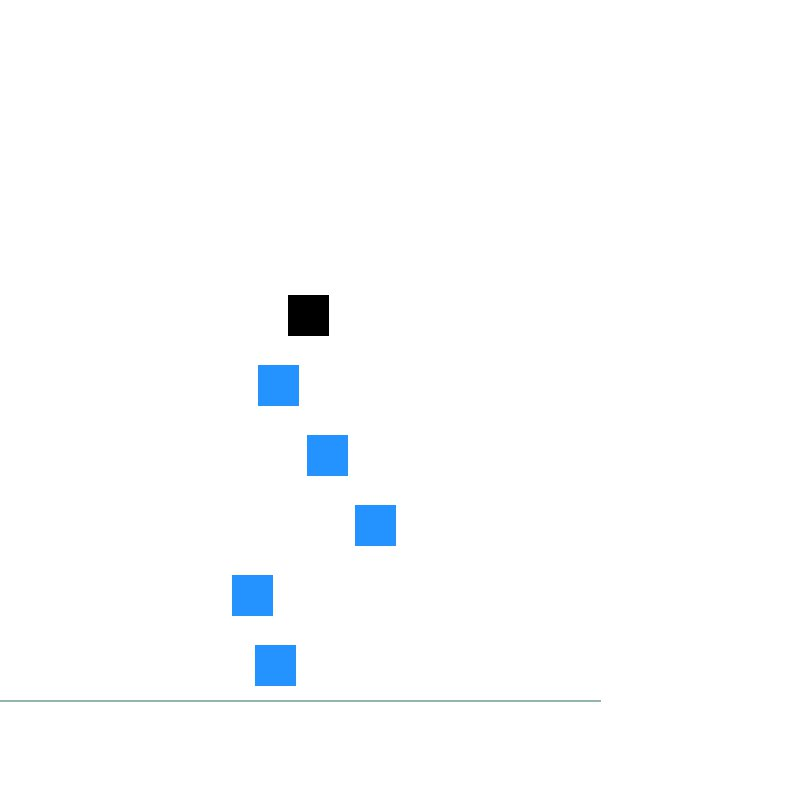

F


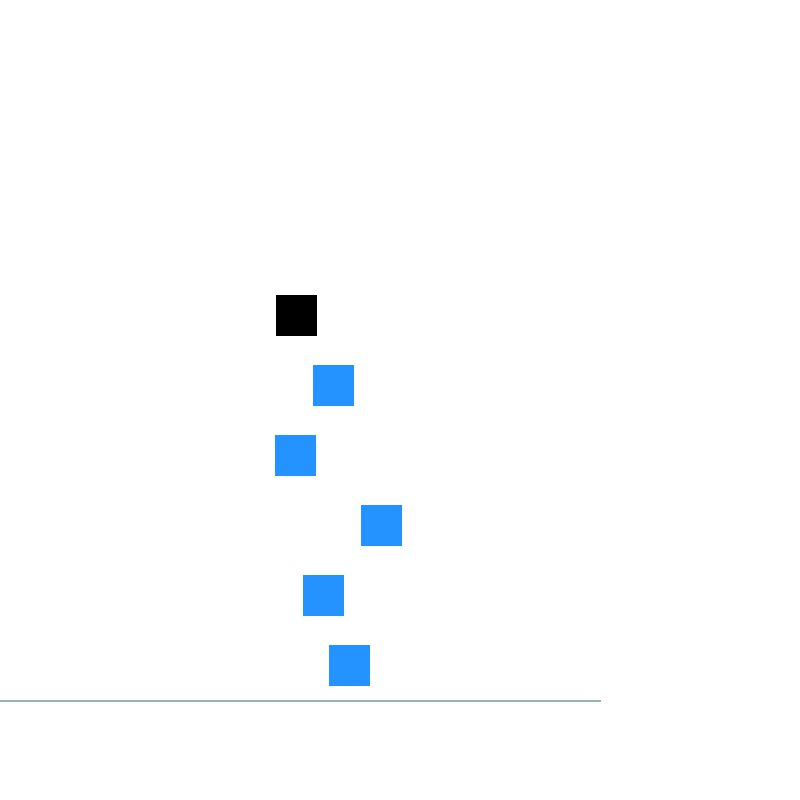

F


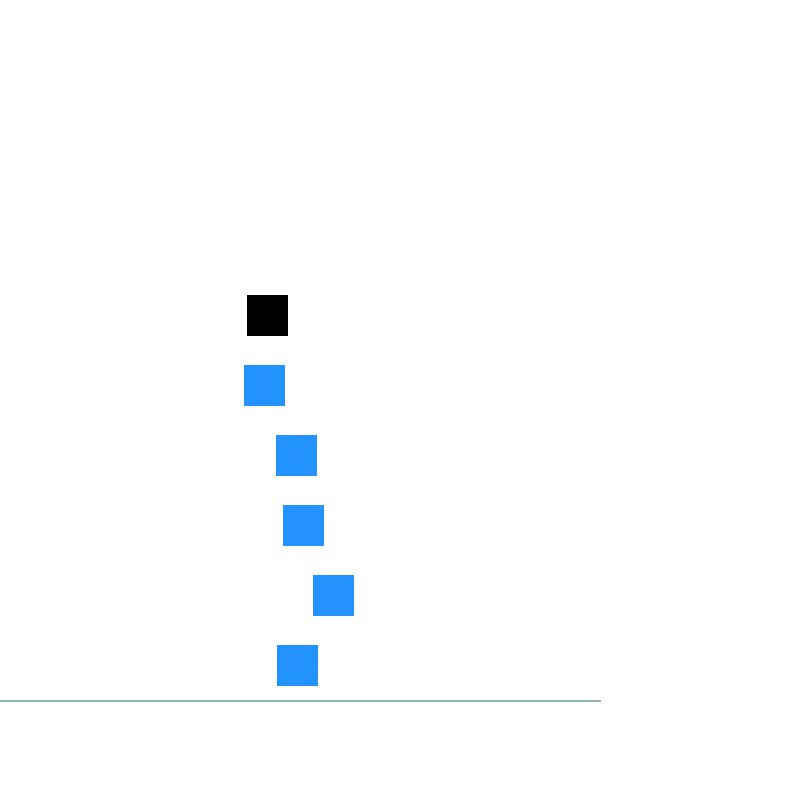

F


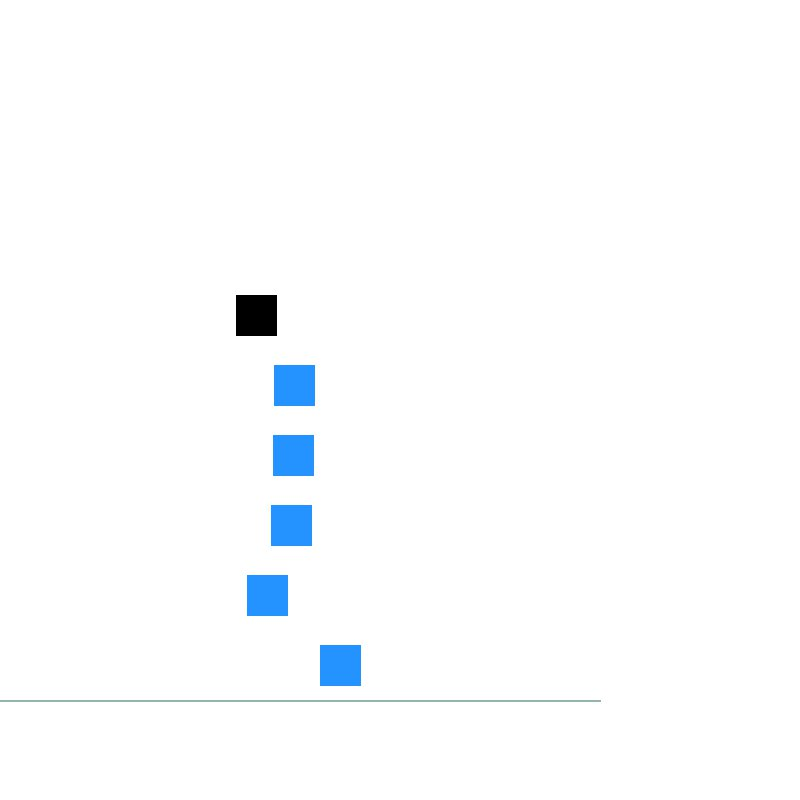

T


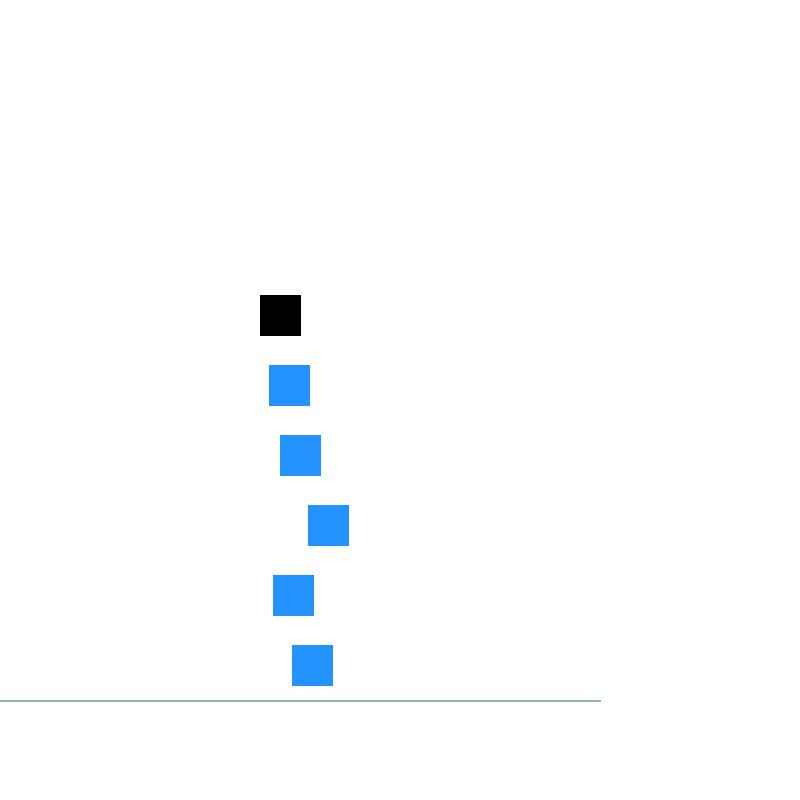

F


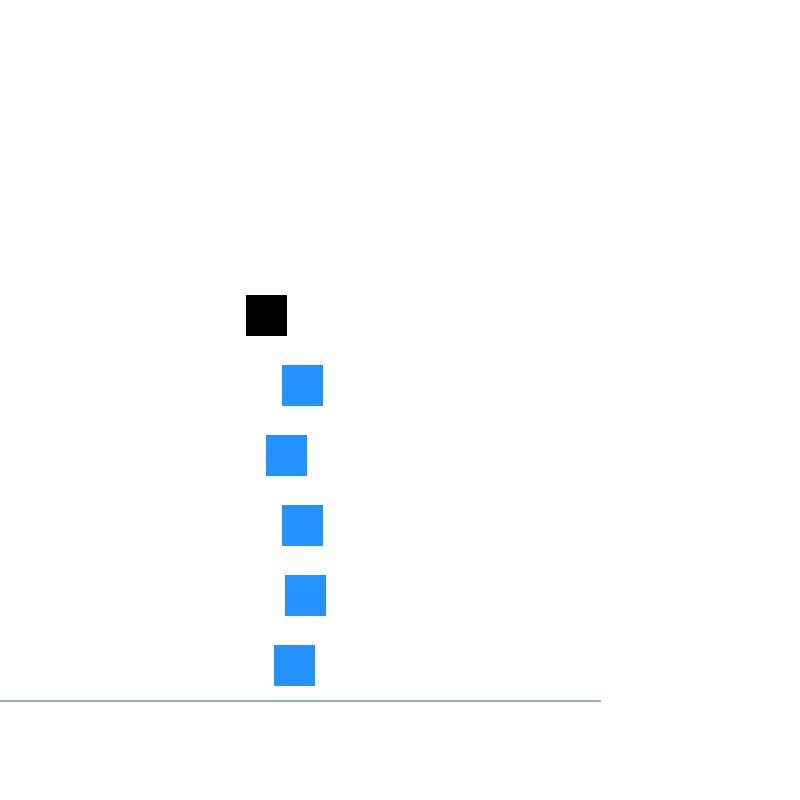

T


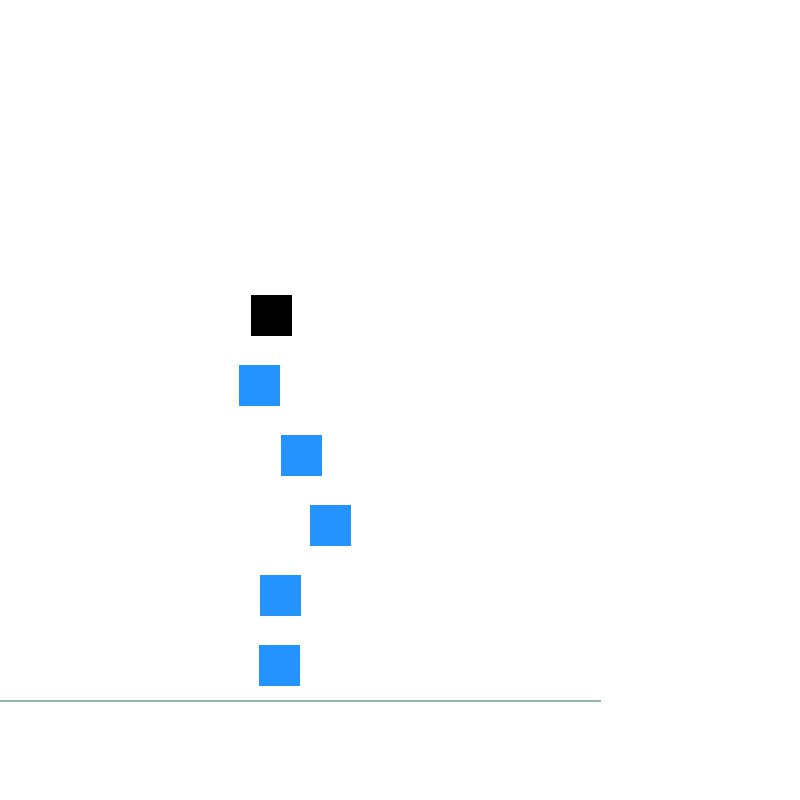

T


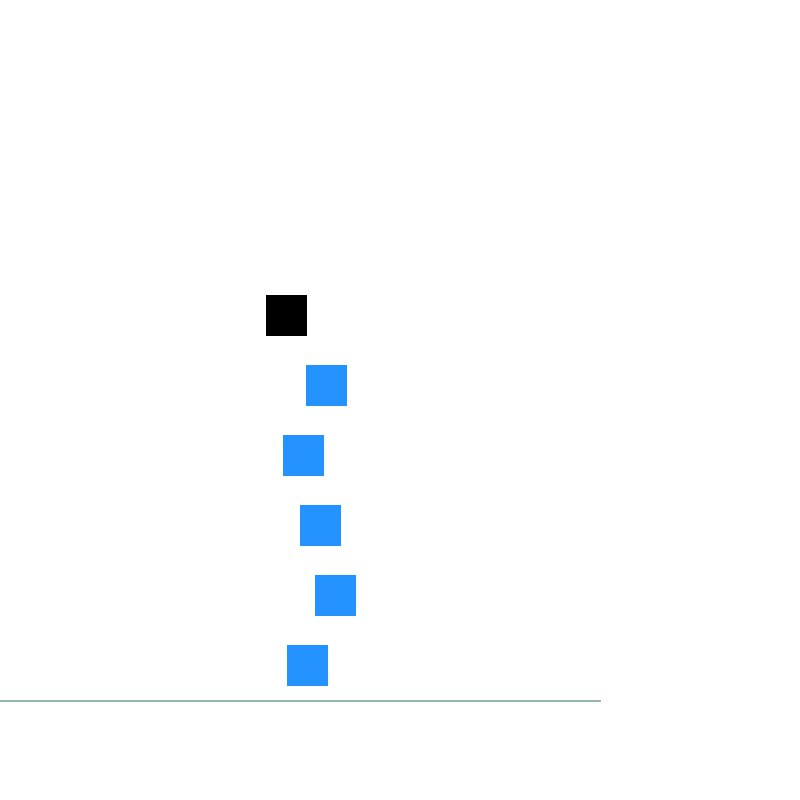

T


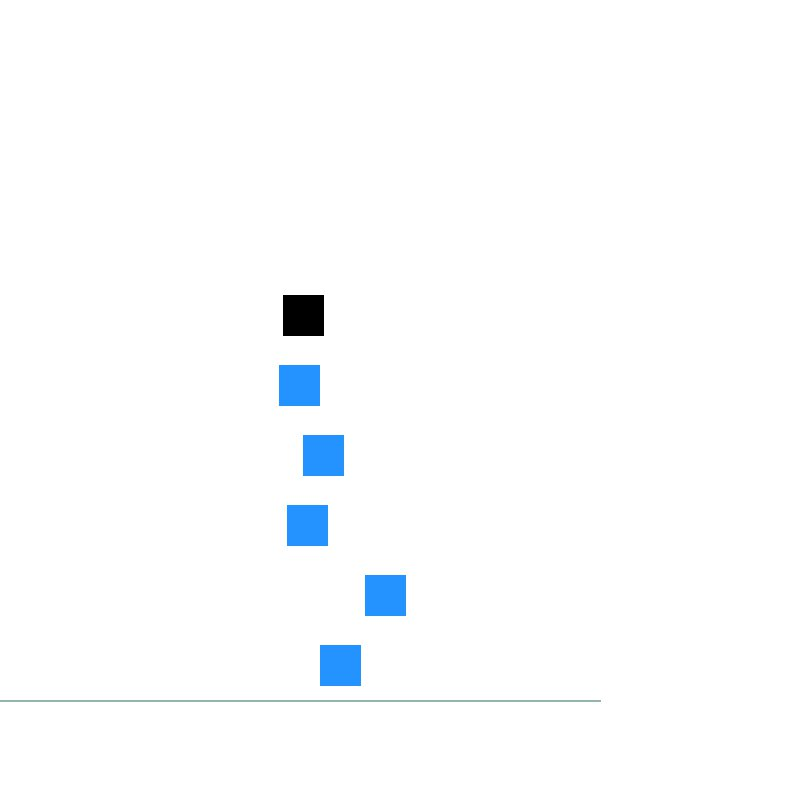

F


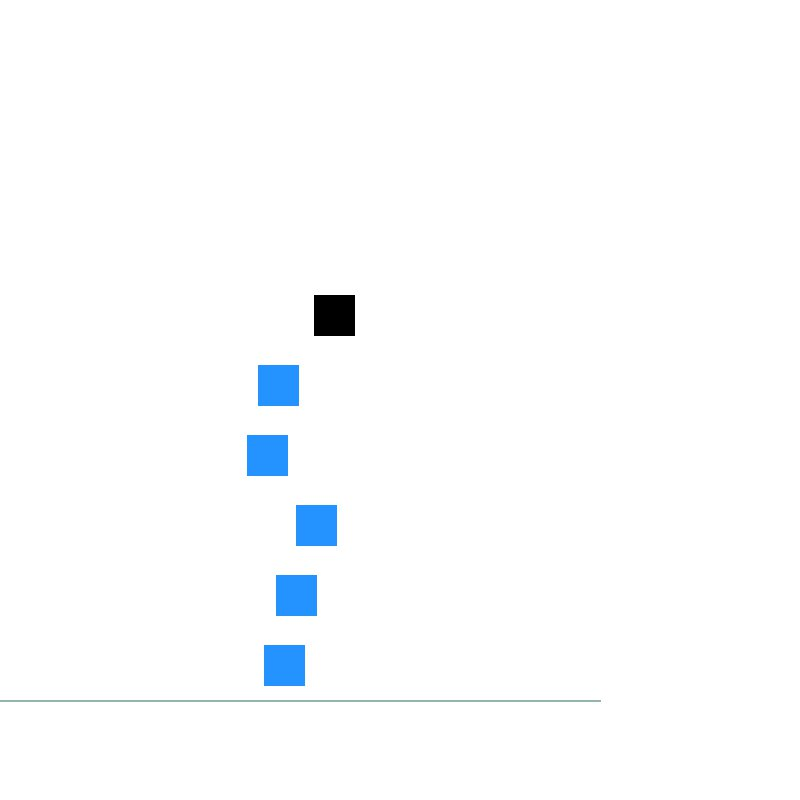

T


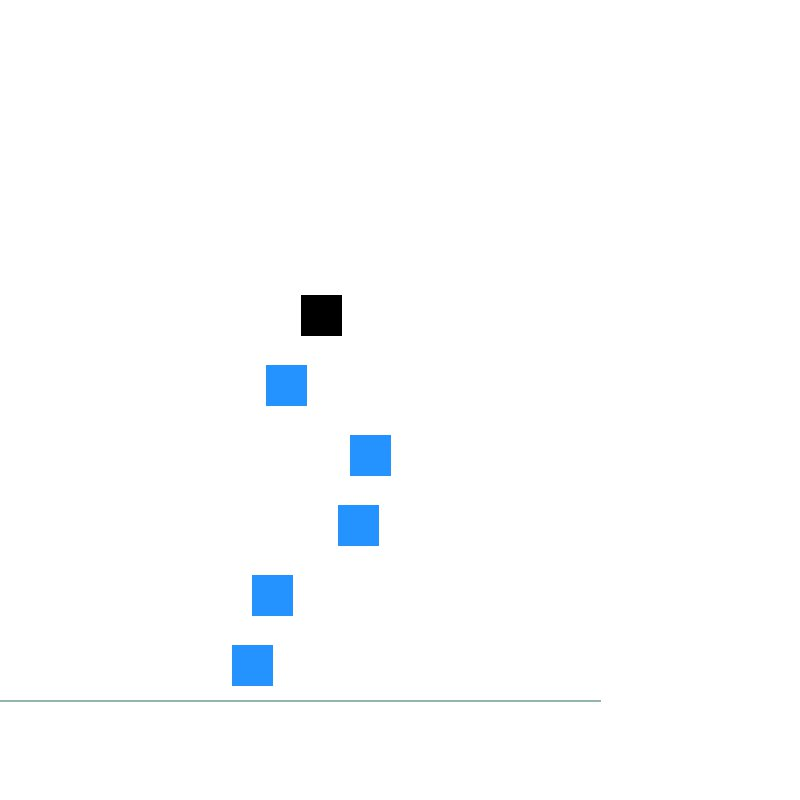

F


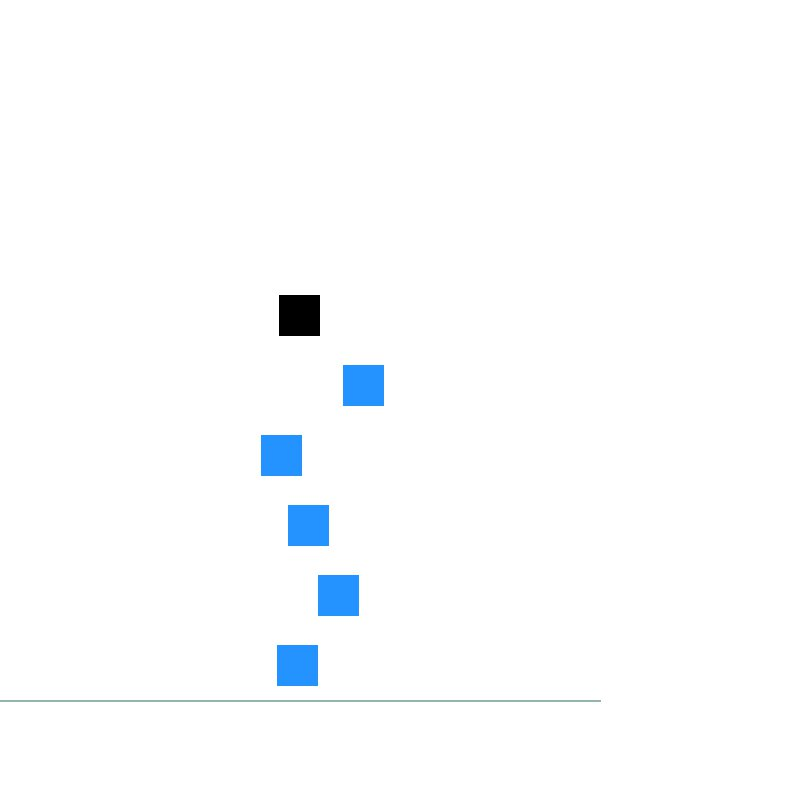

F


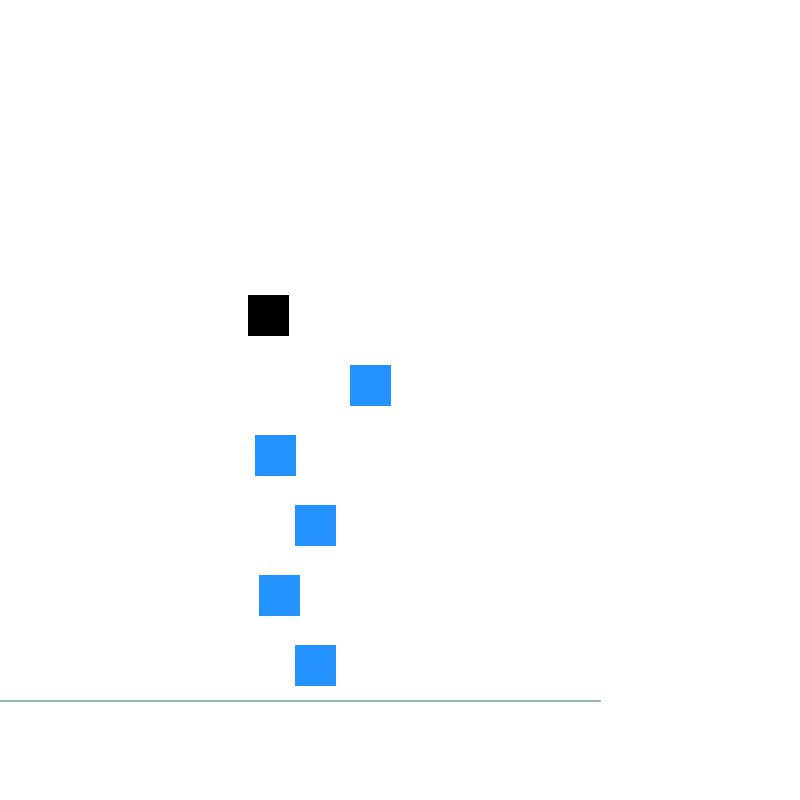

T


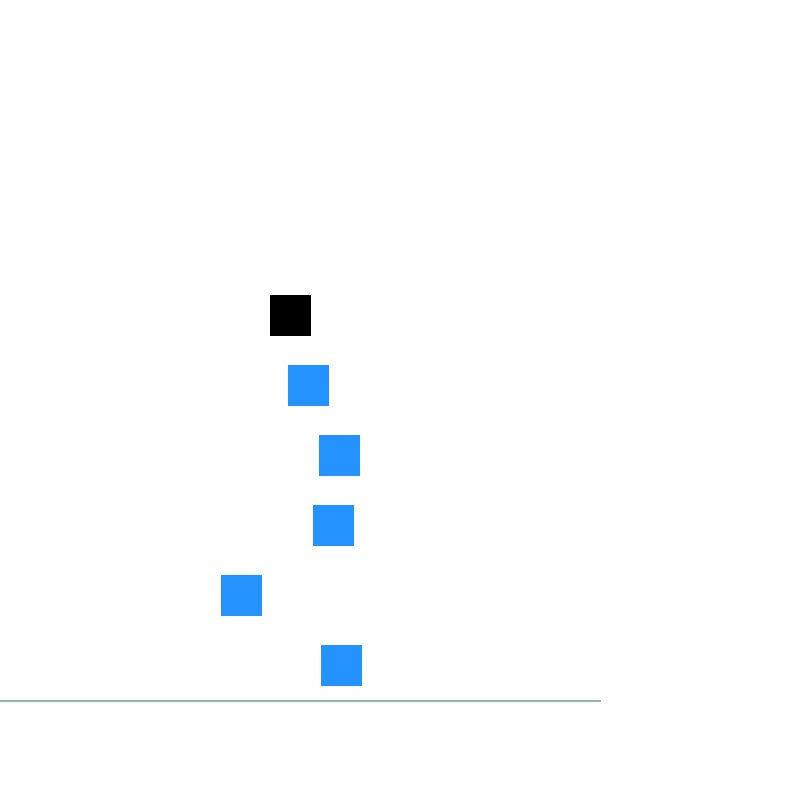

F


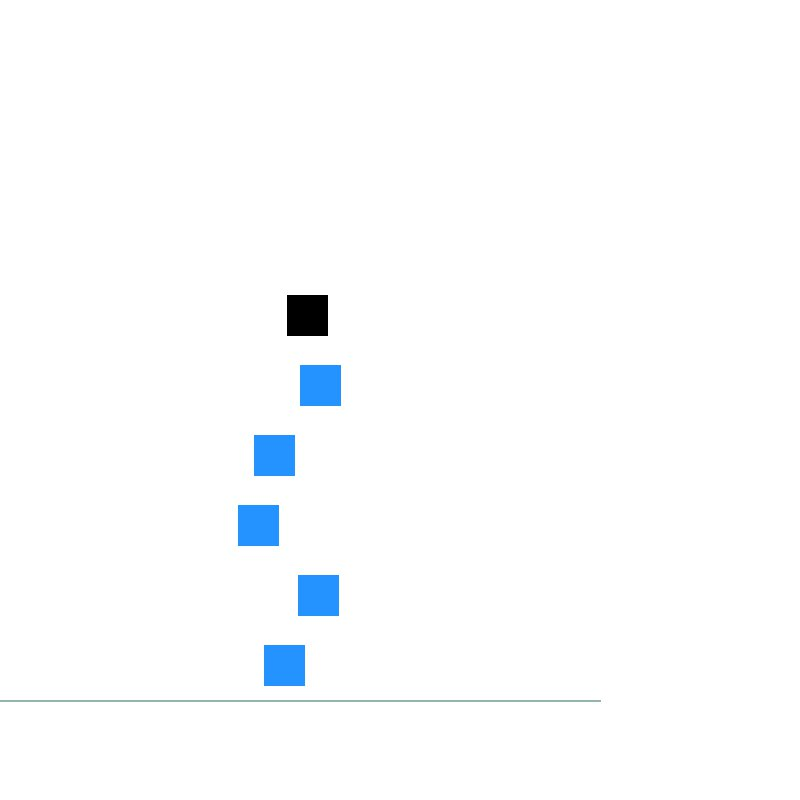

F


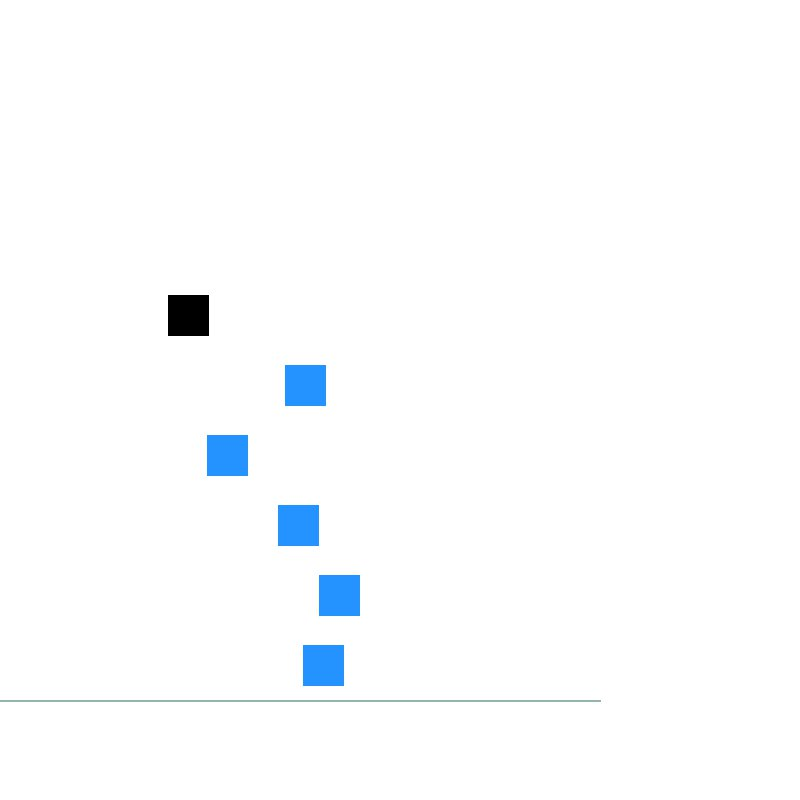

T


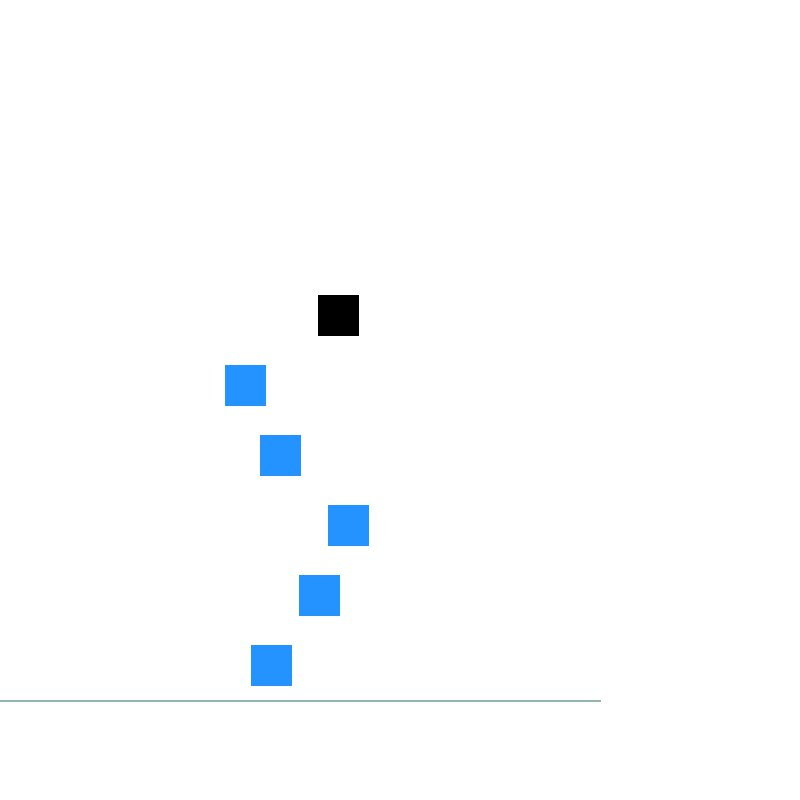

F


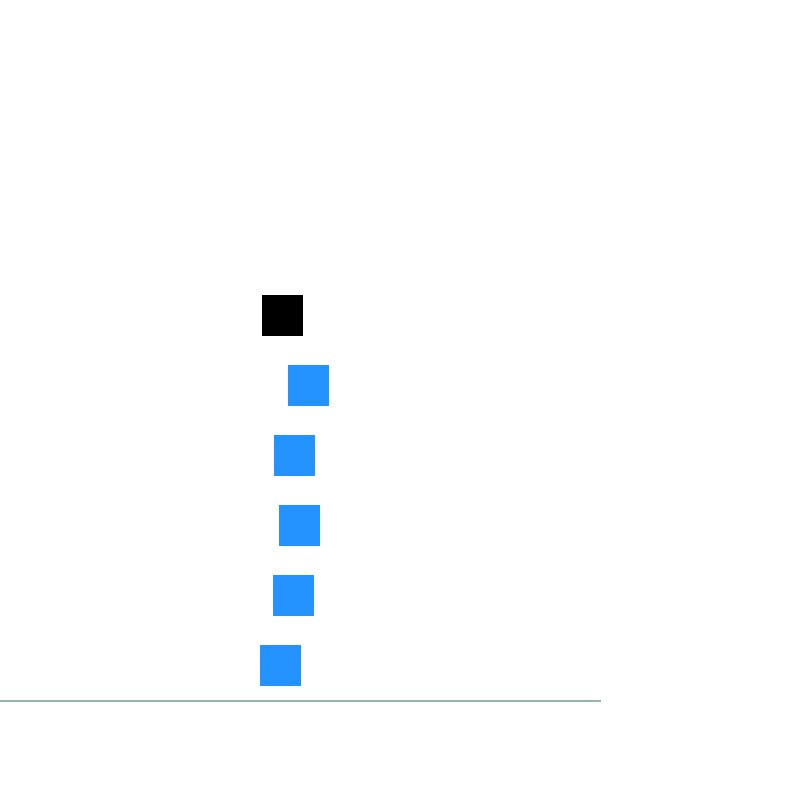

F


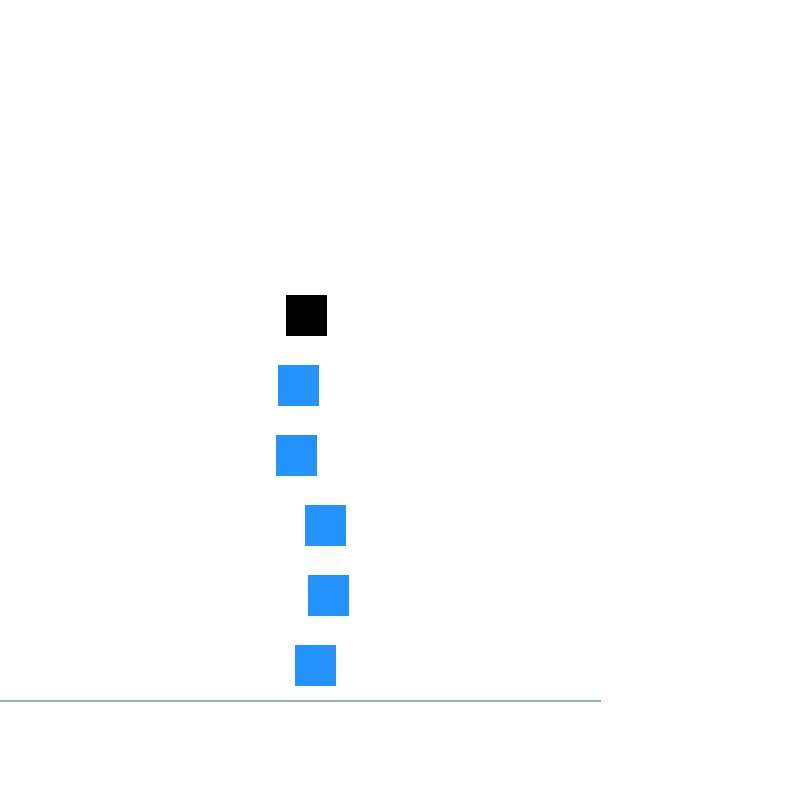

F


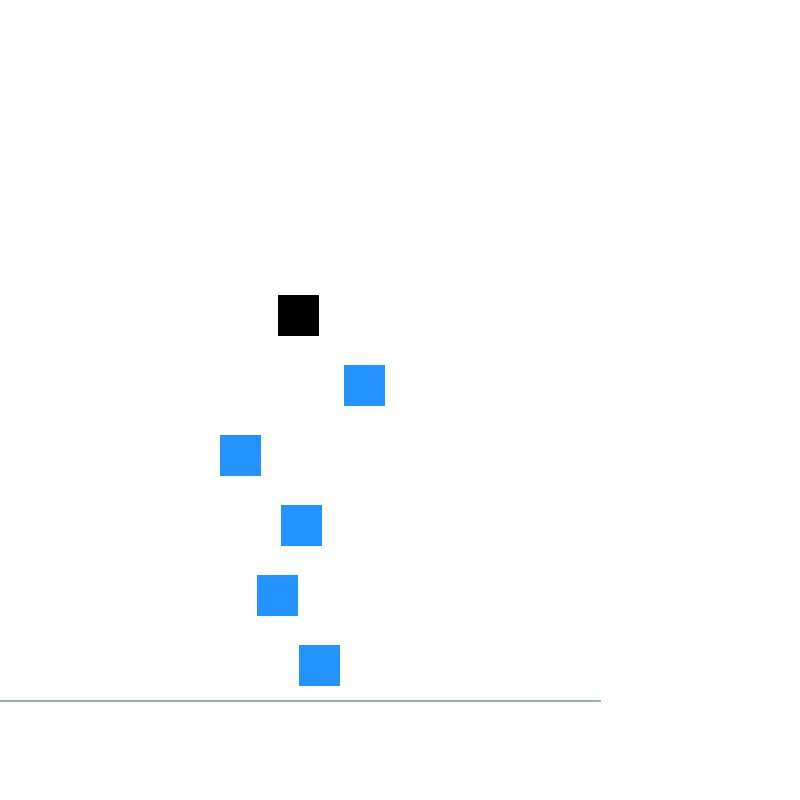

F


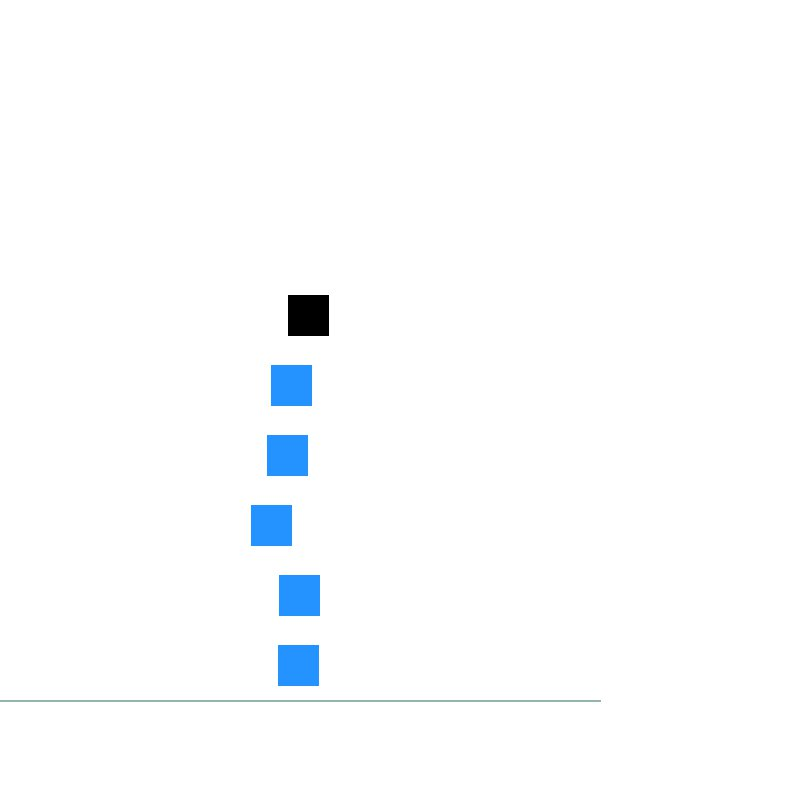

F


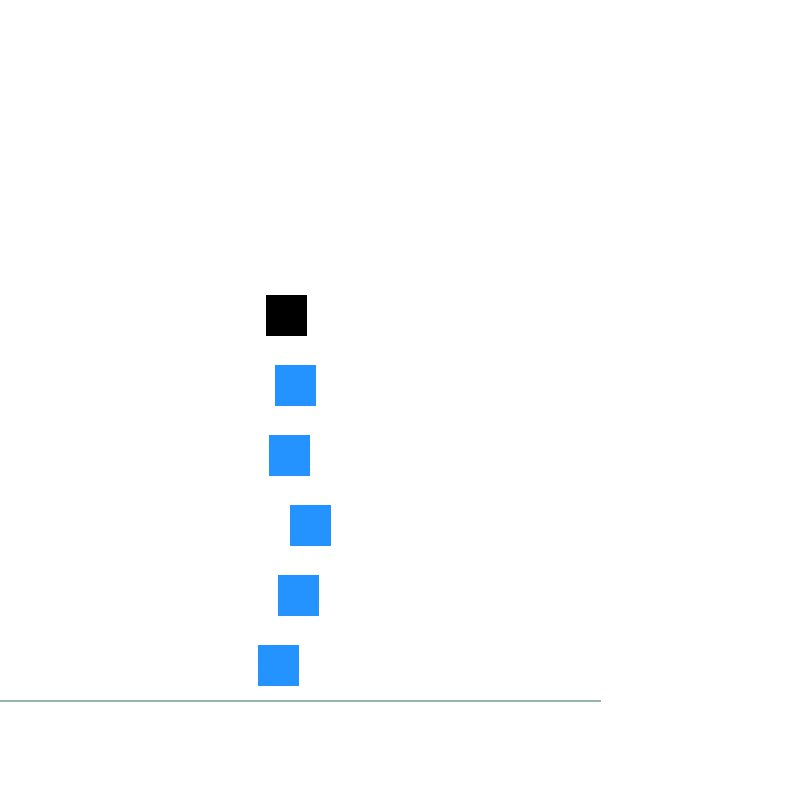

F


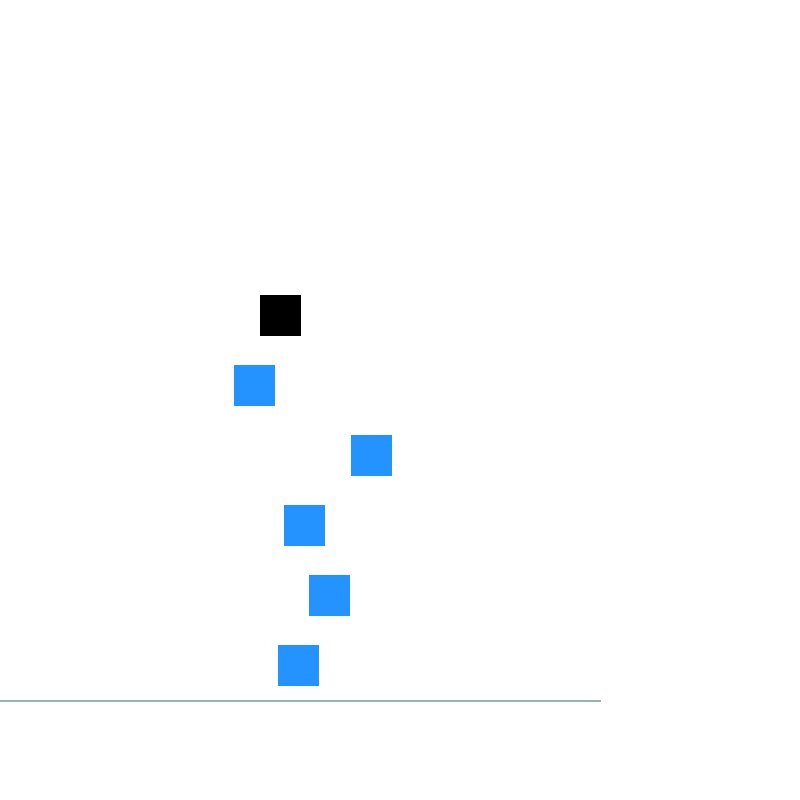

F


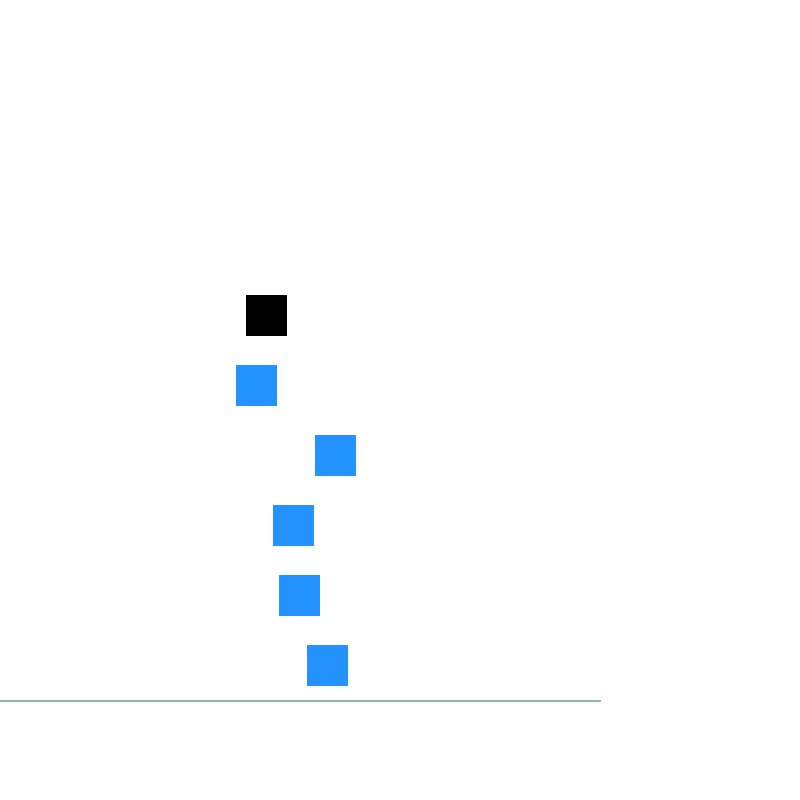

F


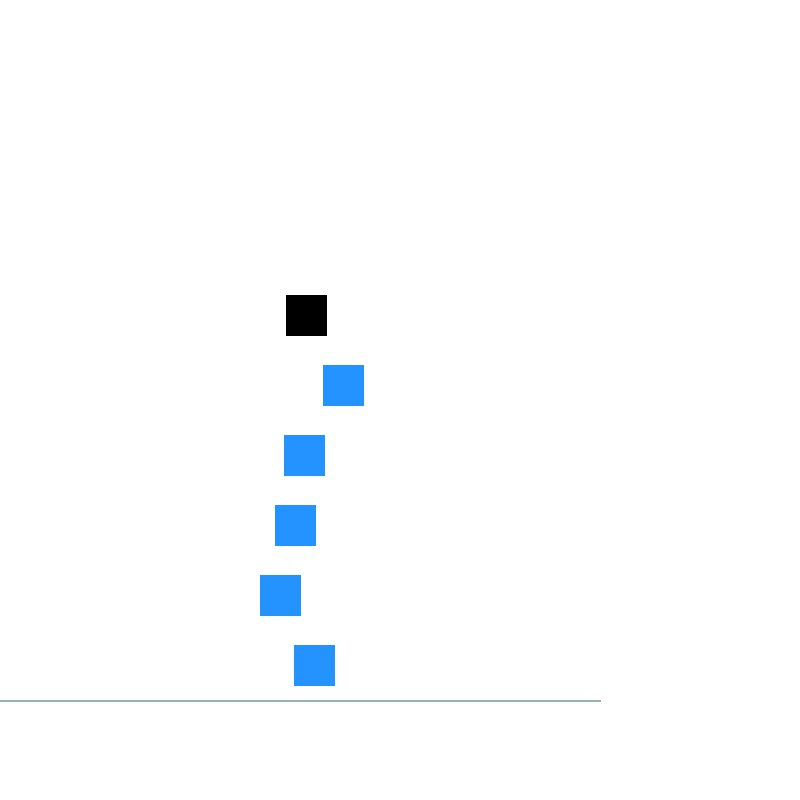

F


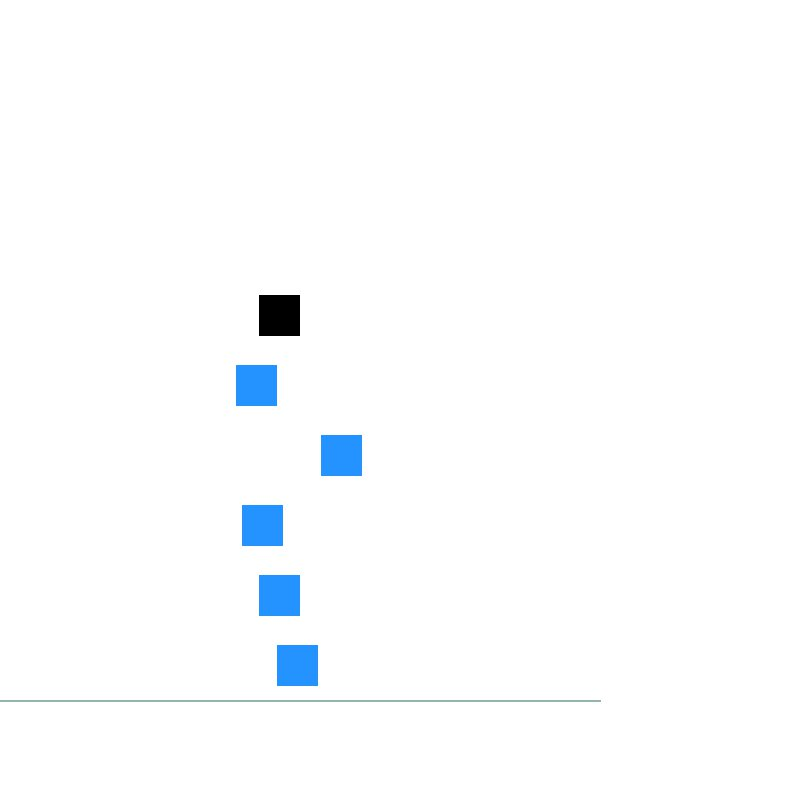

F


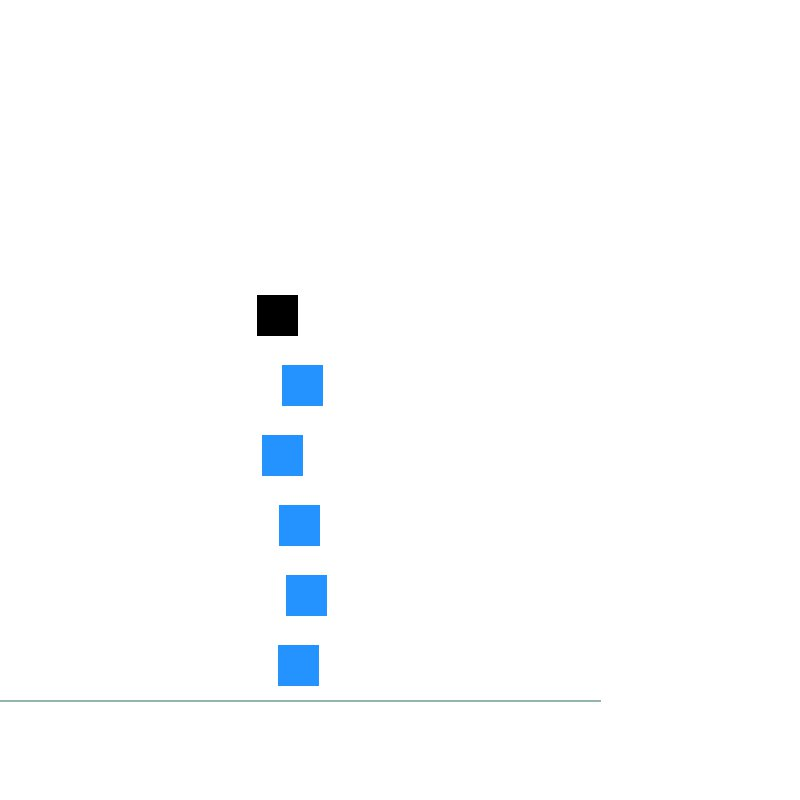

F


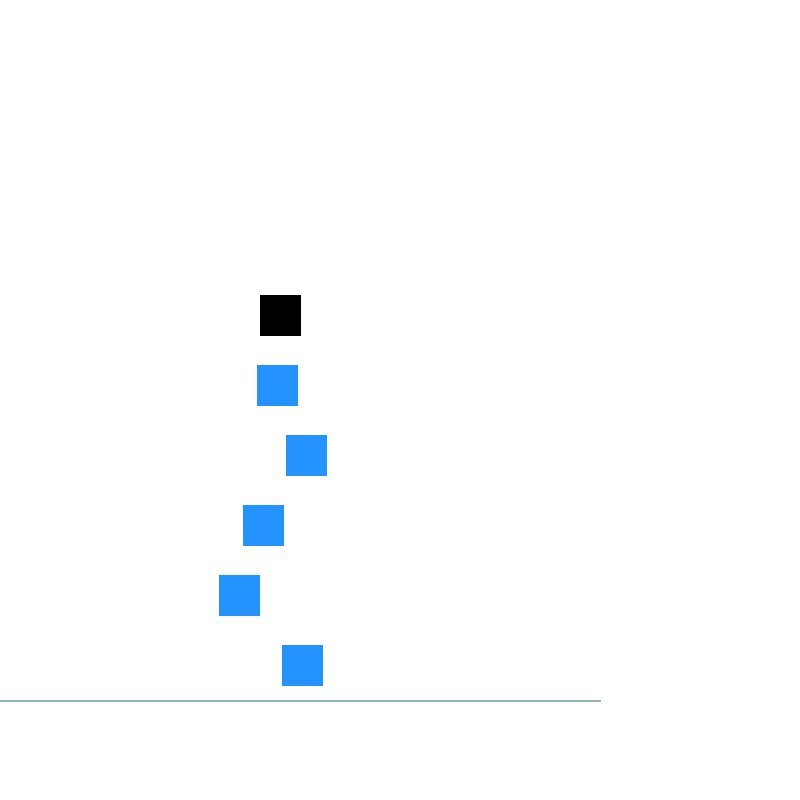

F


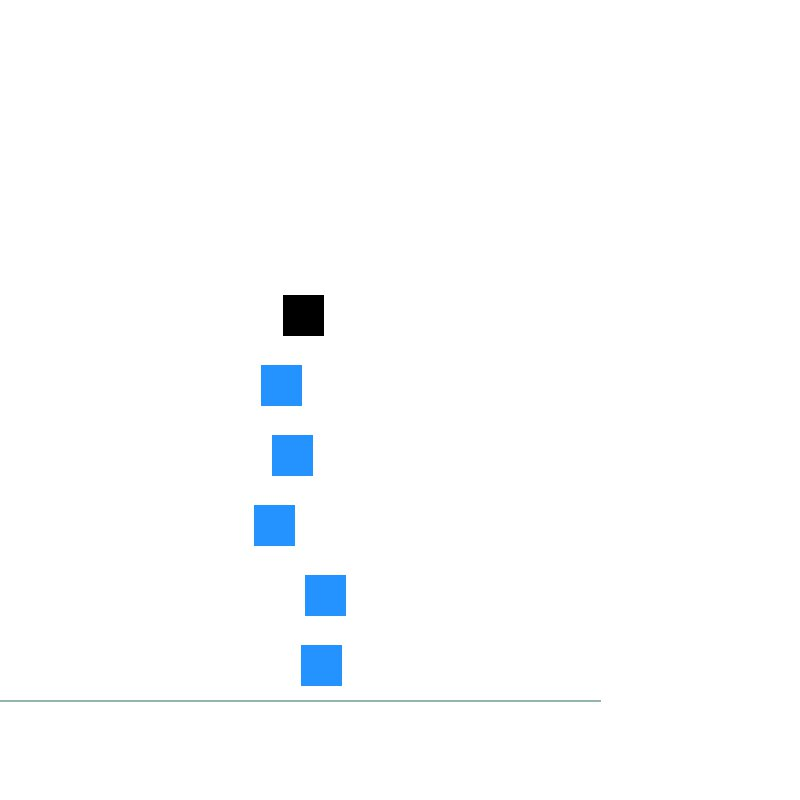

F


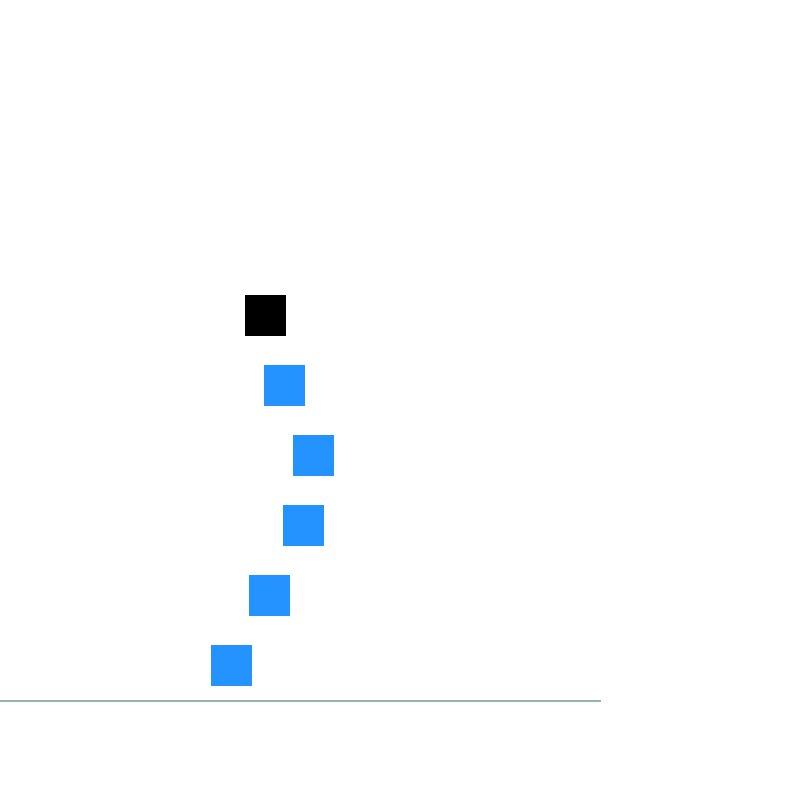

F


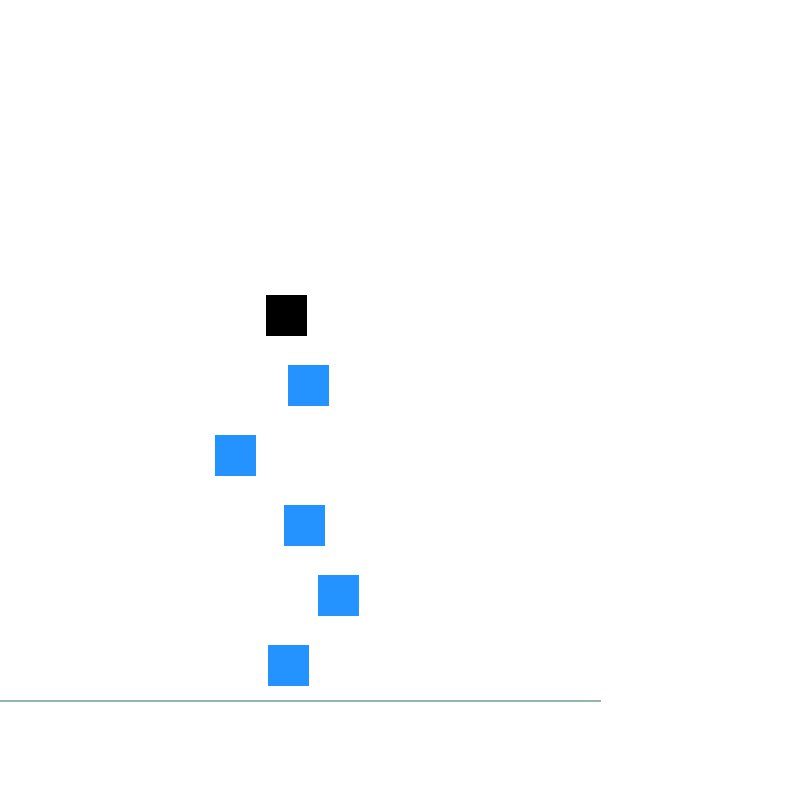

F


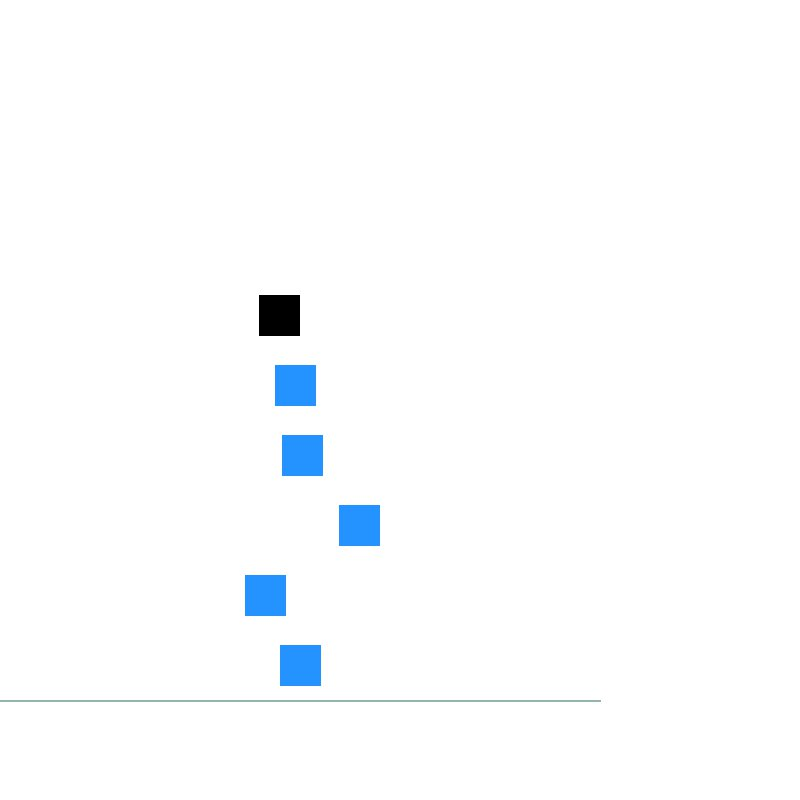

F


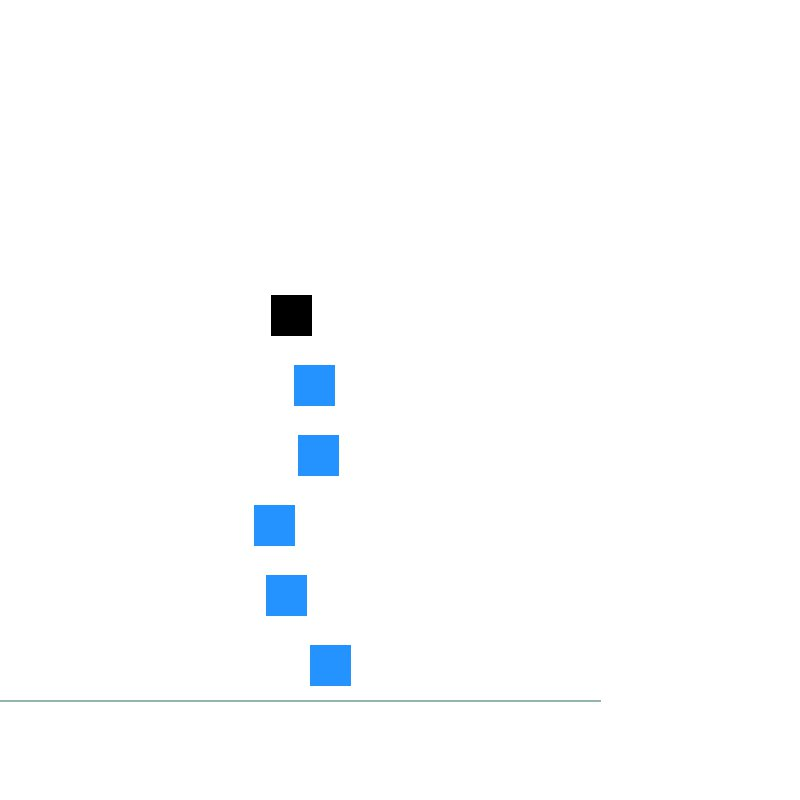

F


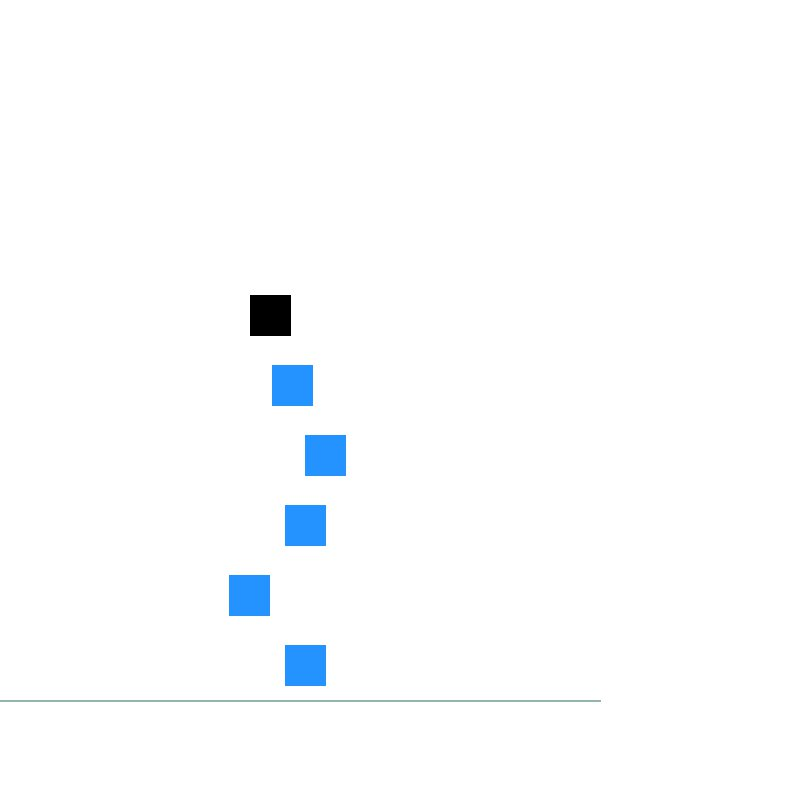

F


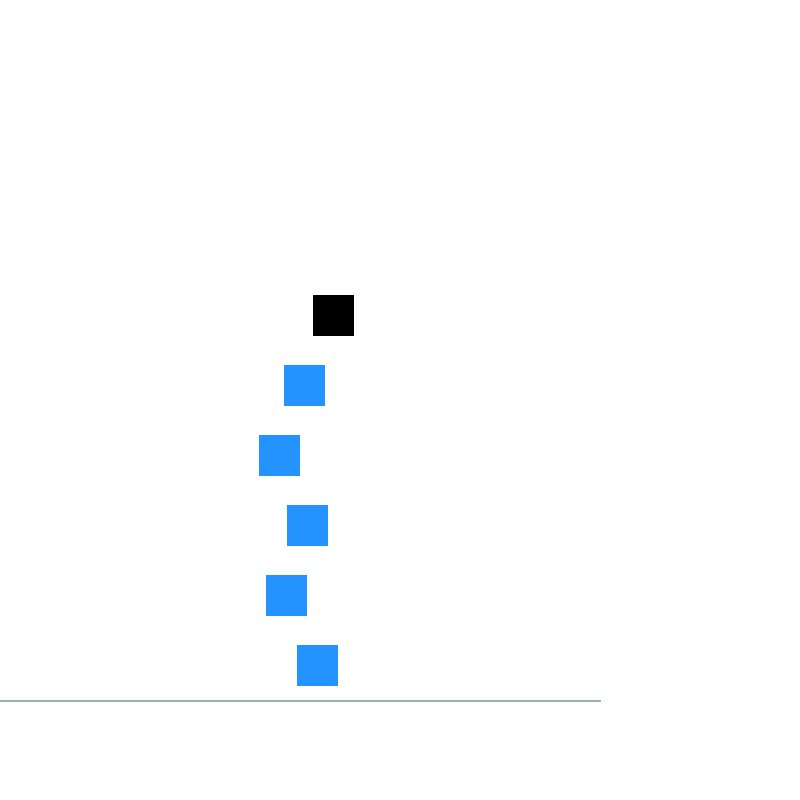

T


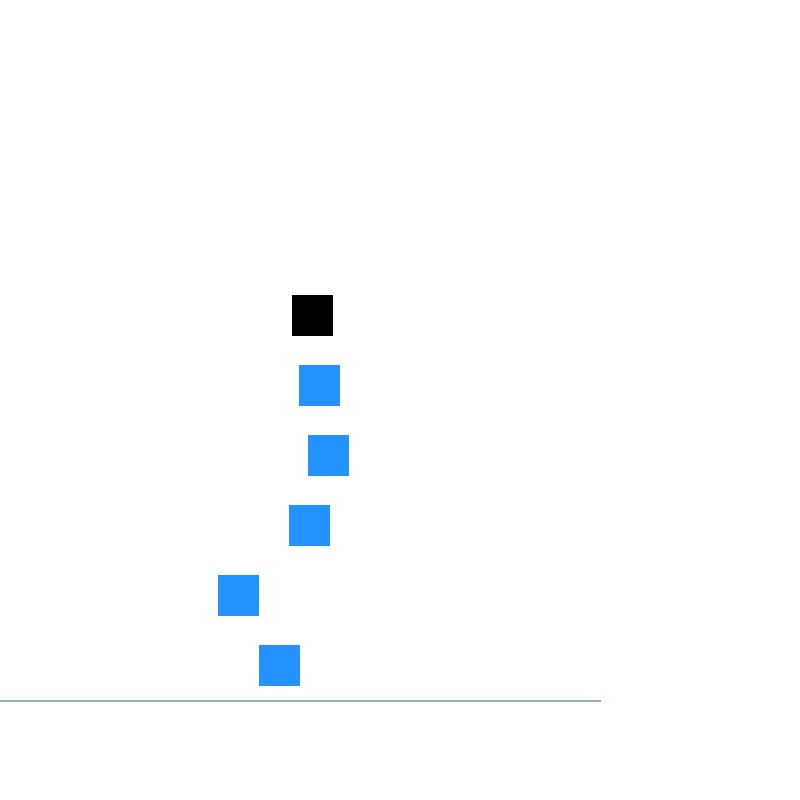

F


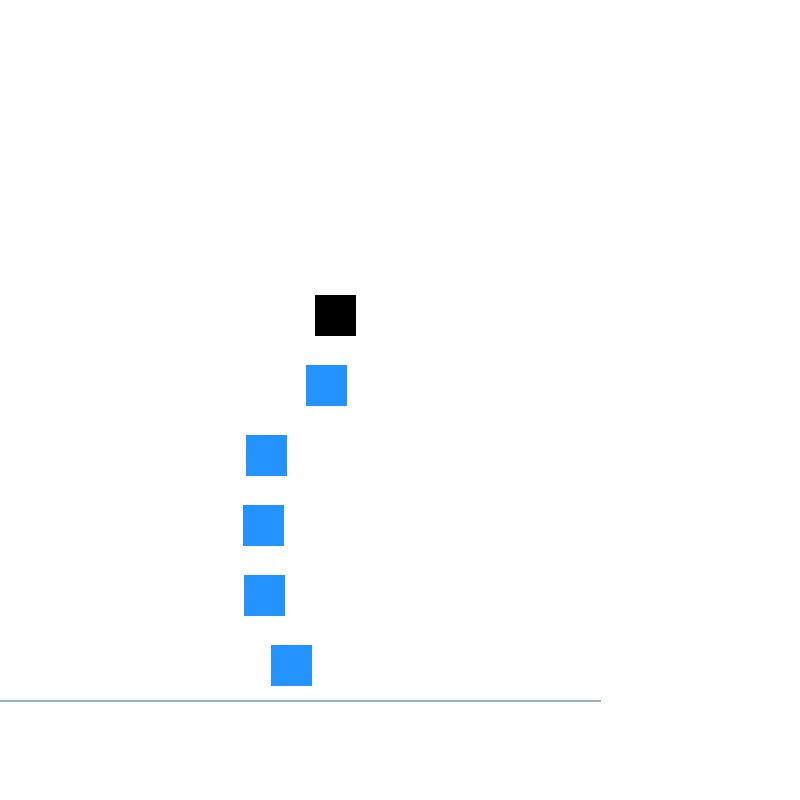

T


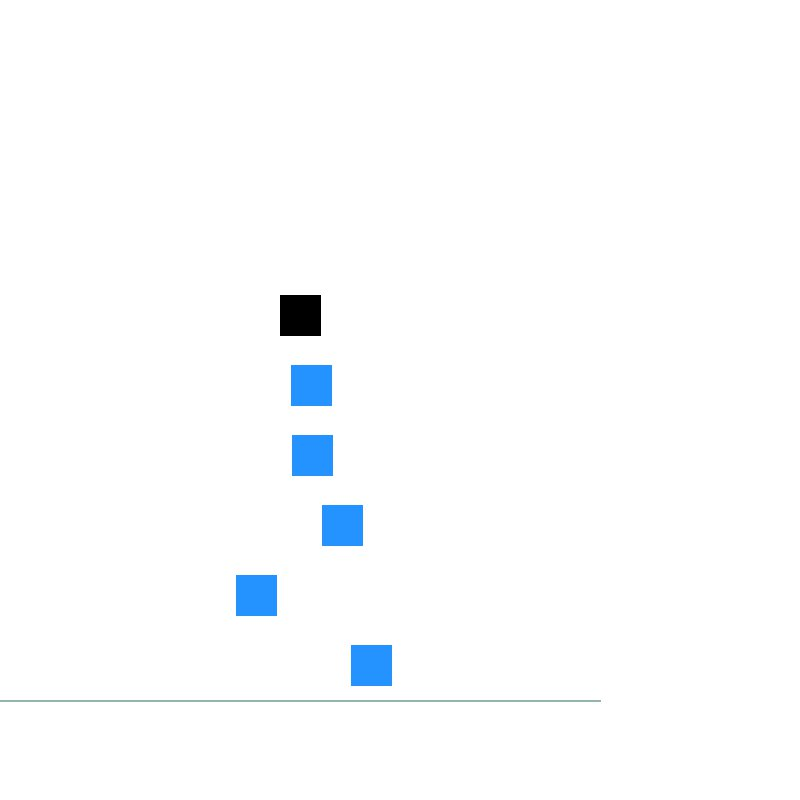

F


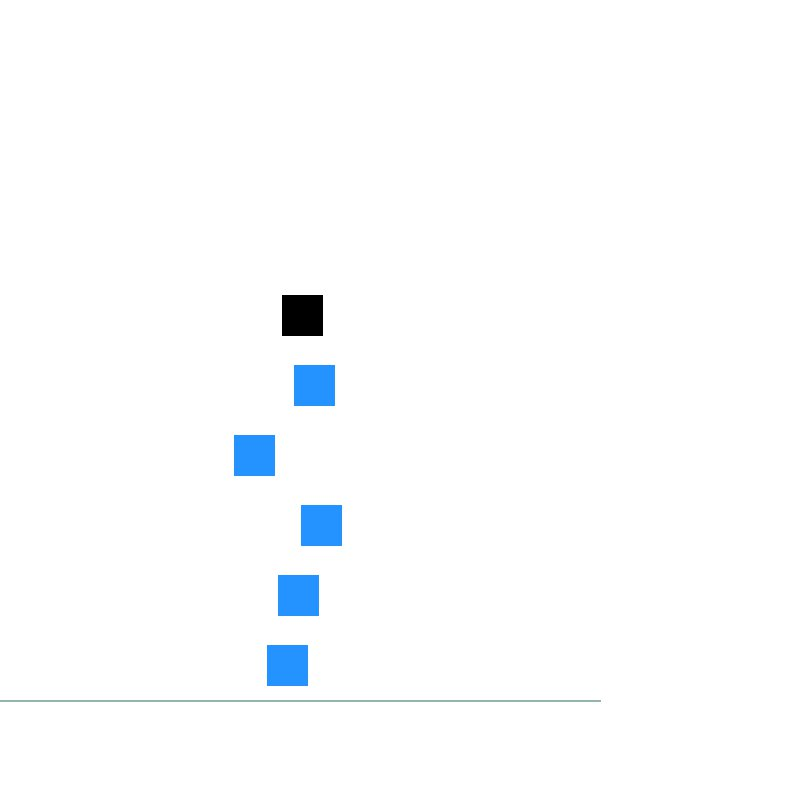

F


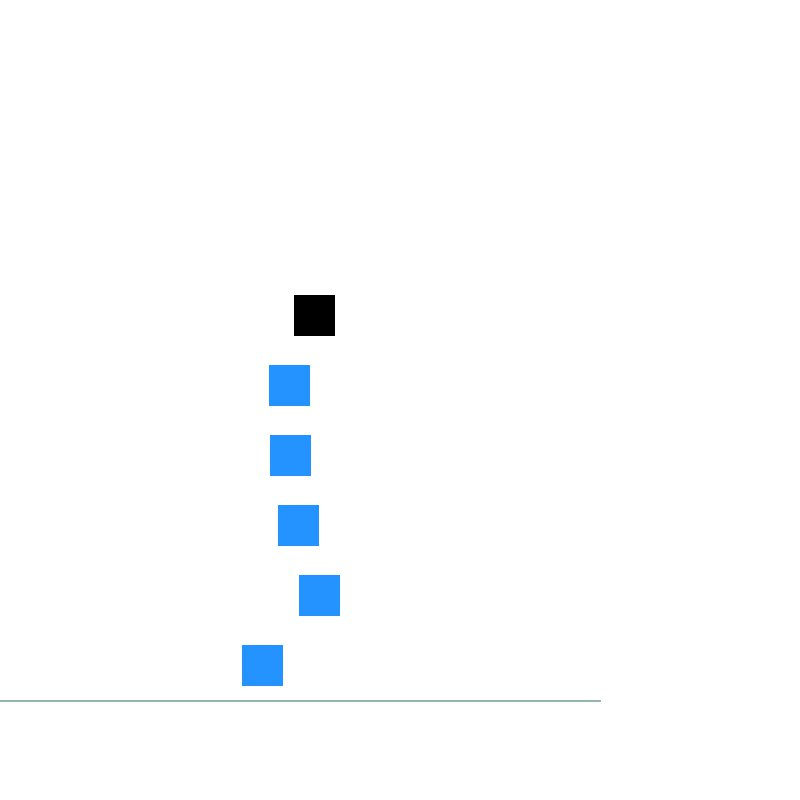

F


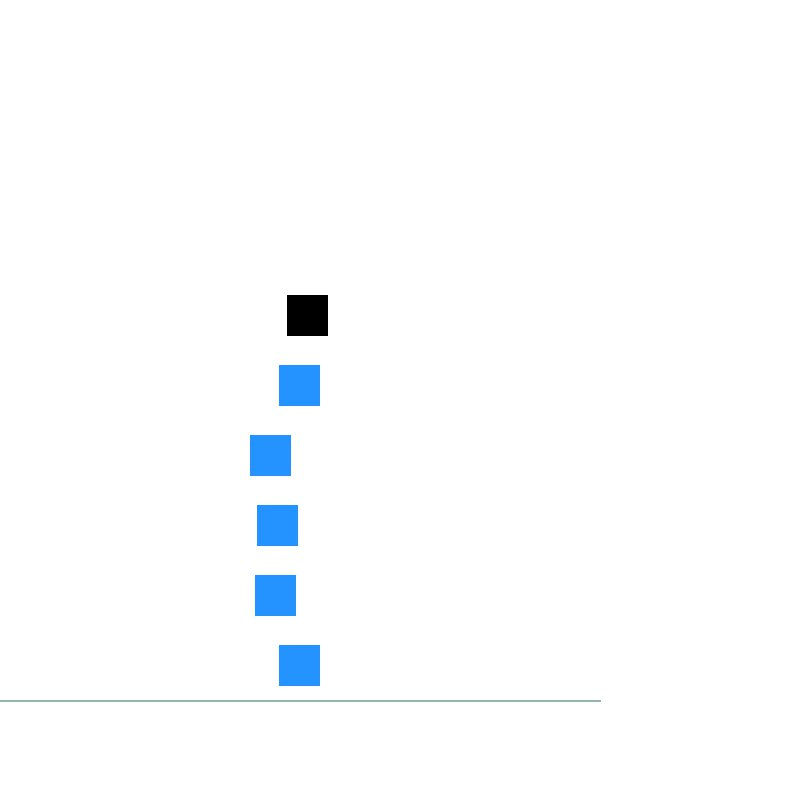

T


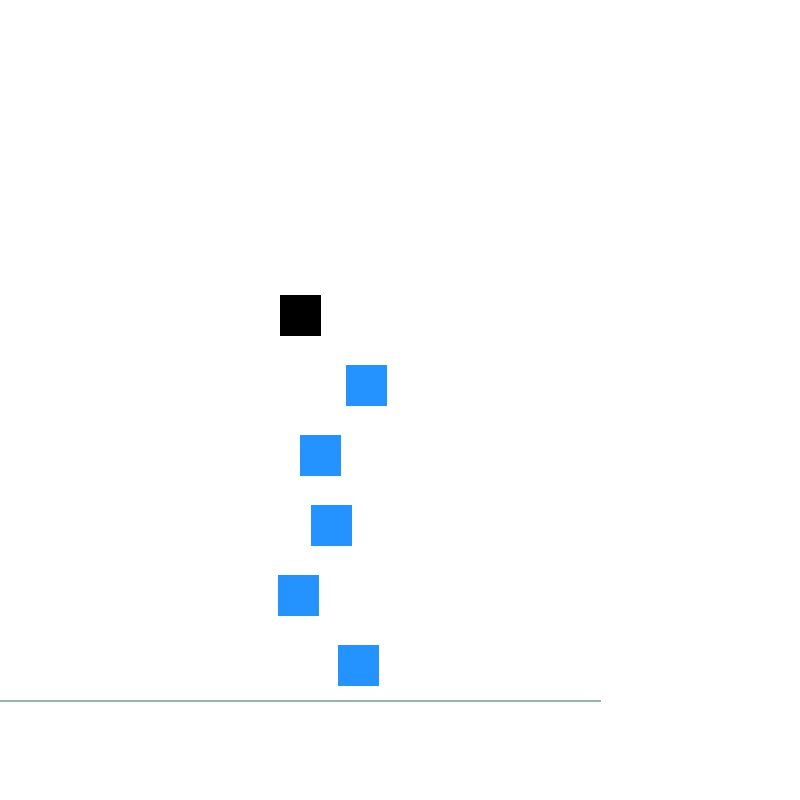

T


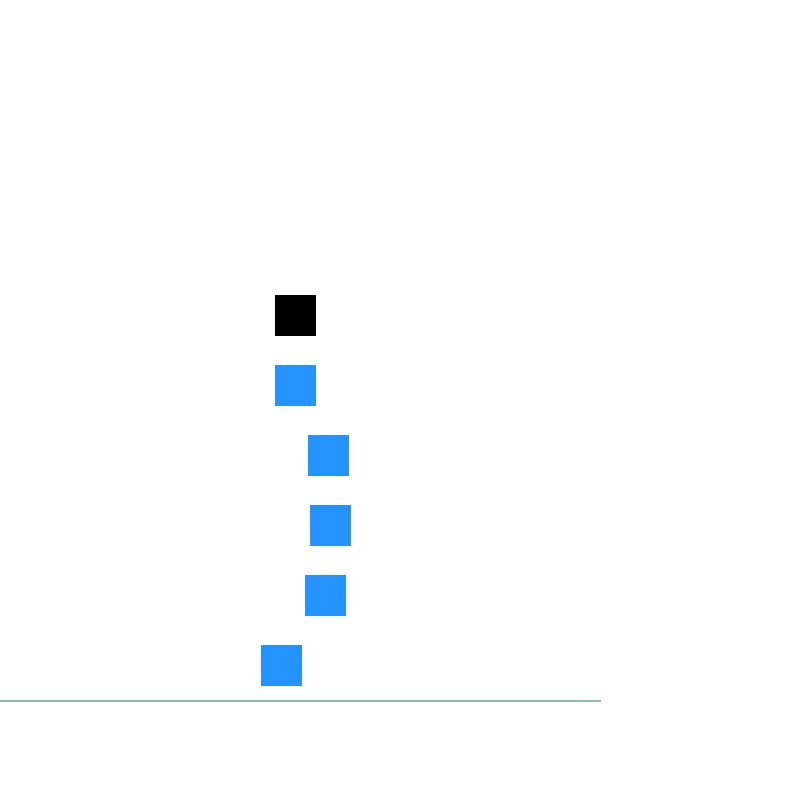

F


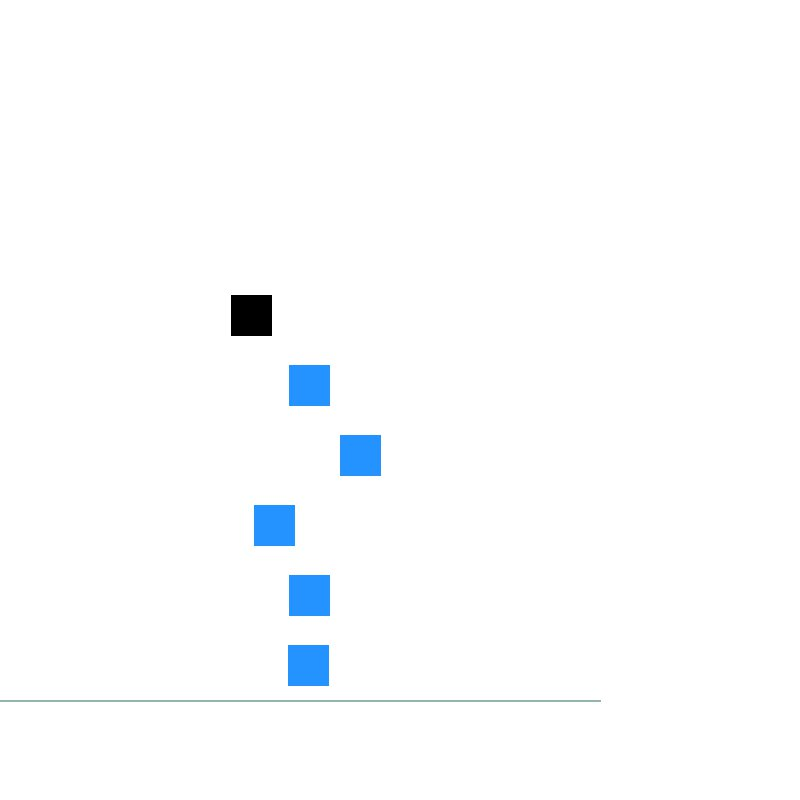

T


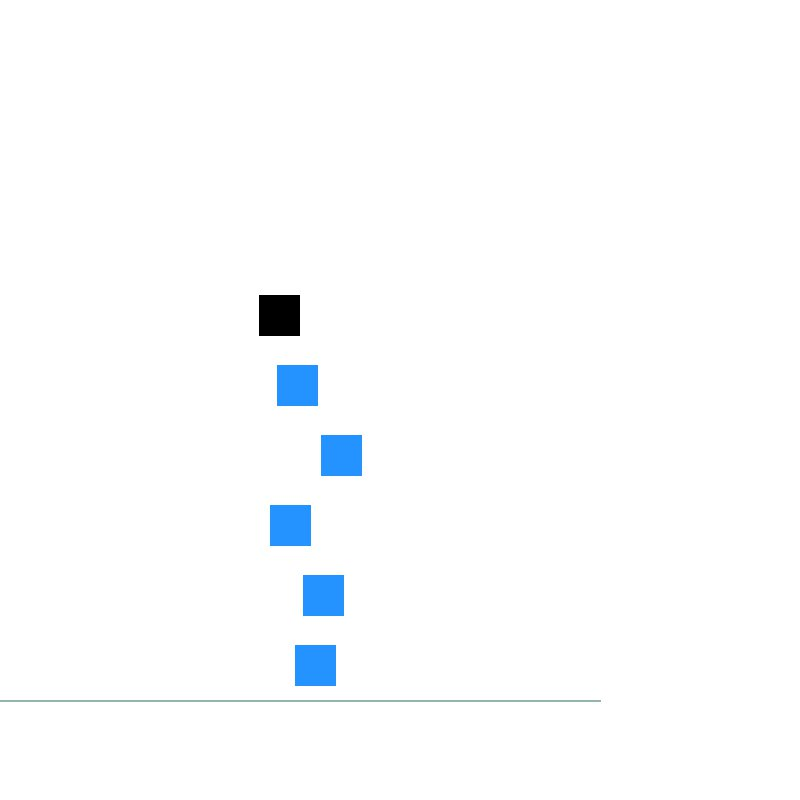

F


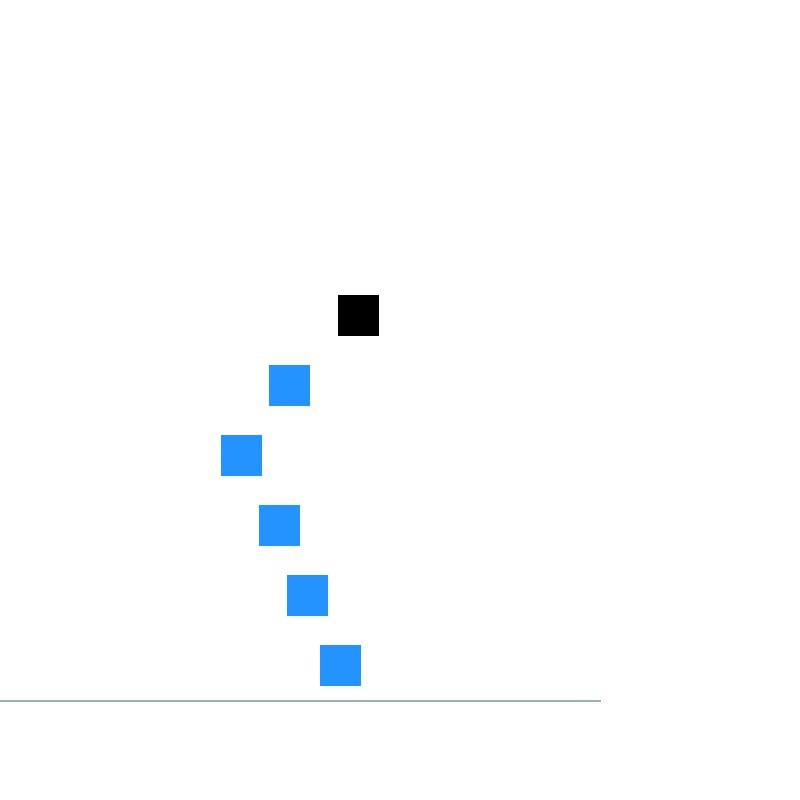

T


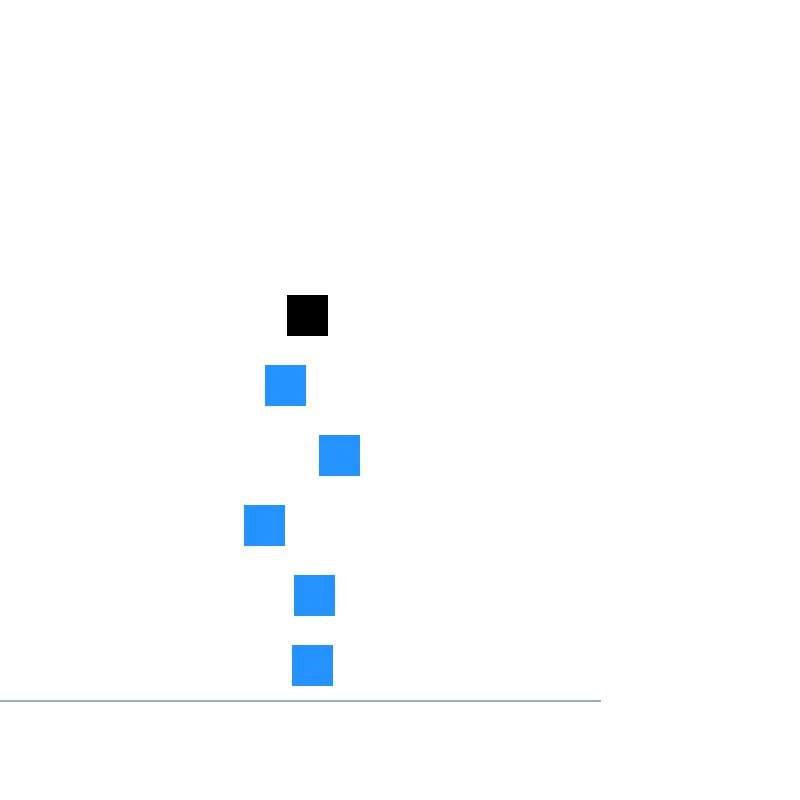

F


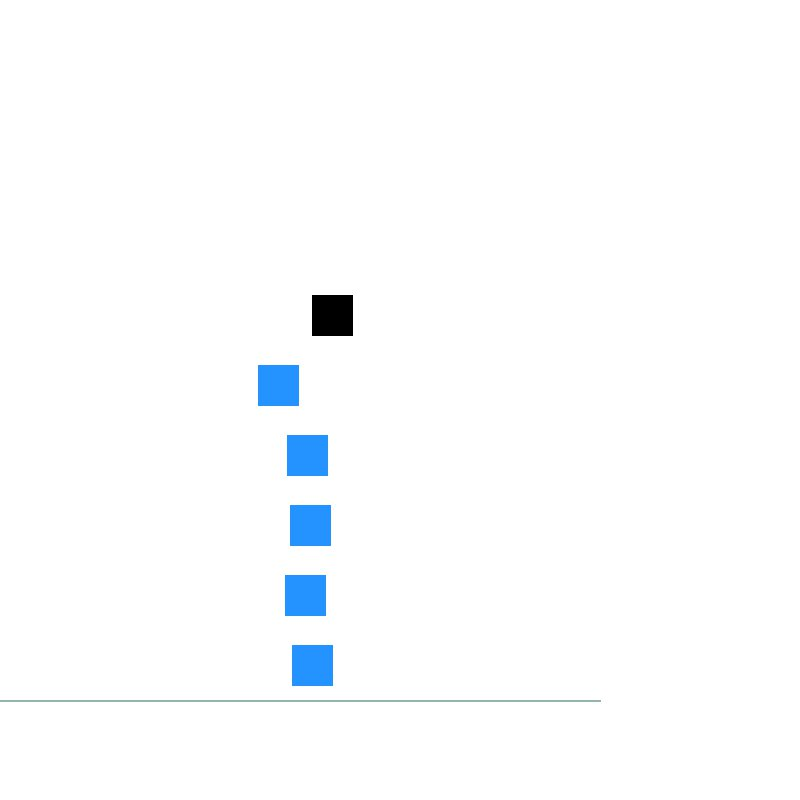

T


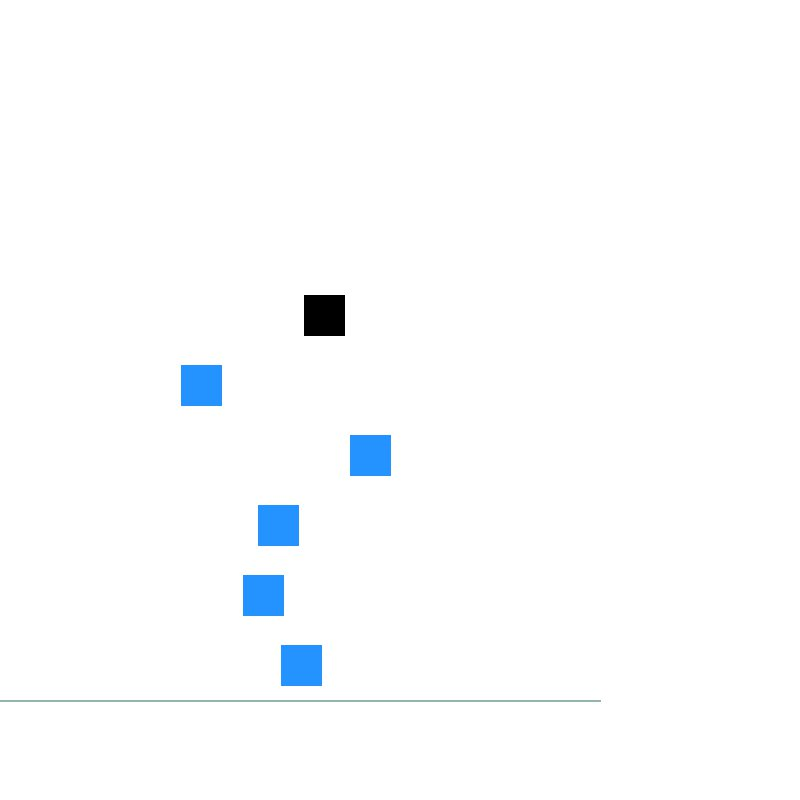

T


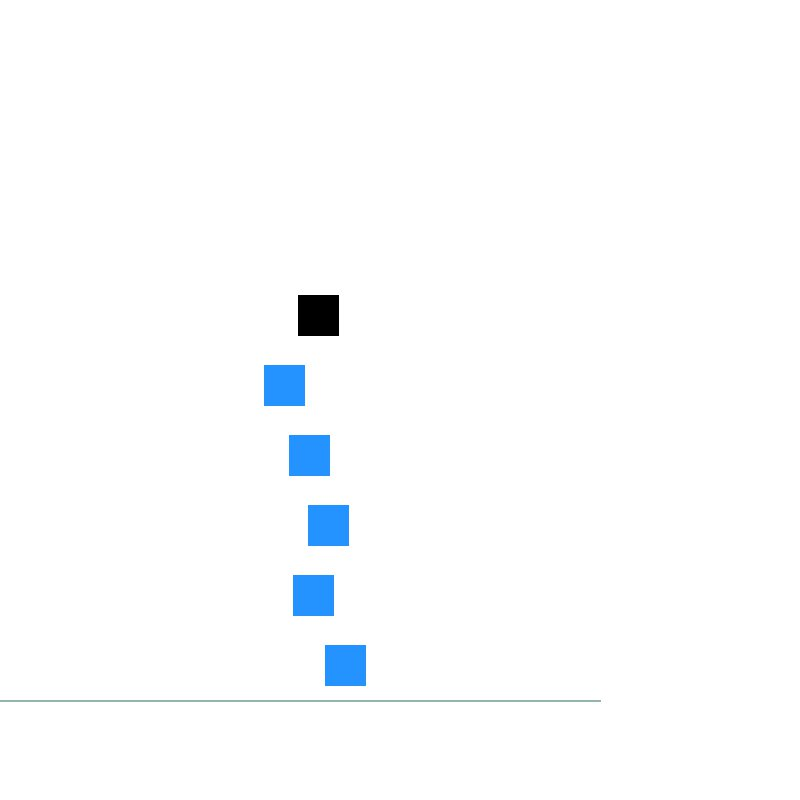

F


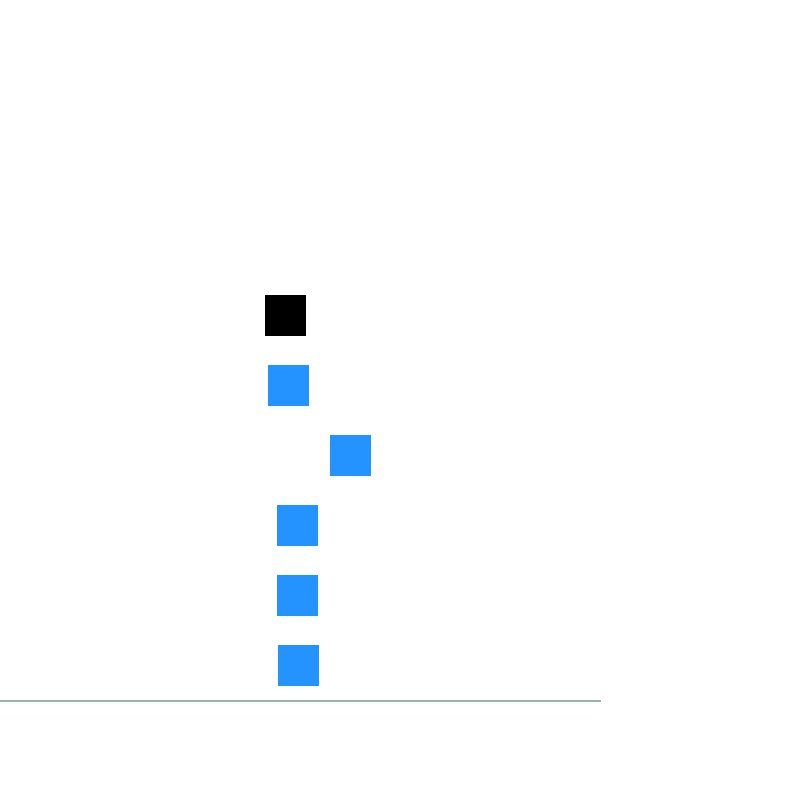

F


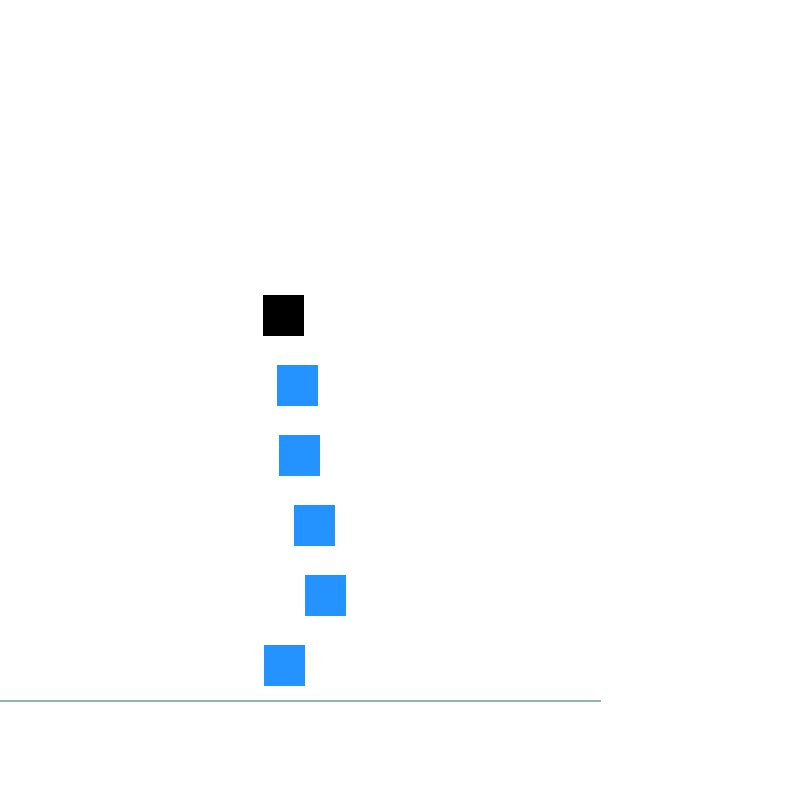

F


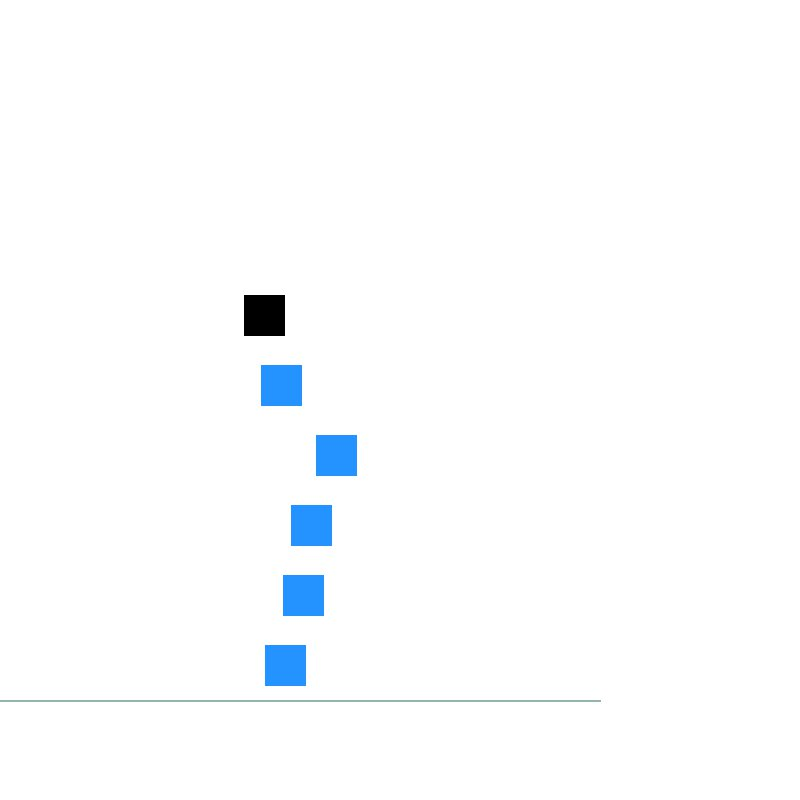

T


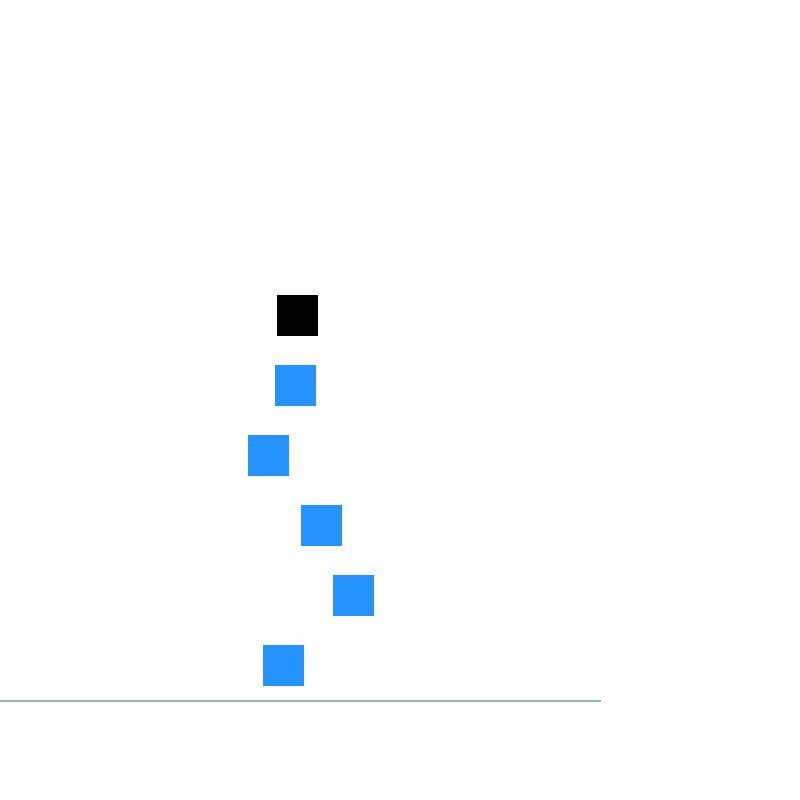

F


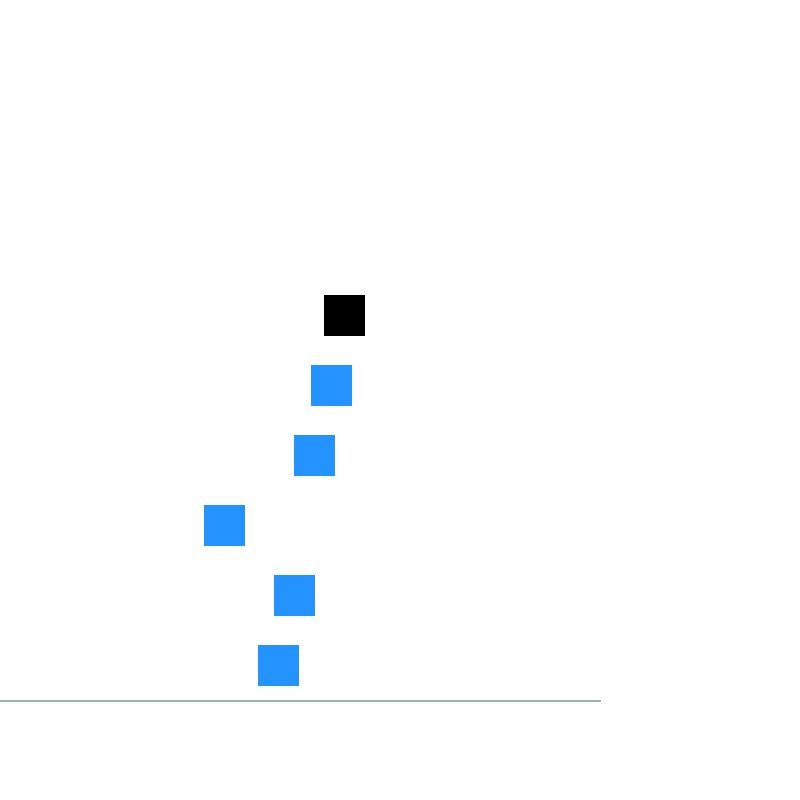

T


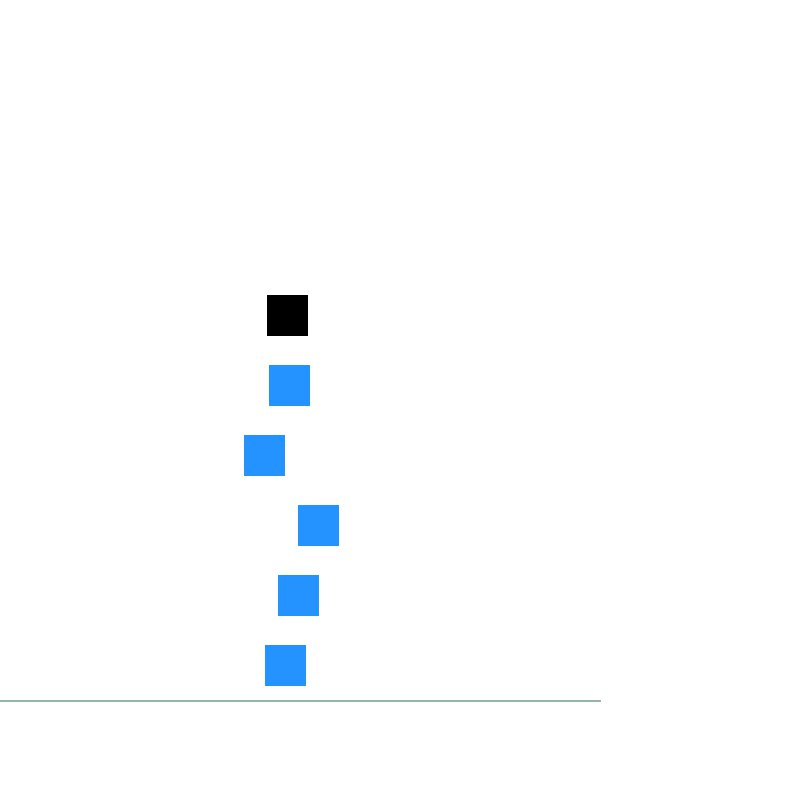

F


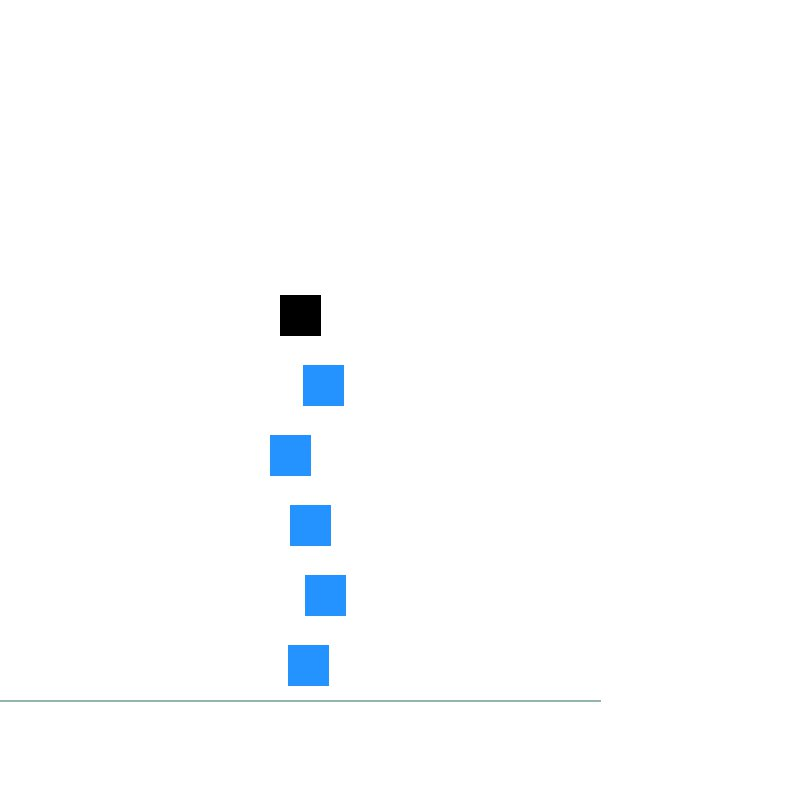

F


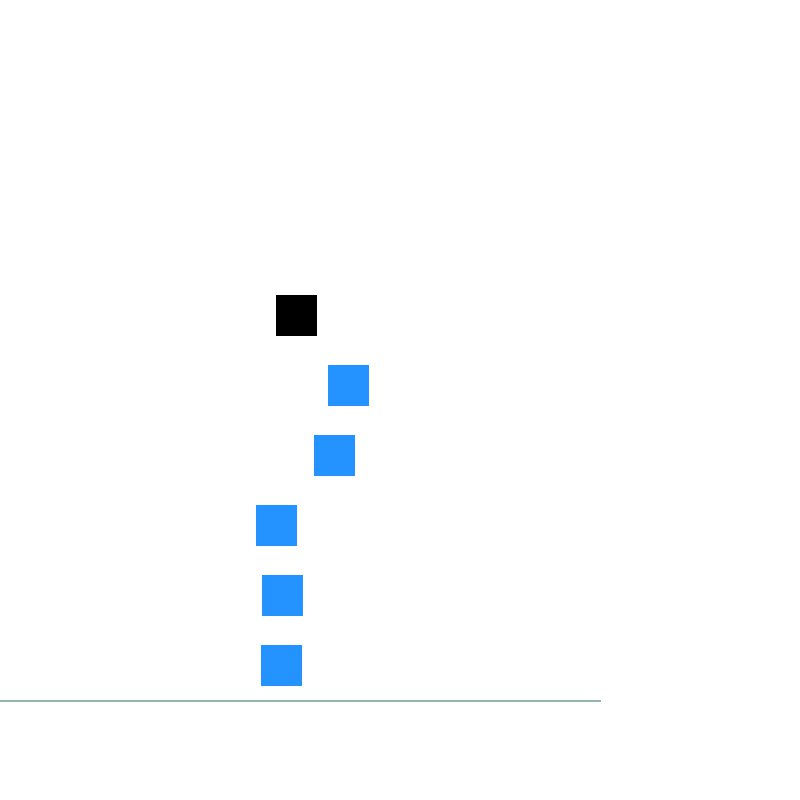

F


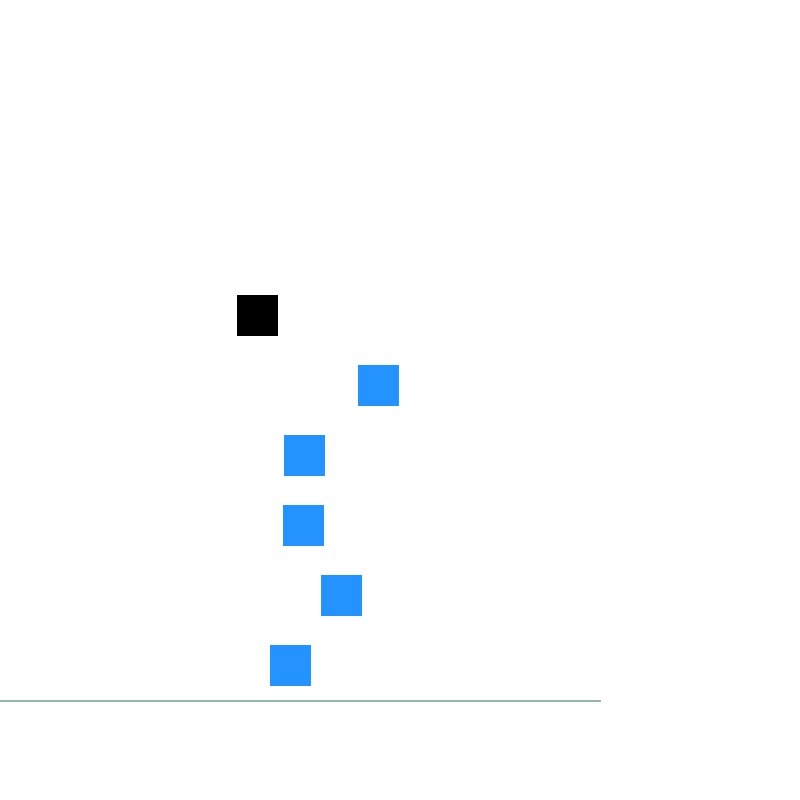

T


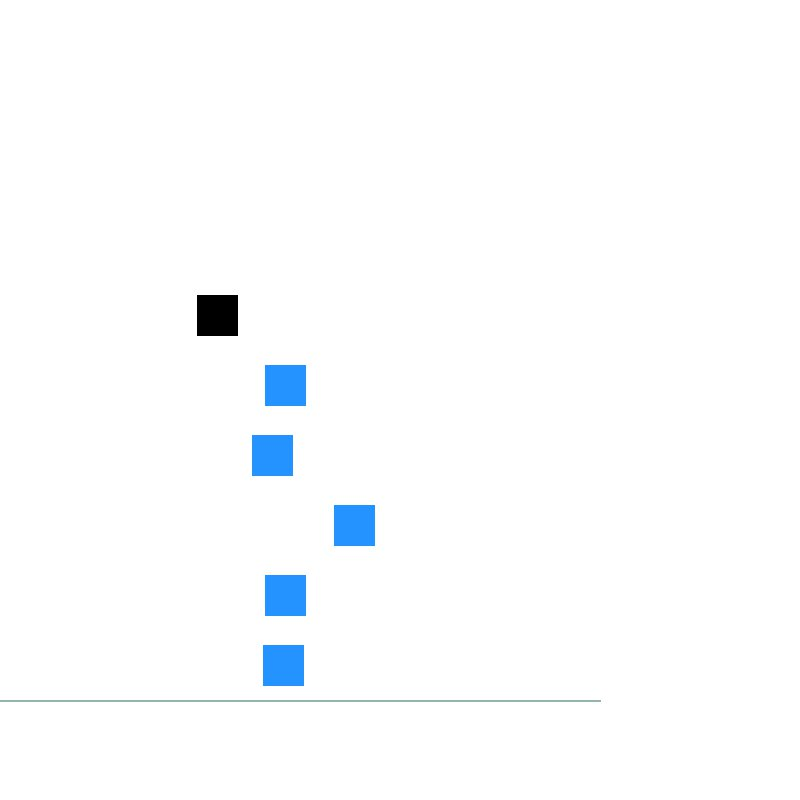

T


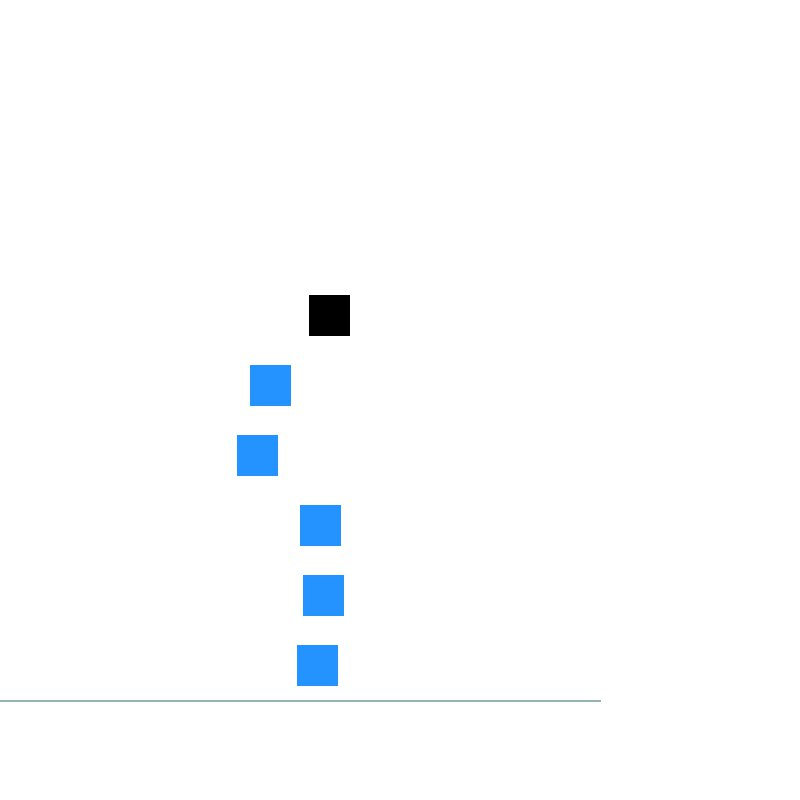

F


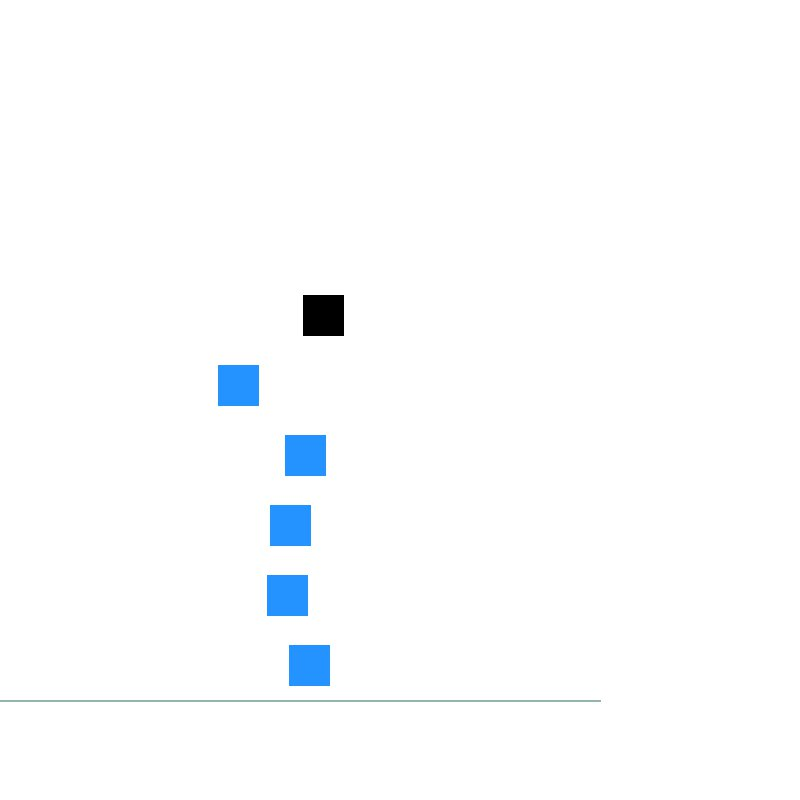

T


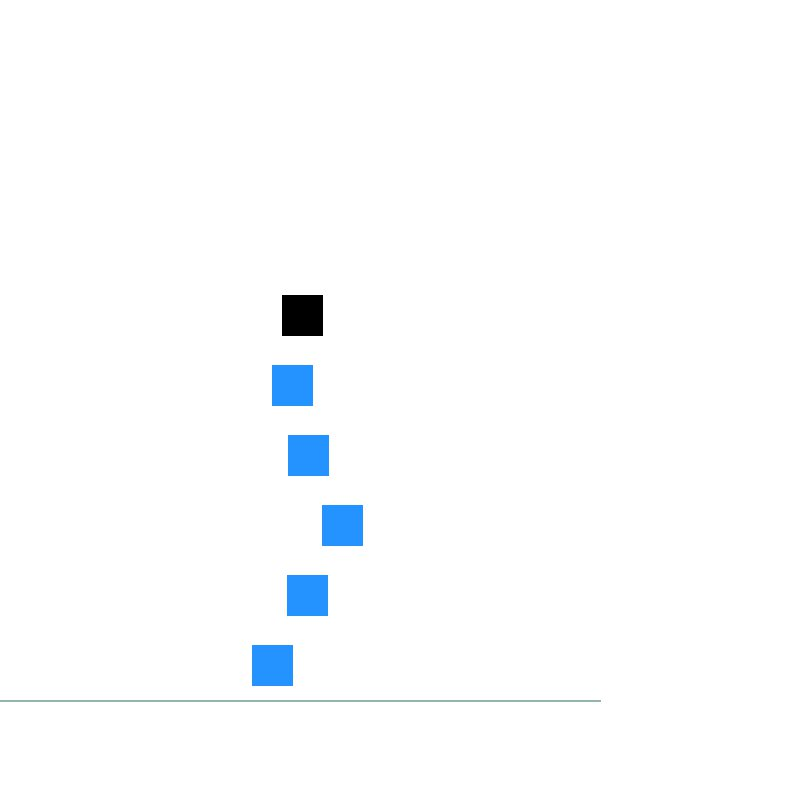

F


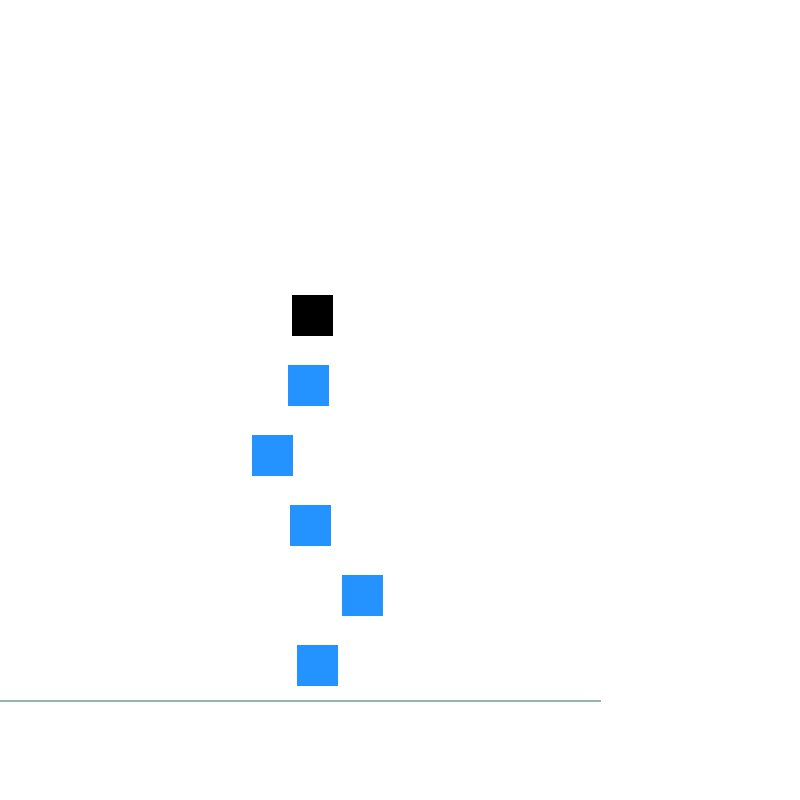

F


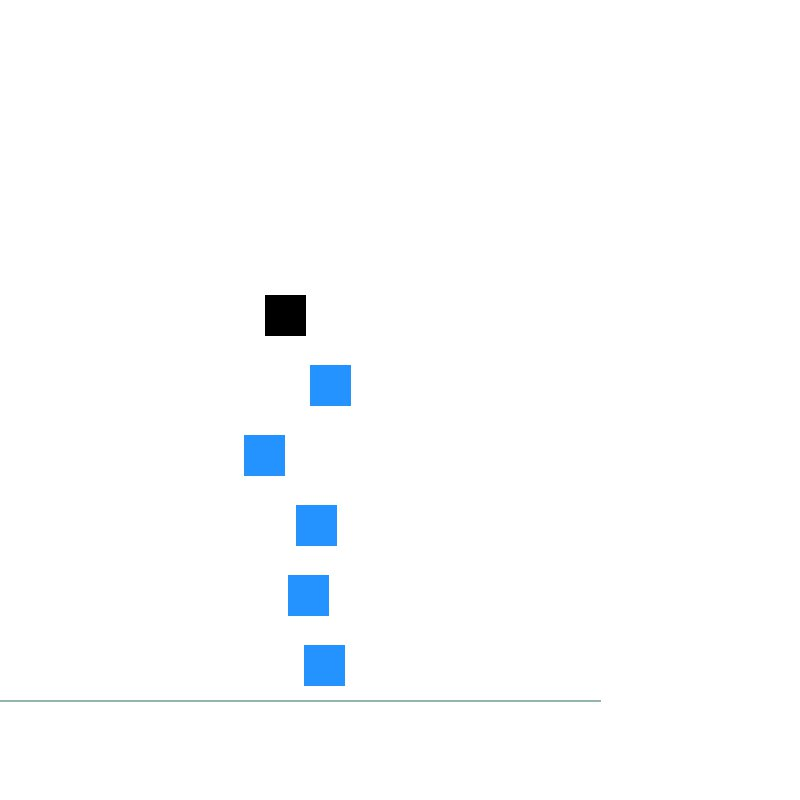

F


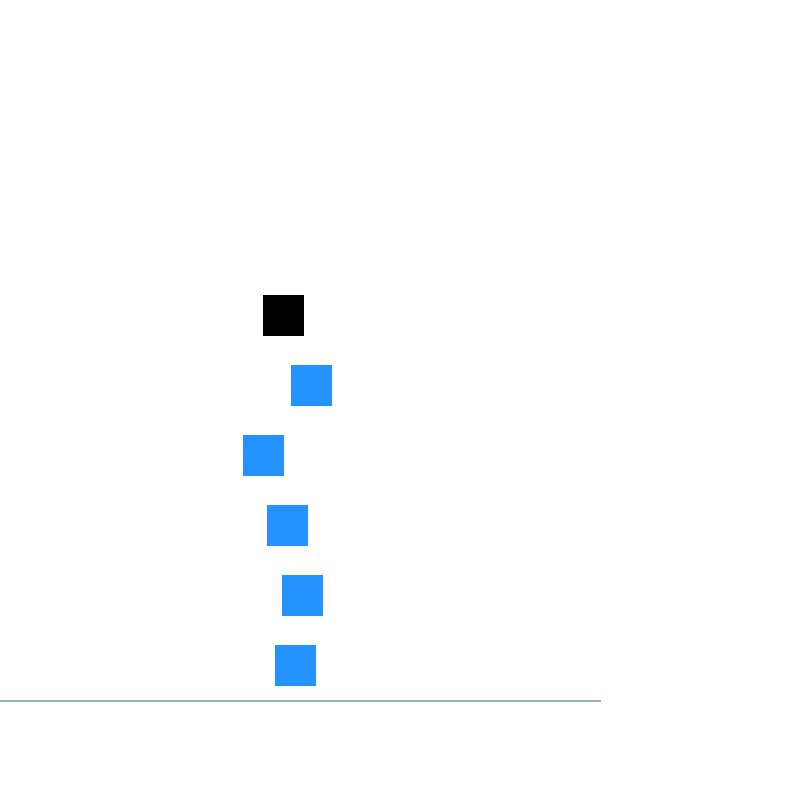

F


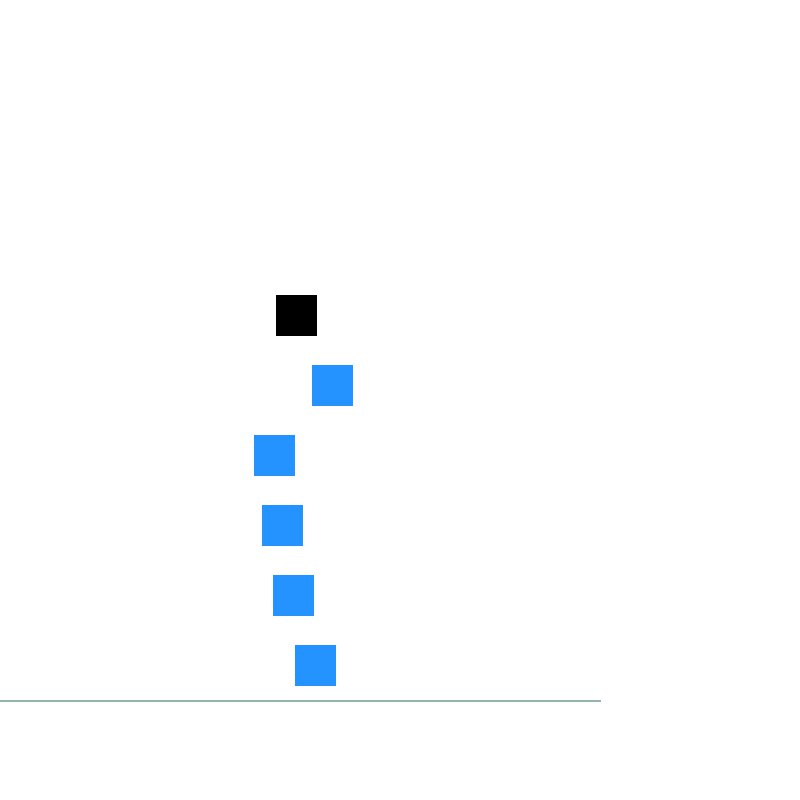

F


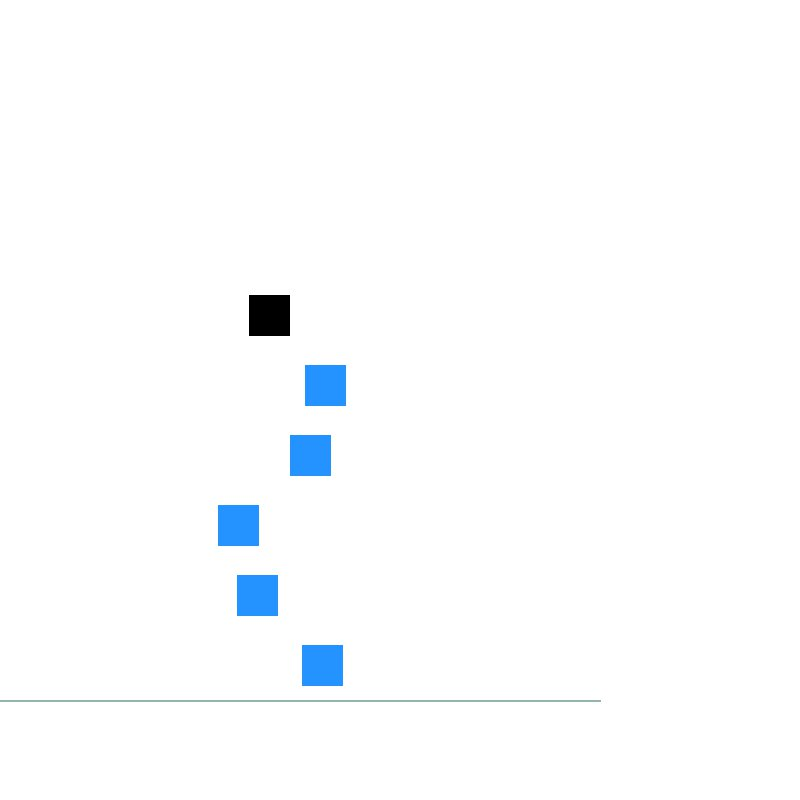

F


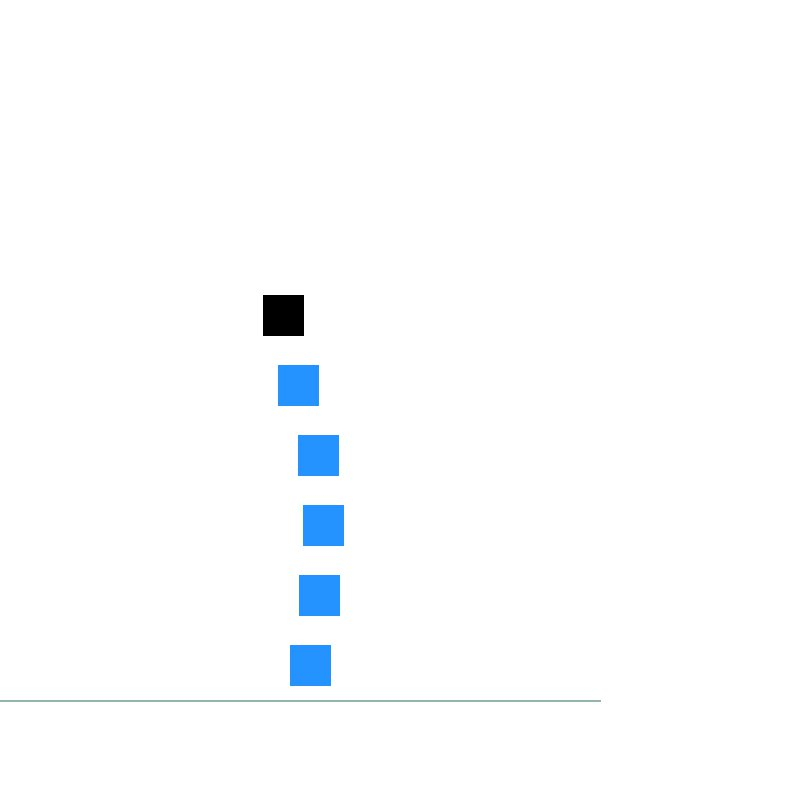

F


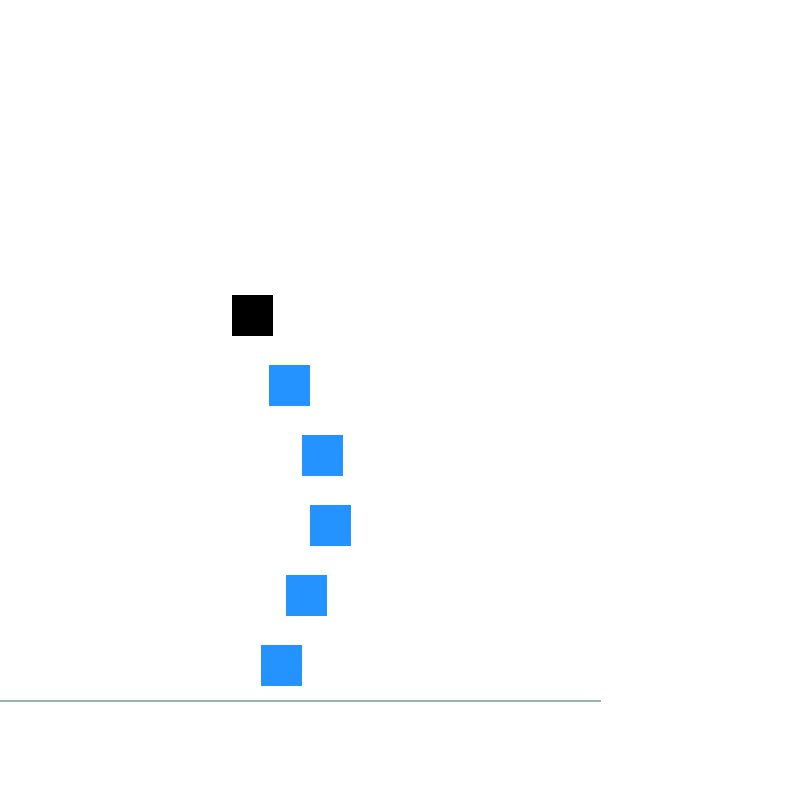

T


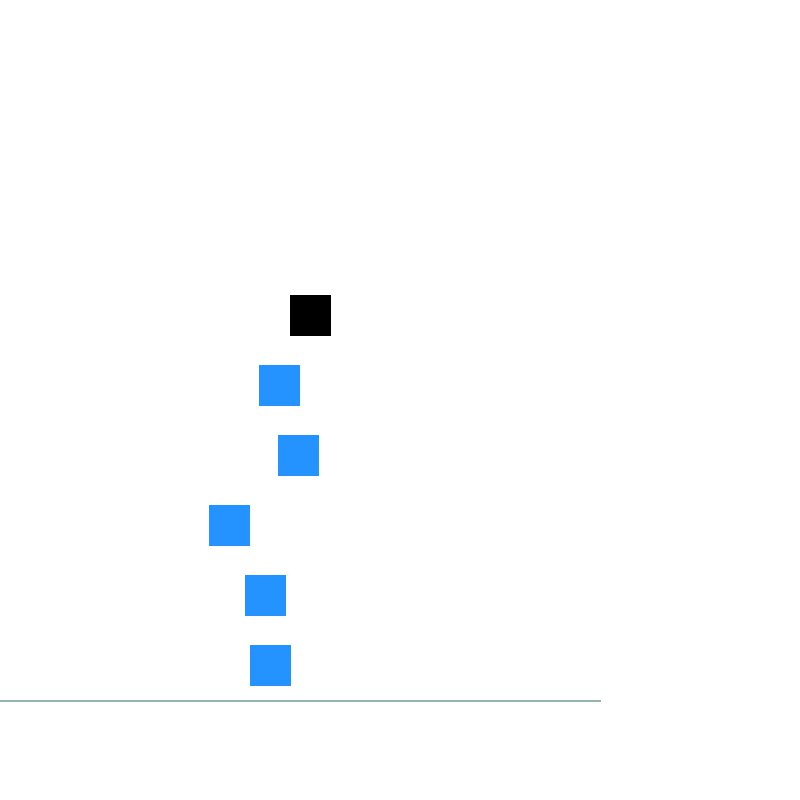

T


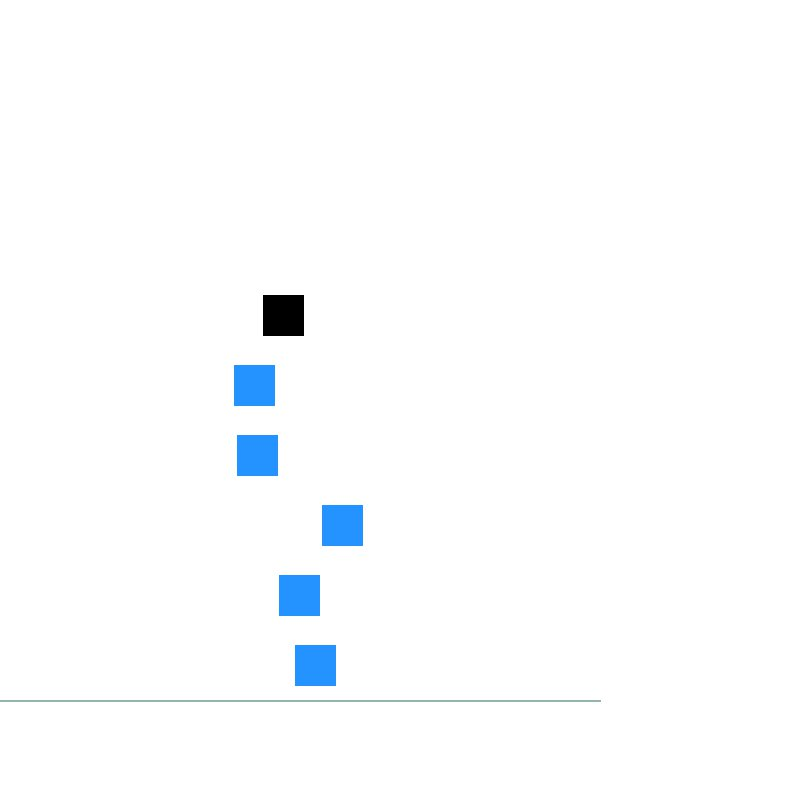

F


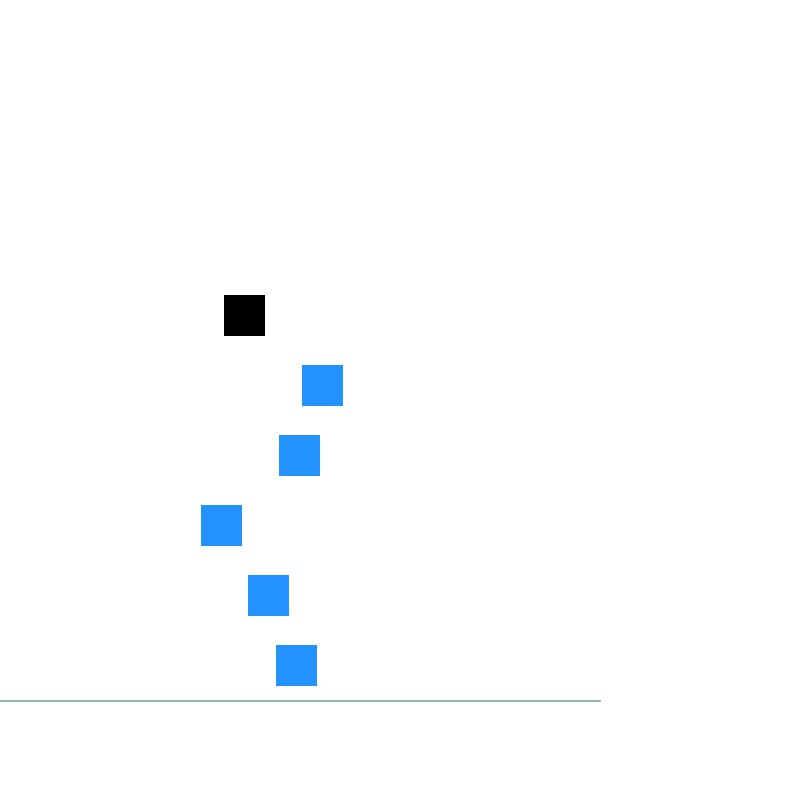

F


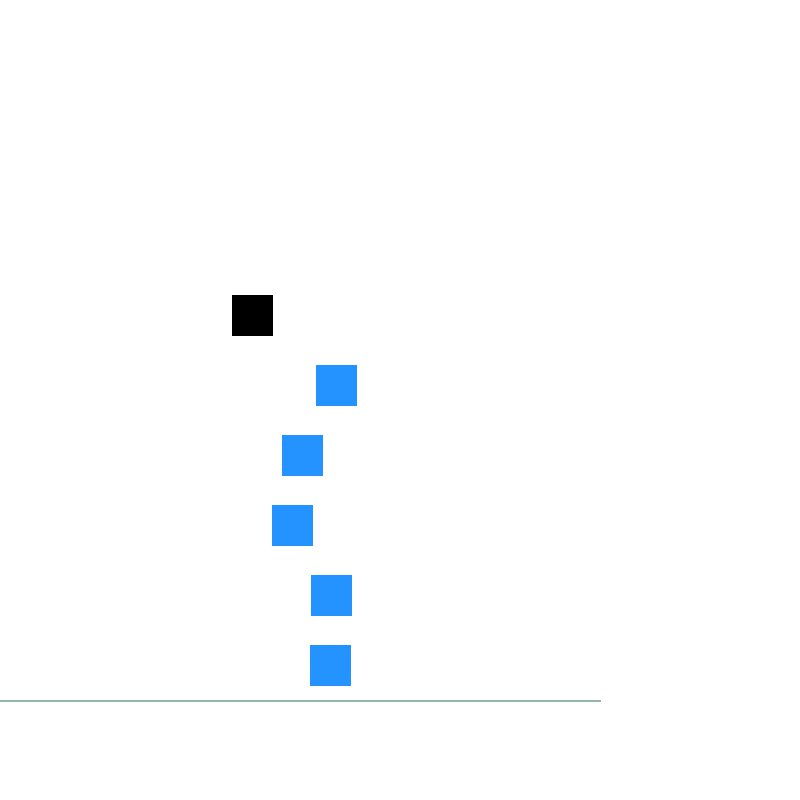

T


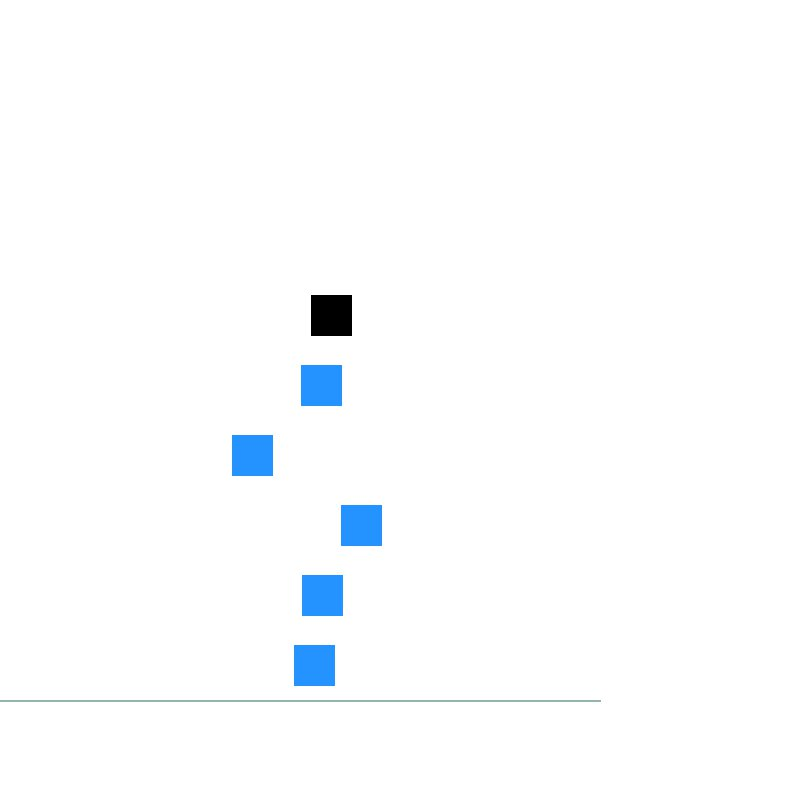

F


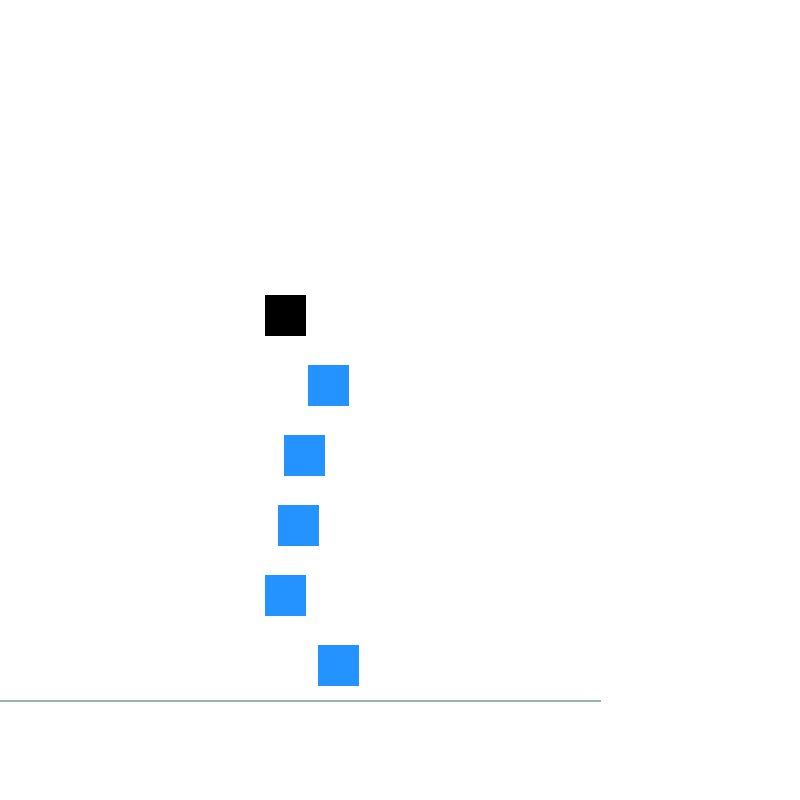

F


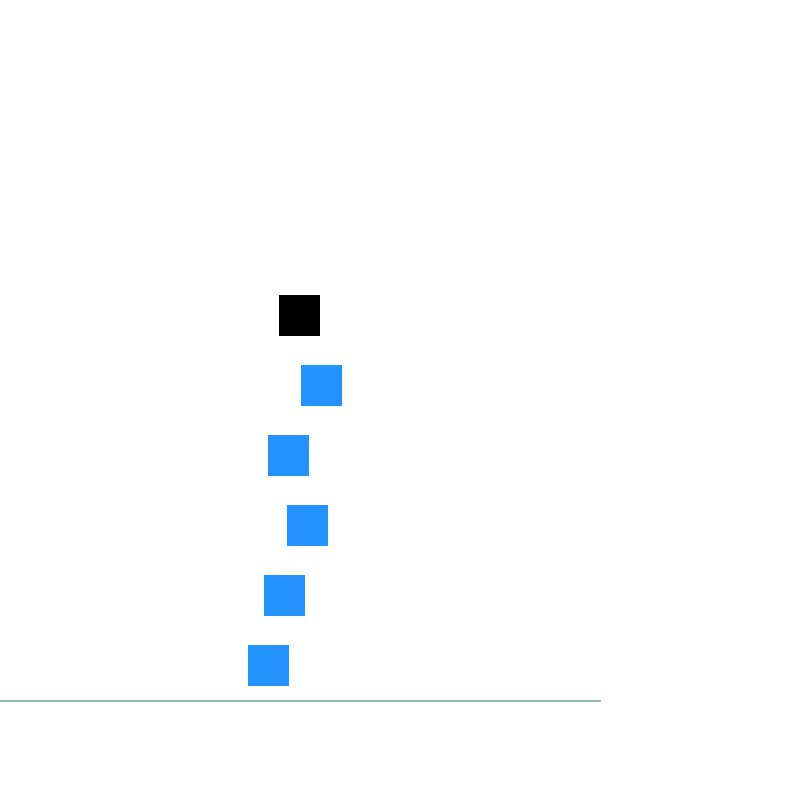

F


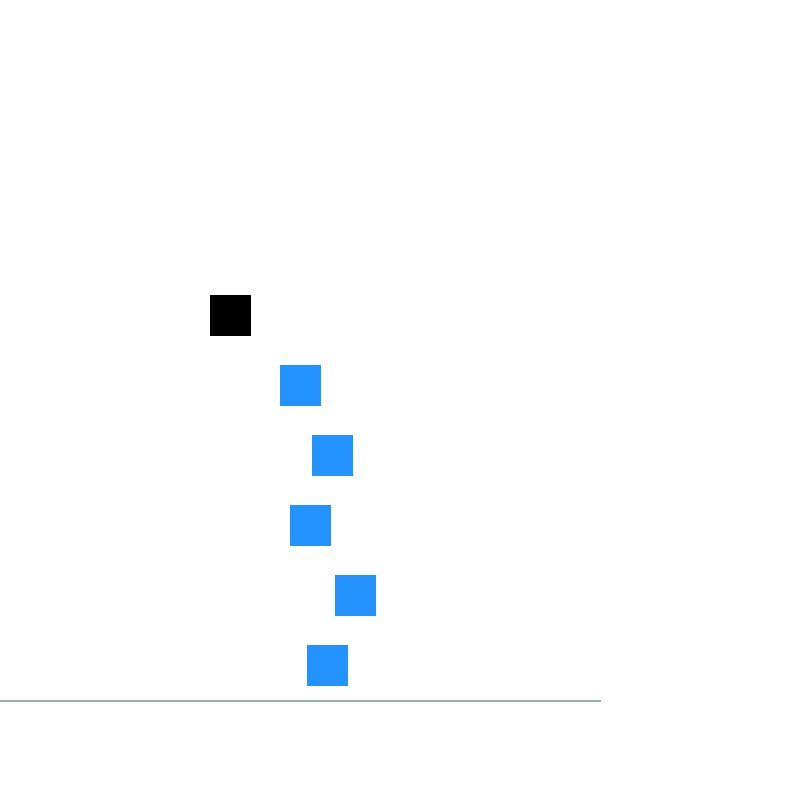

T


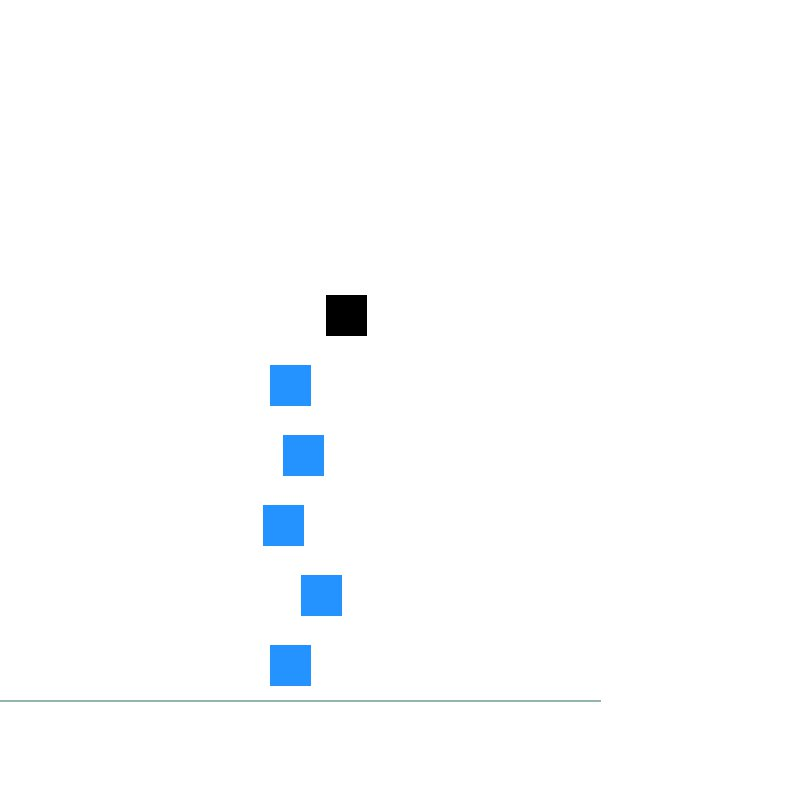

T


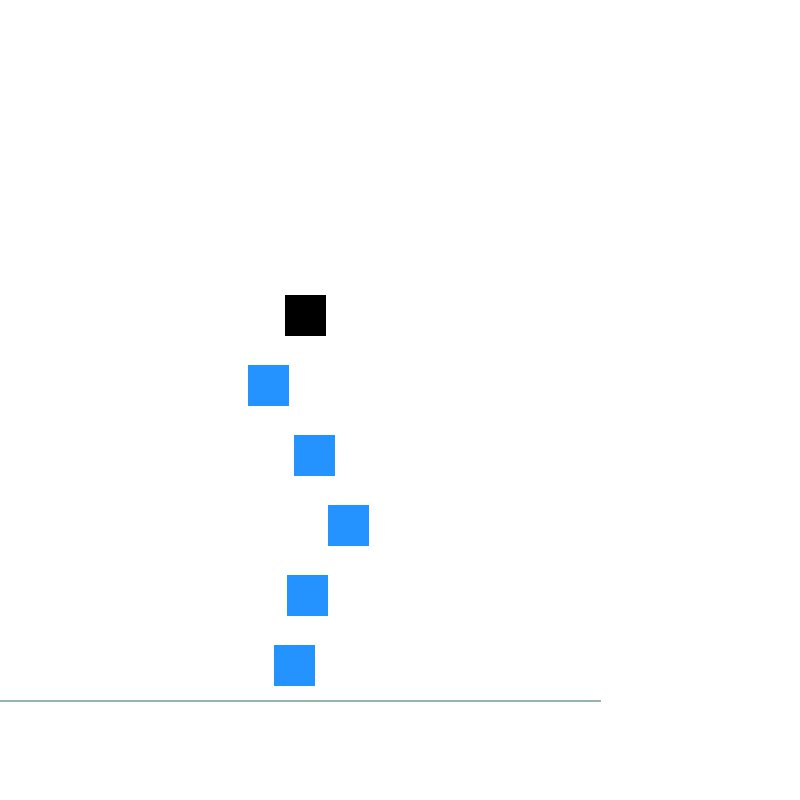

F


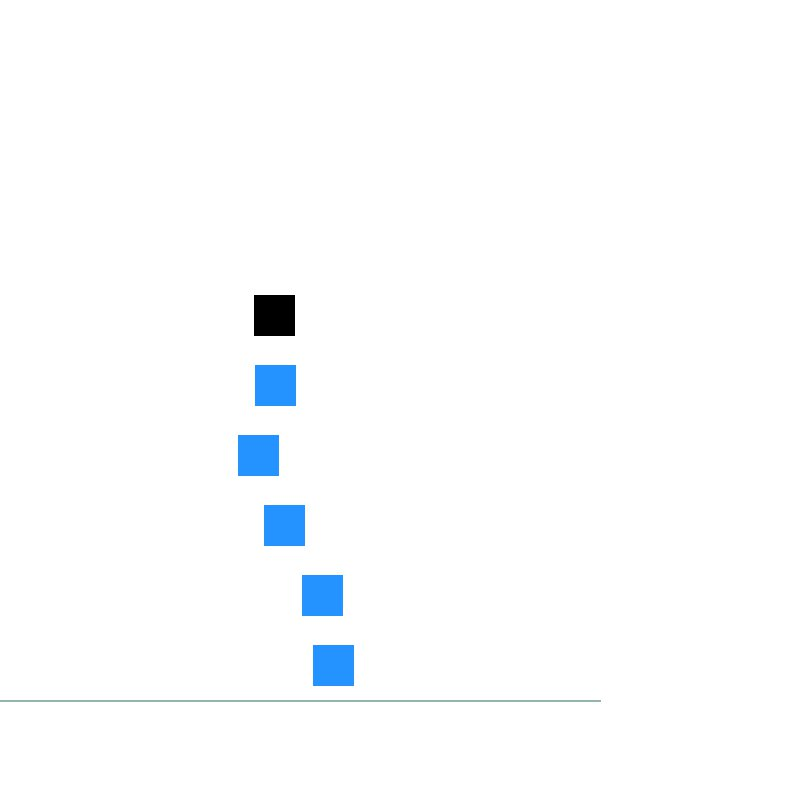

F


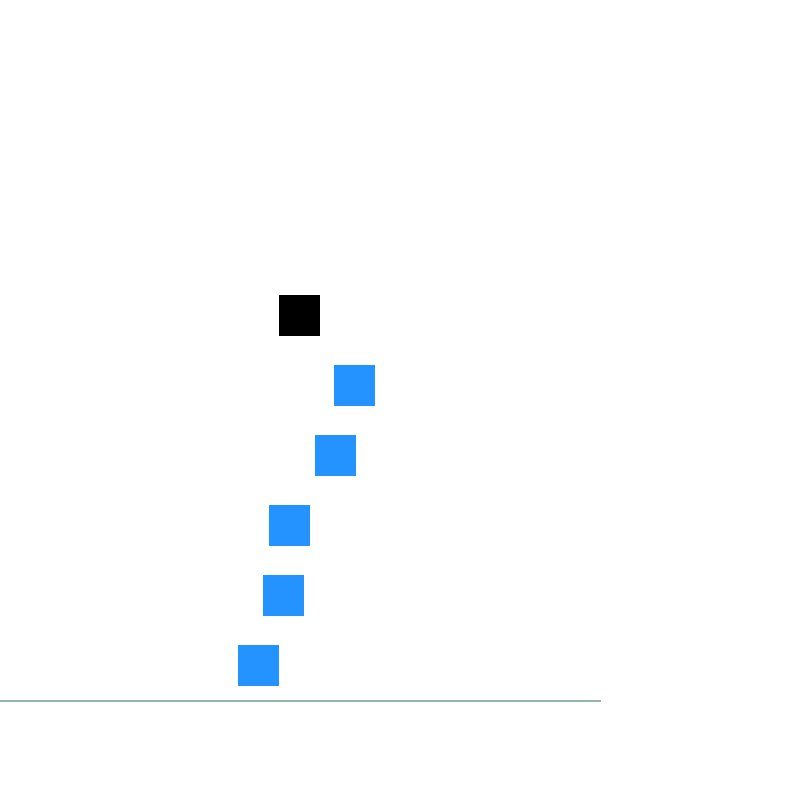

F


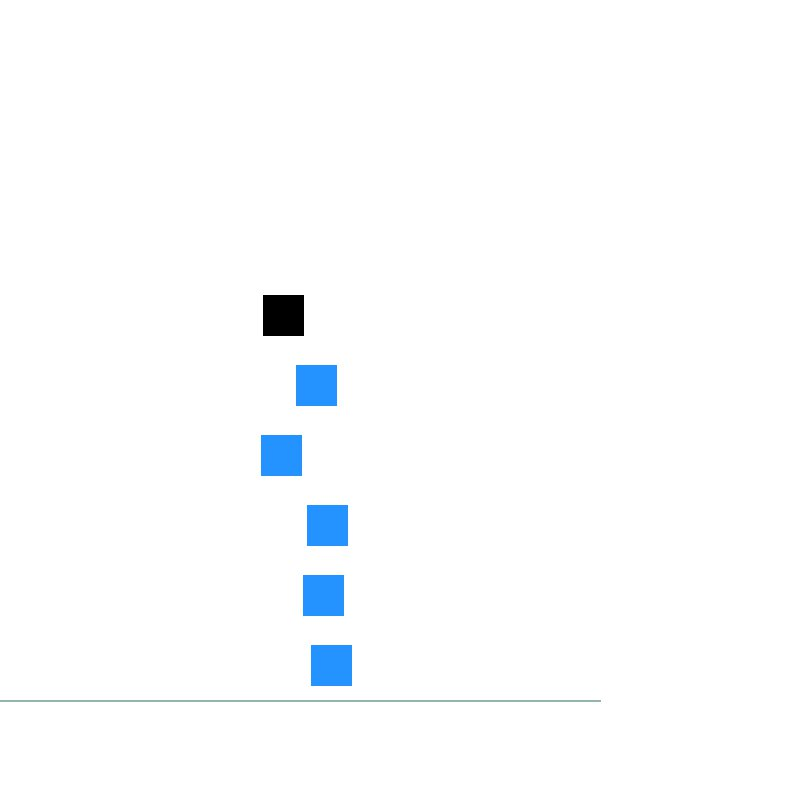

F


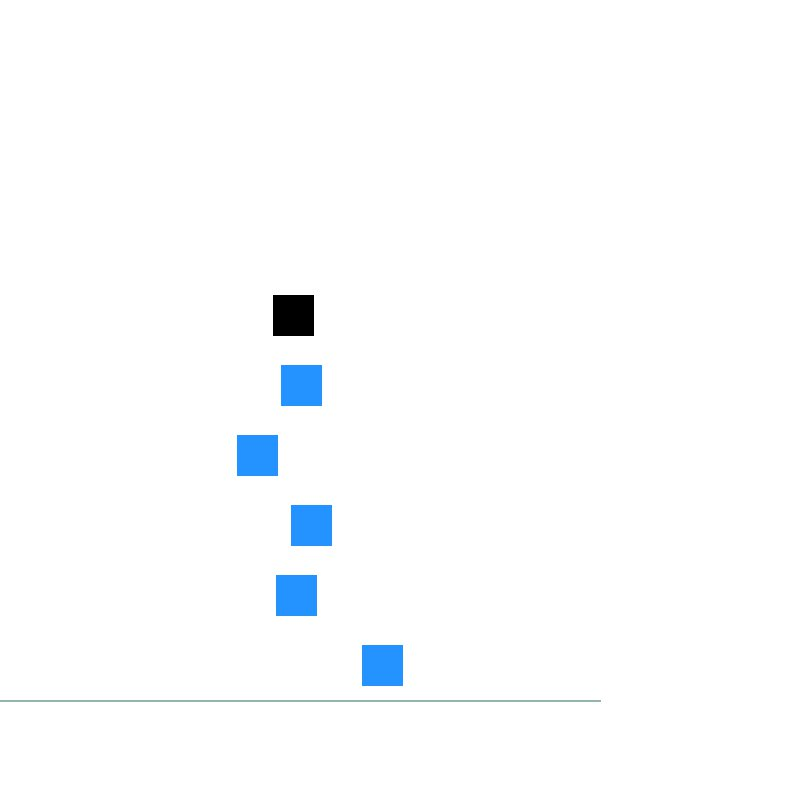

F


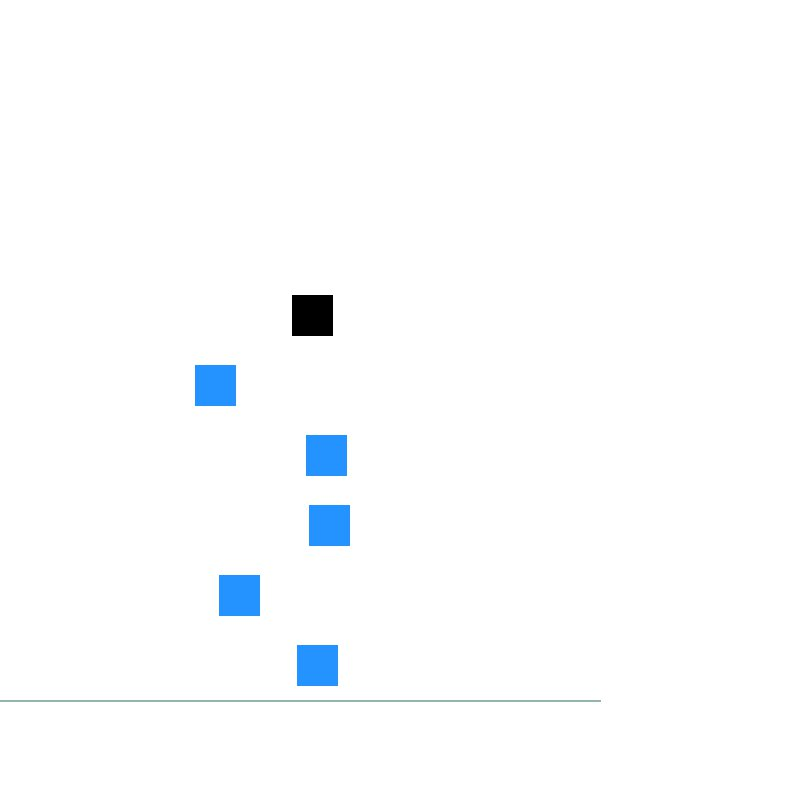

F


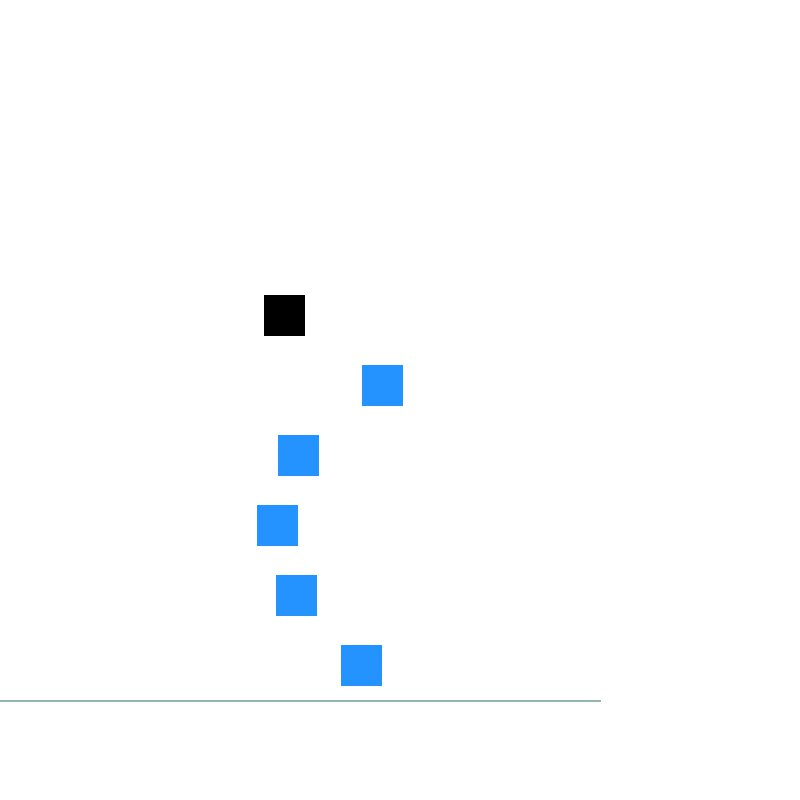

F


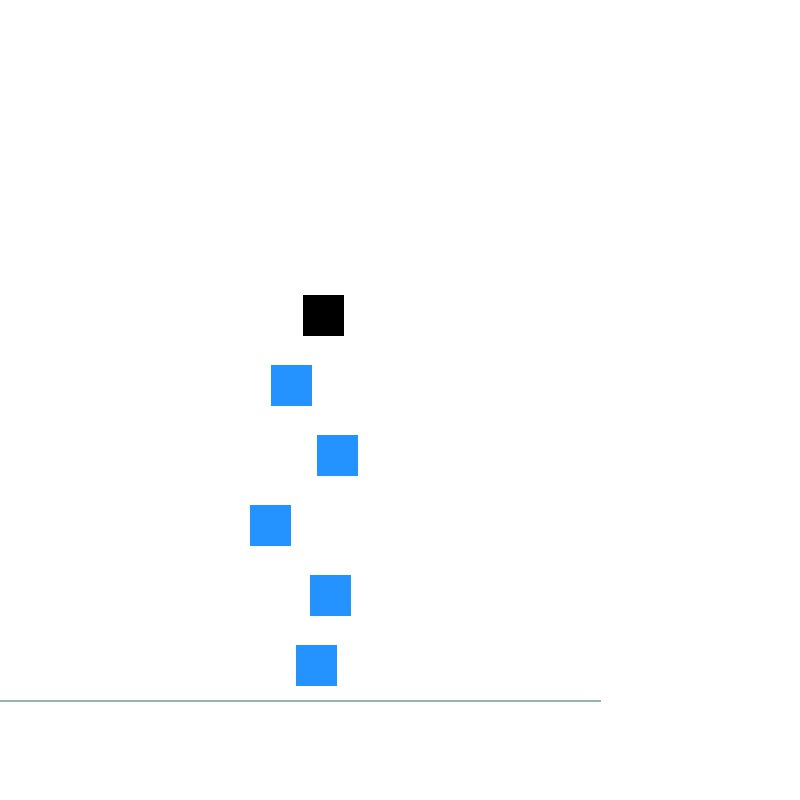

F


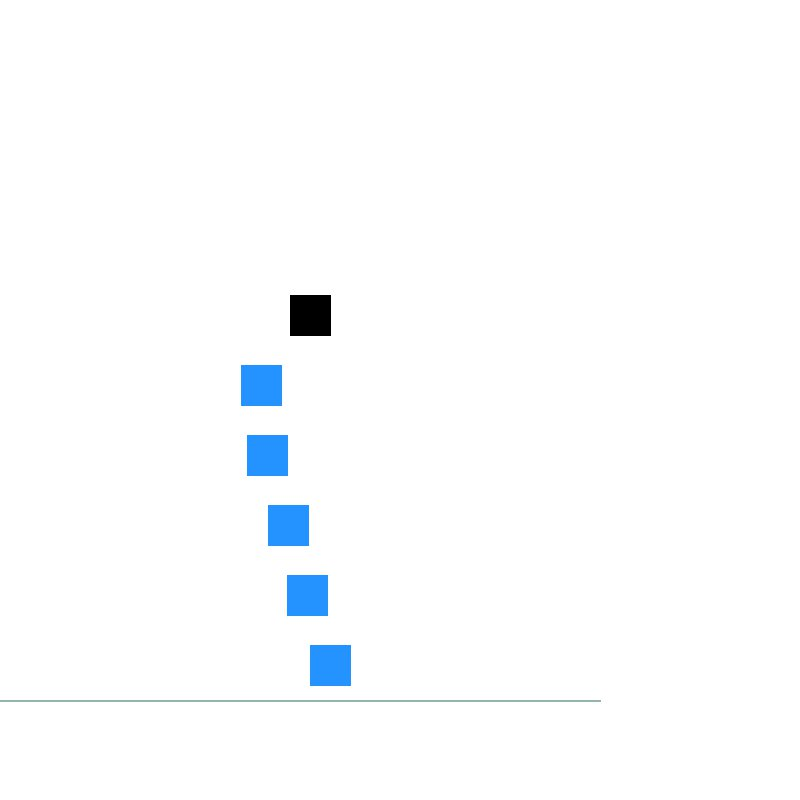

F


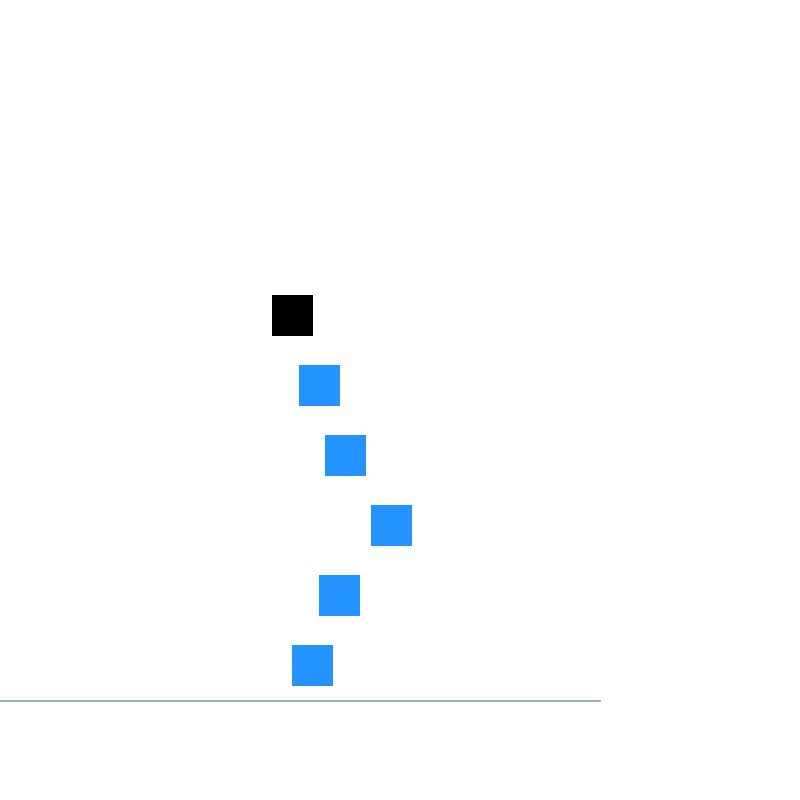

T


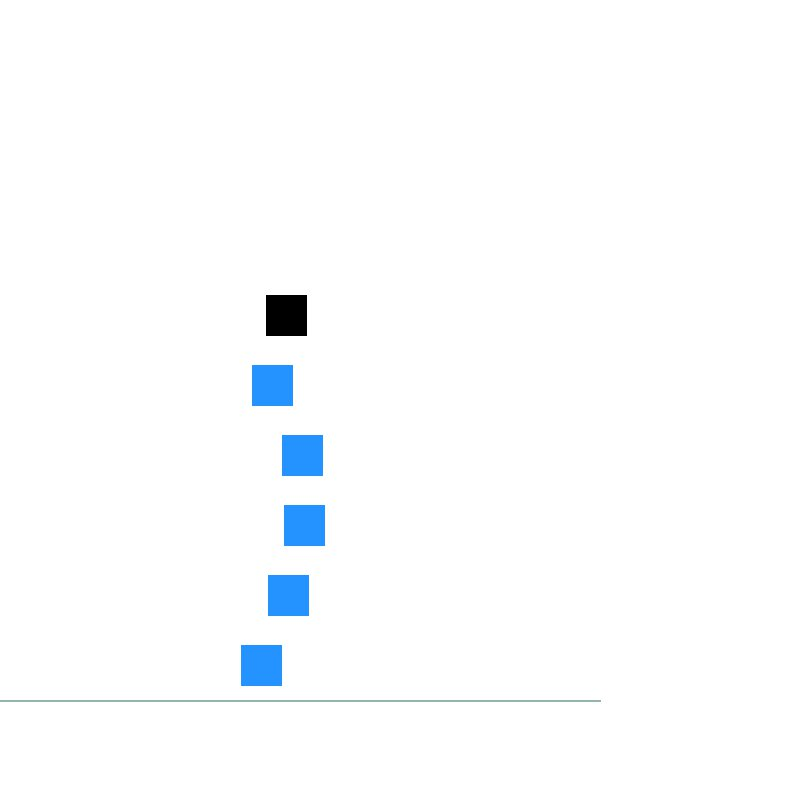

F


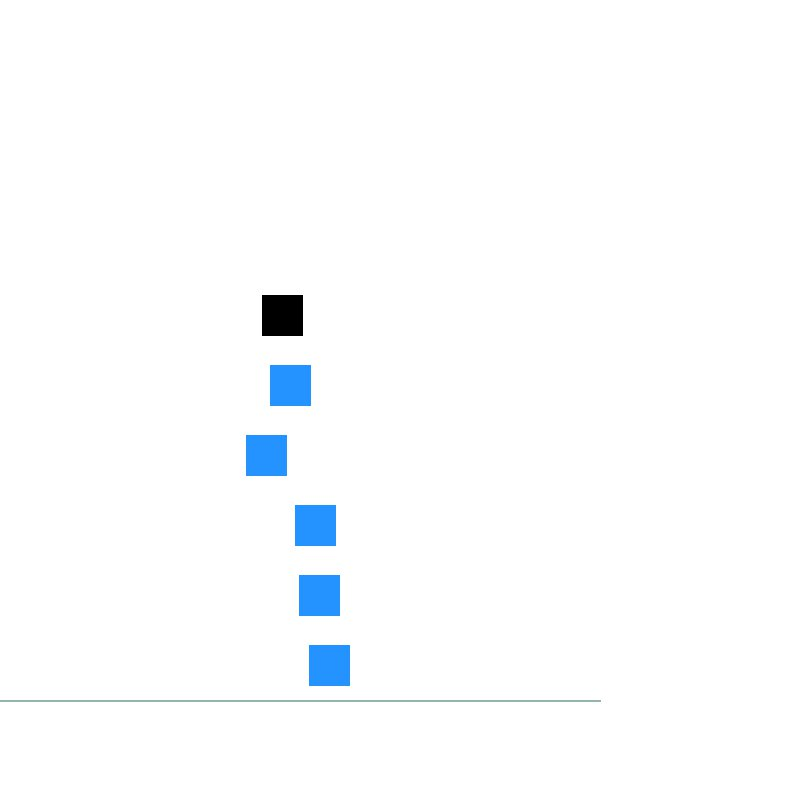

F


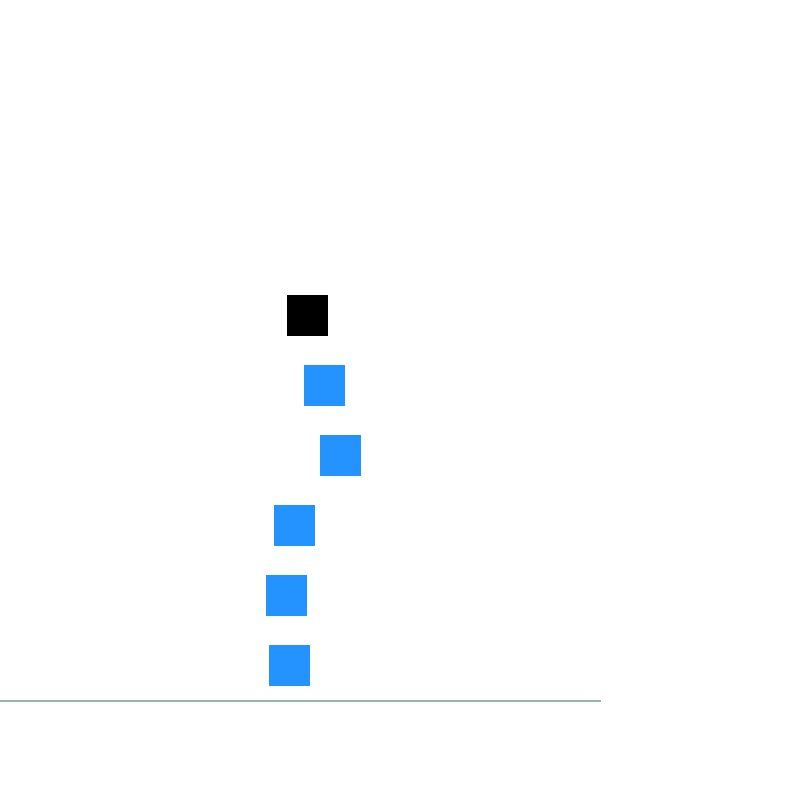

F


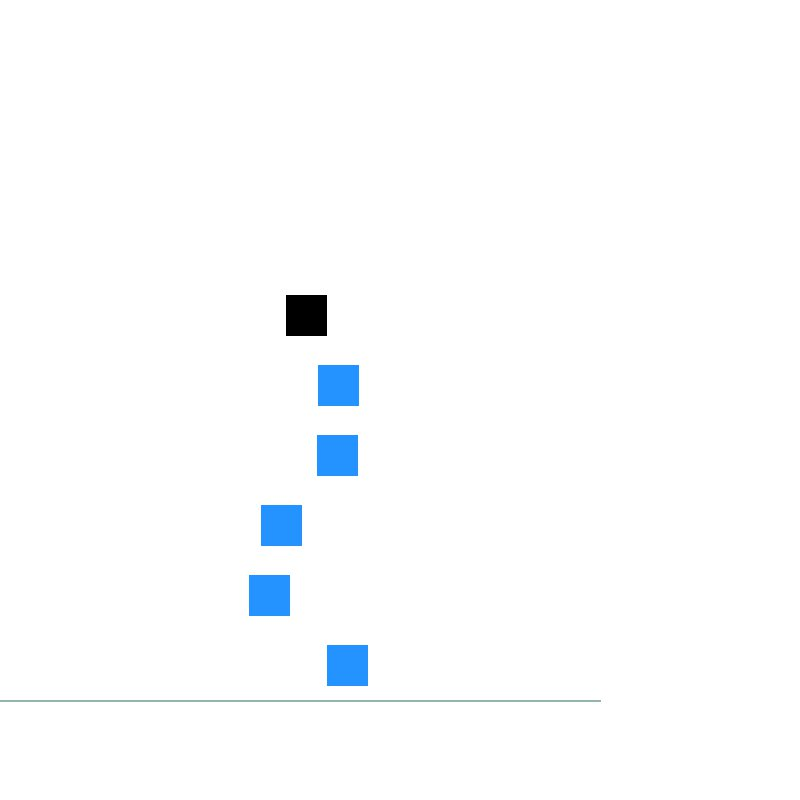

F


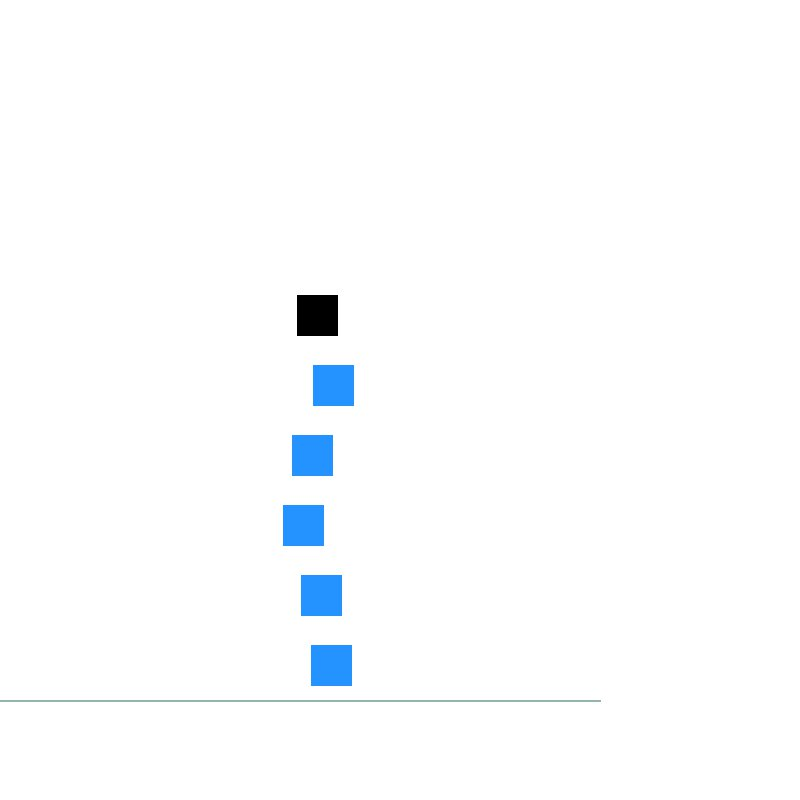

F


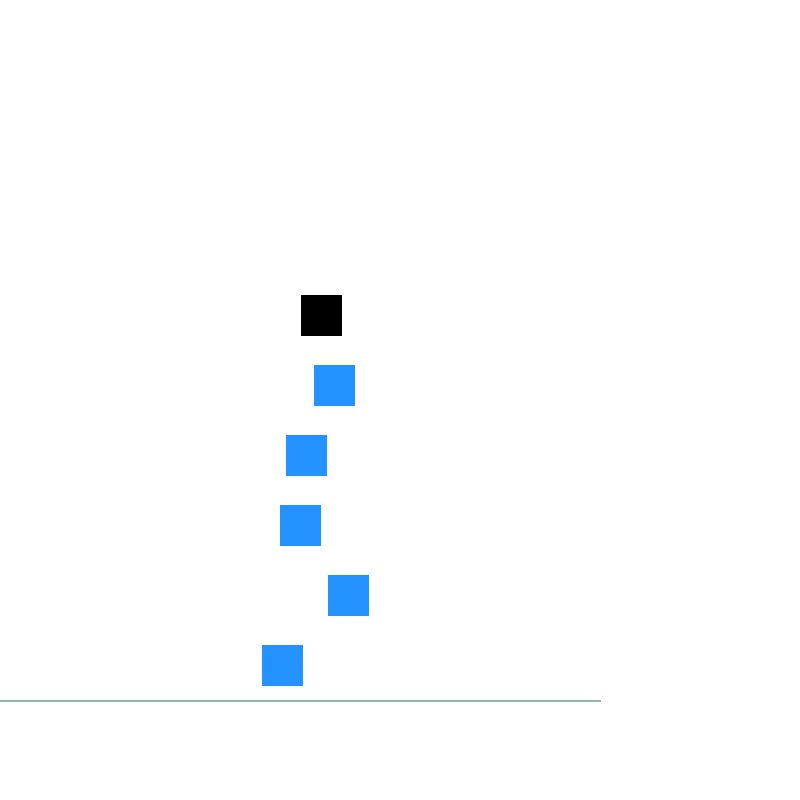

F


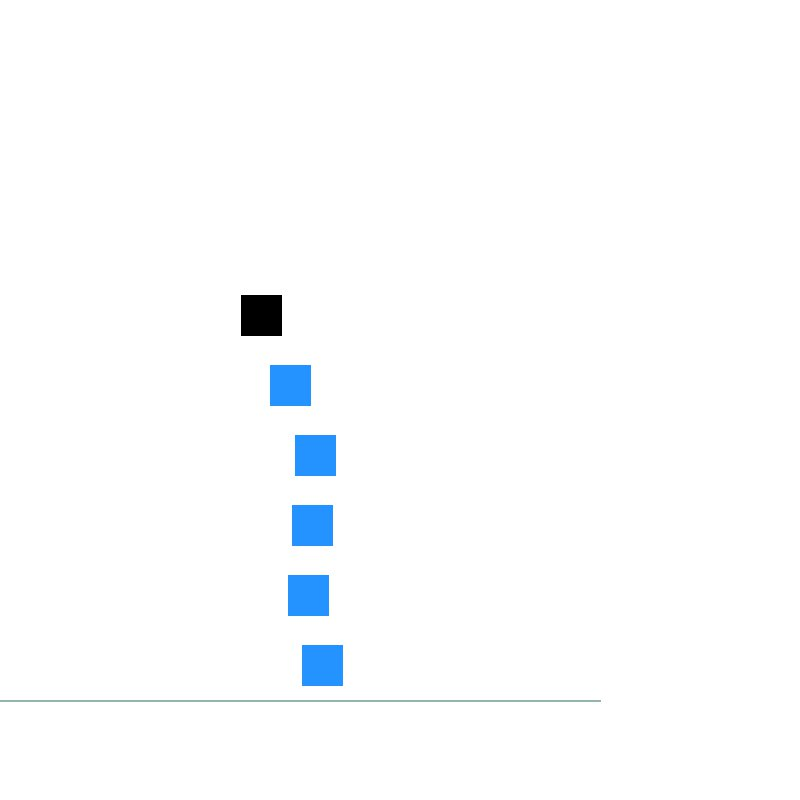

T


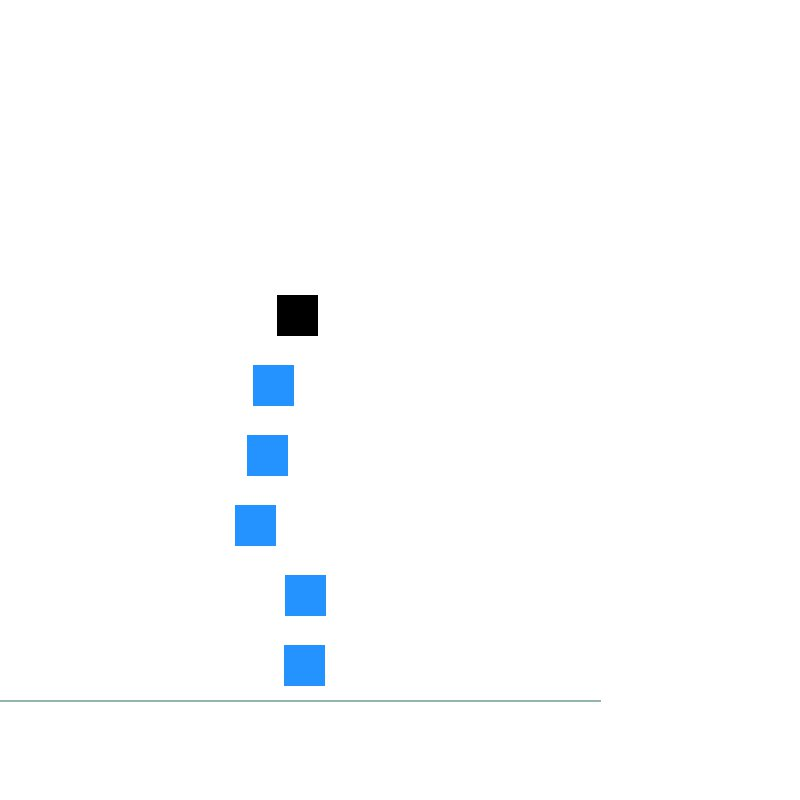

F


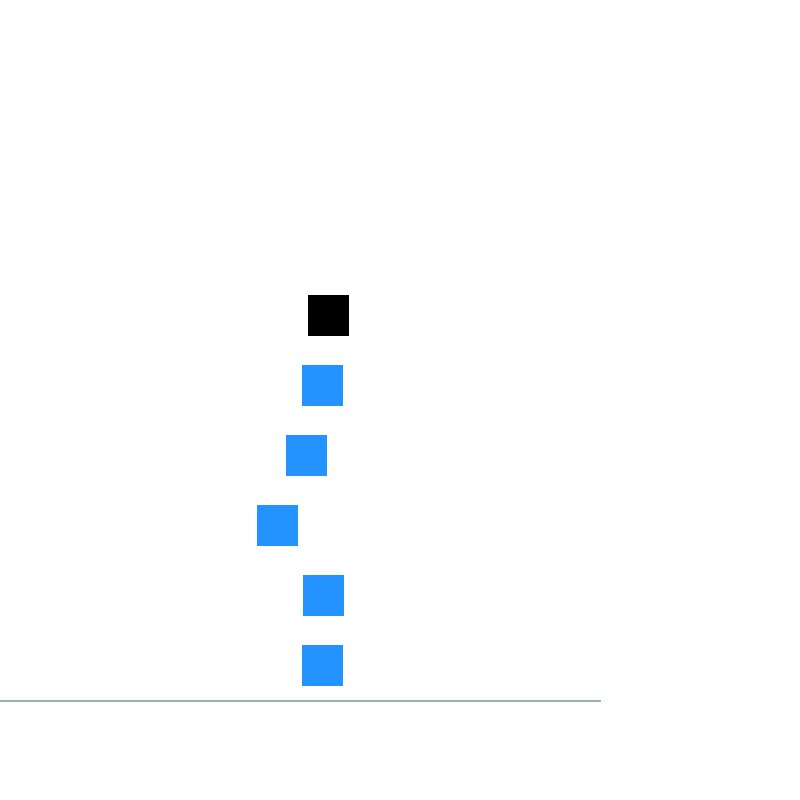

F


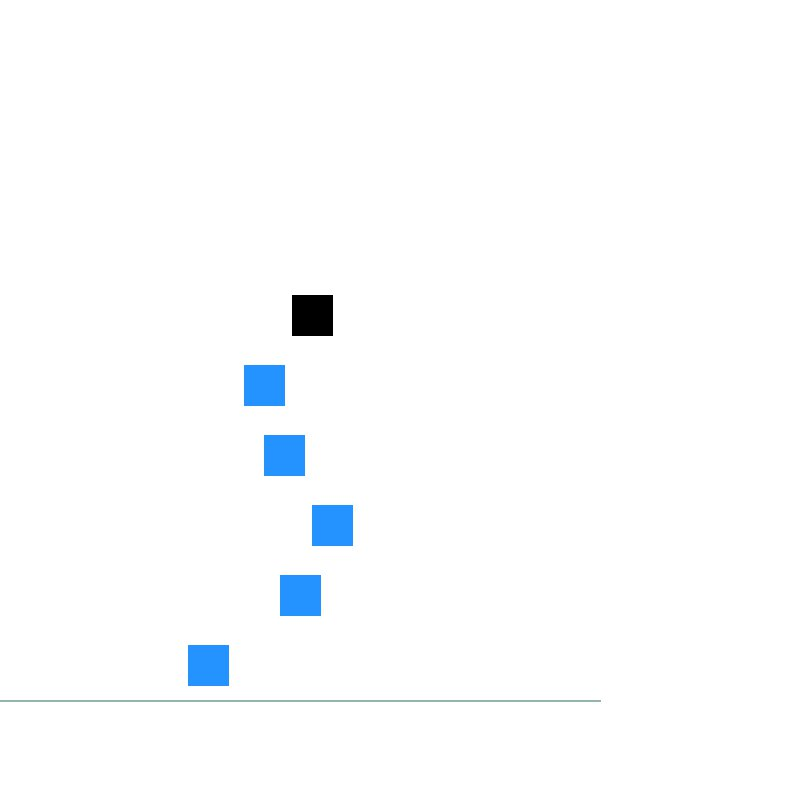

F


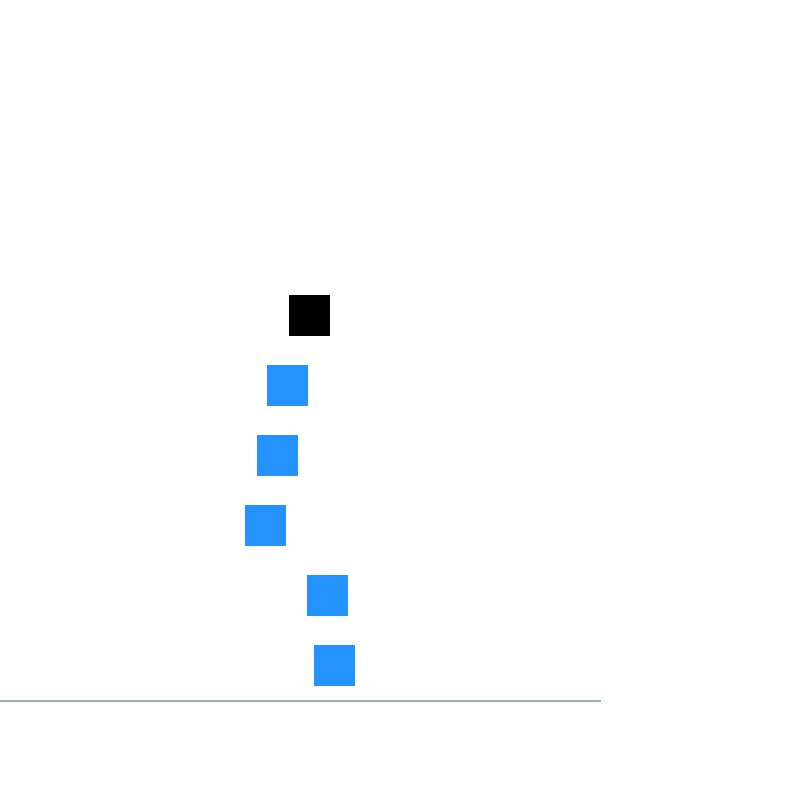

F


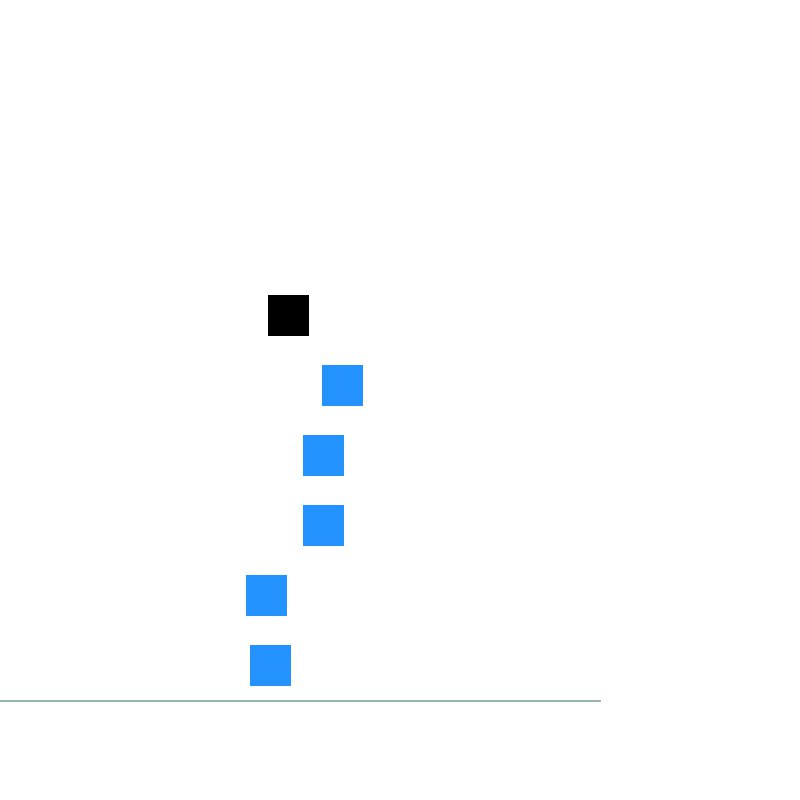

F


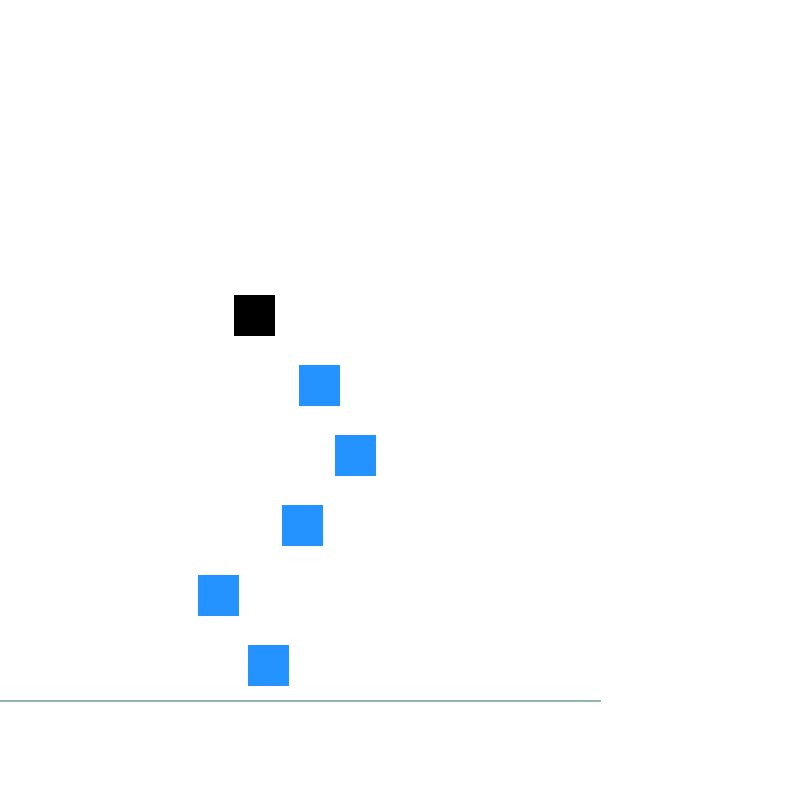

F


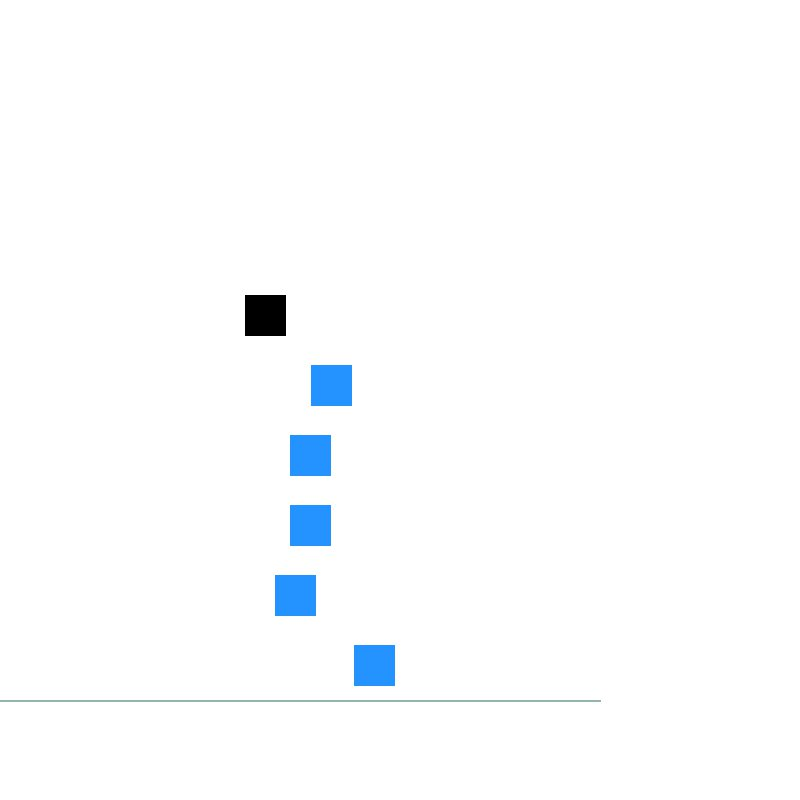

T


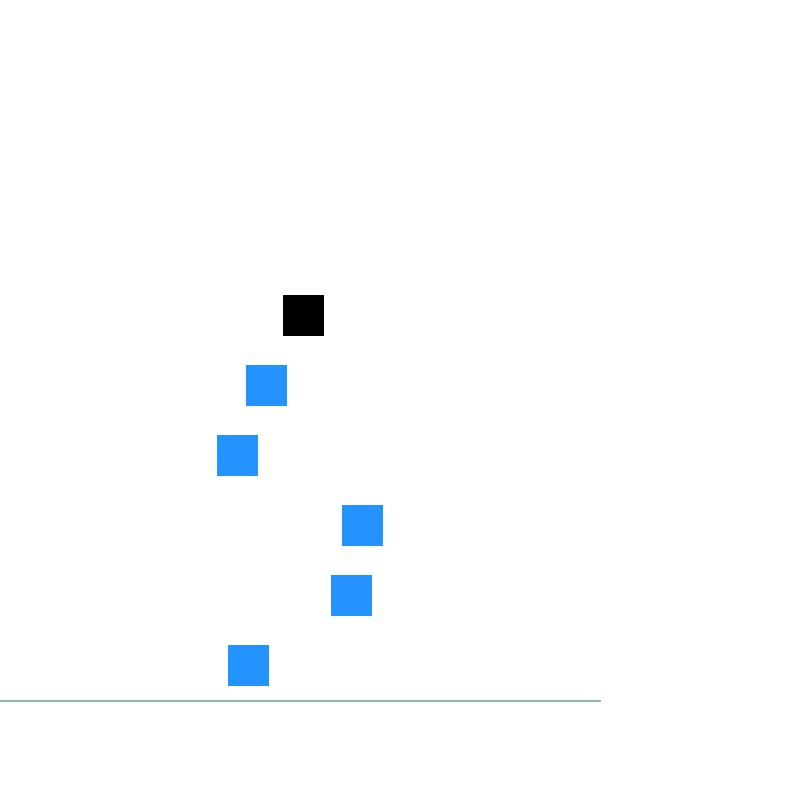

T


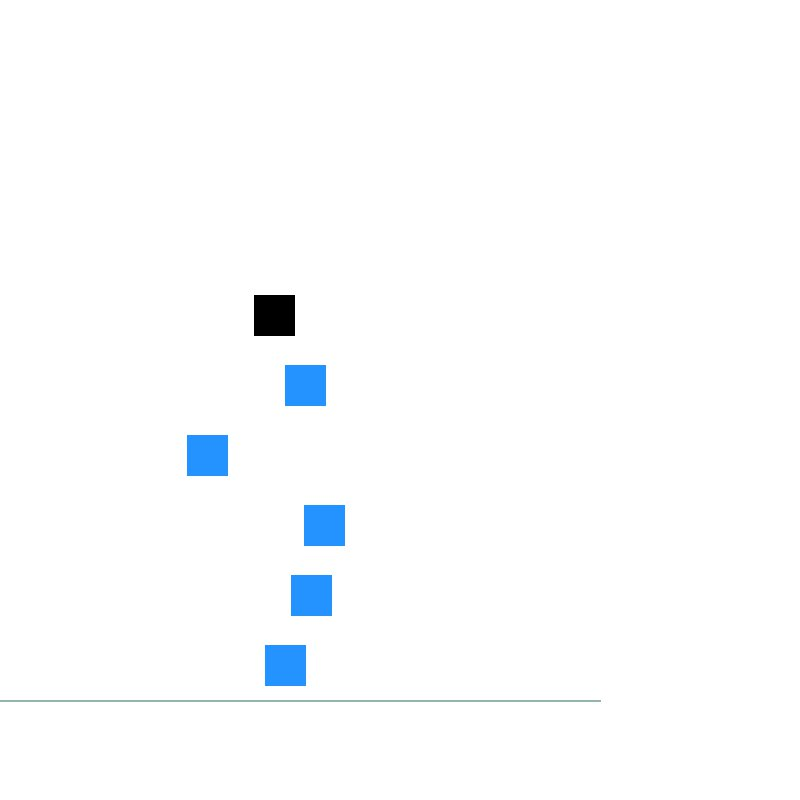

F


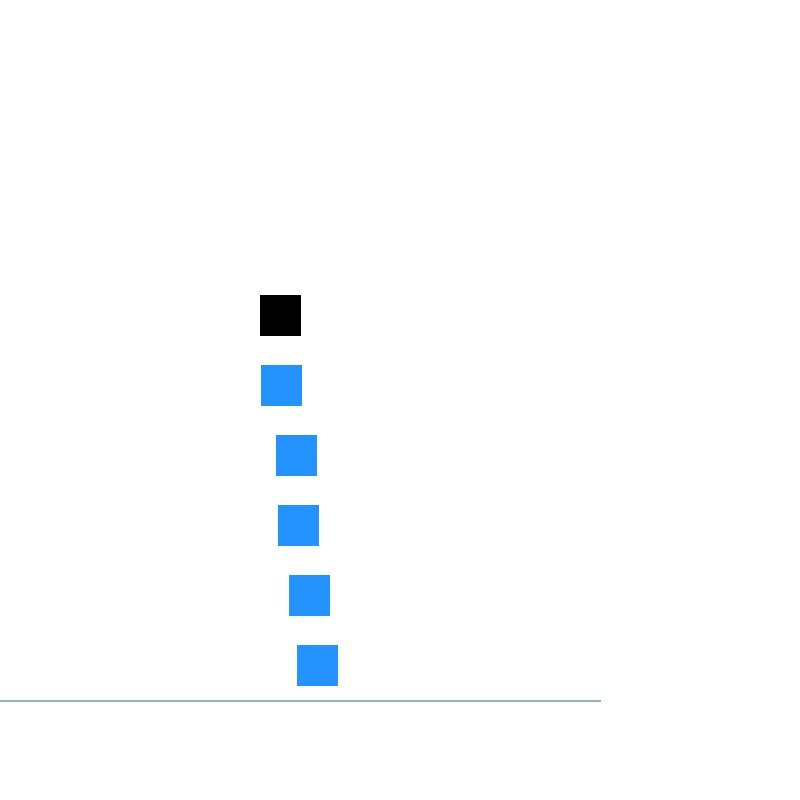

T


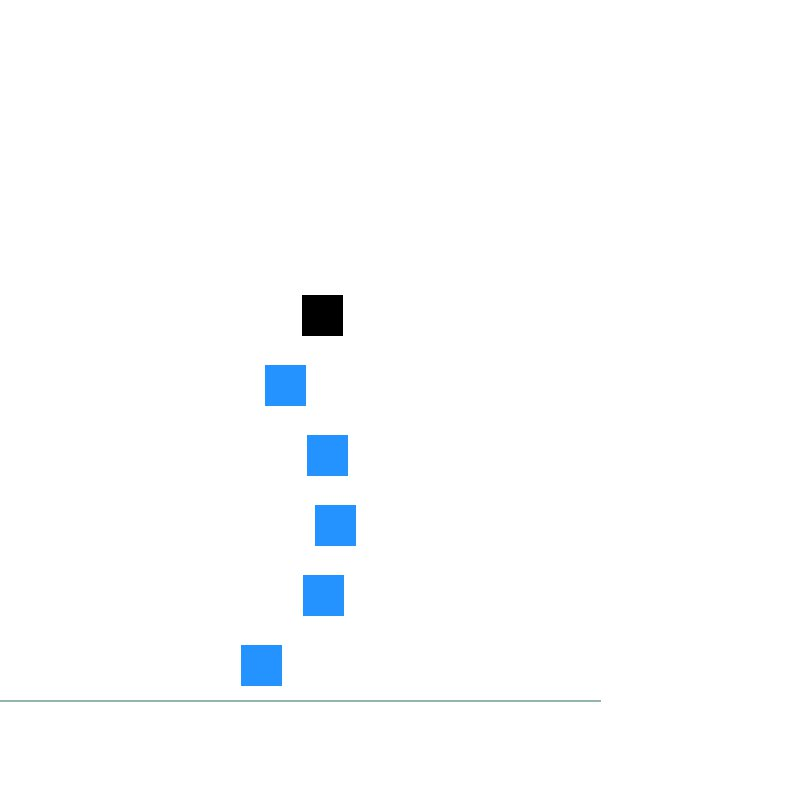

F


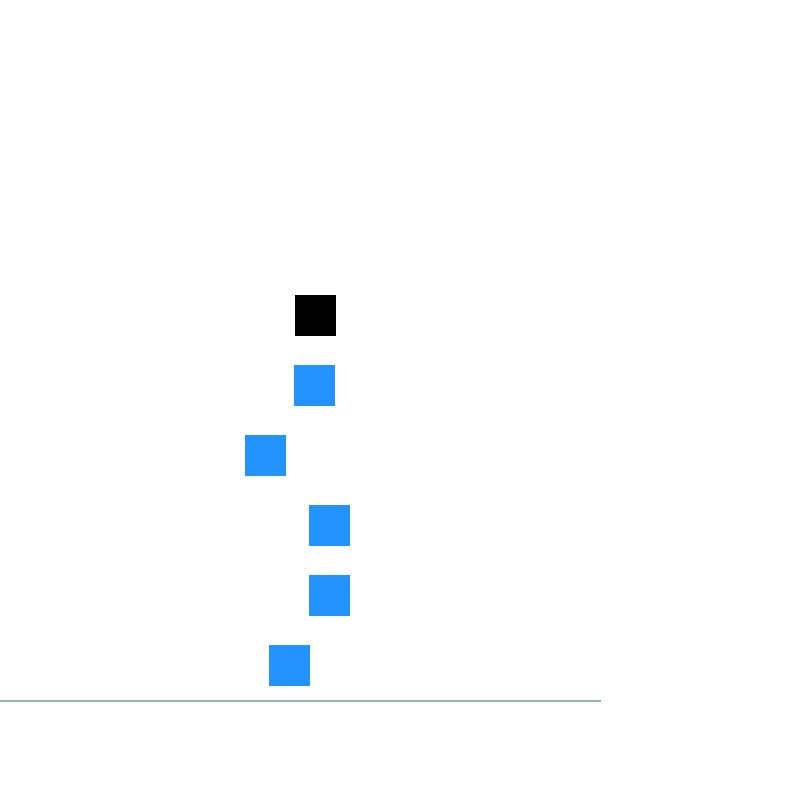

F


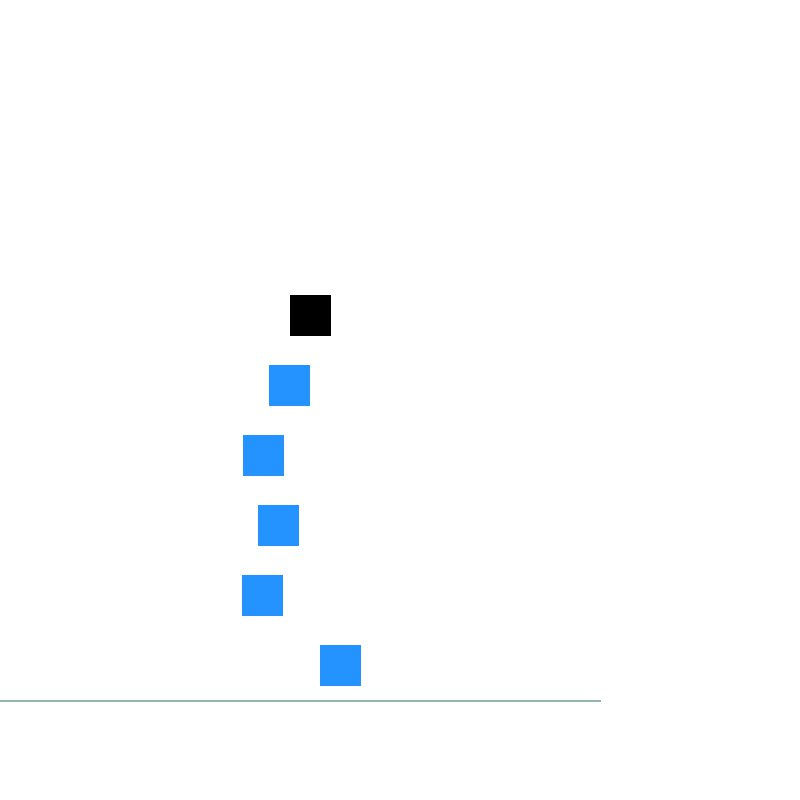

F


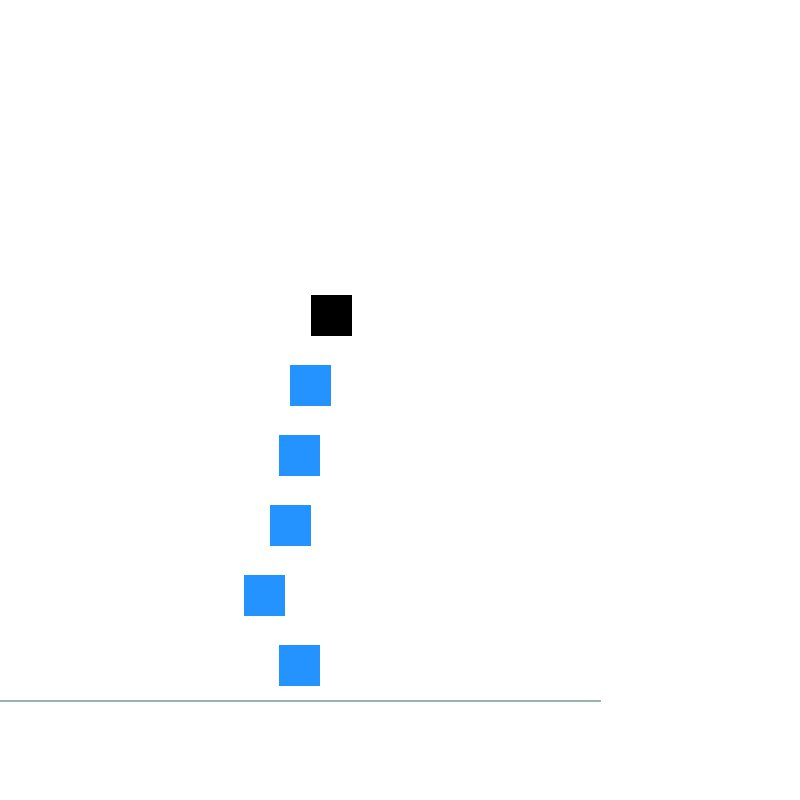

T


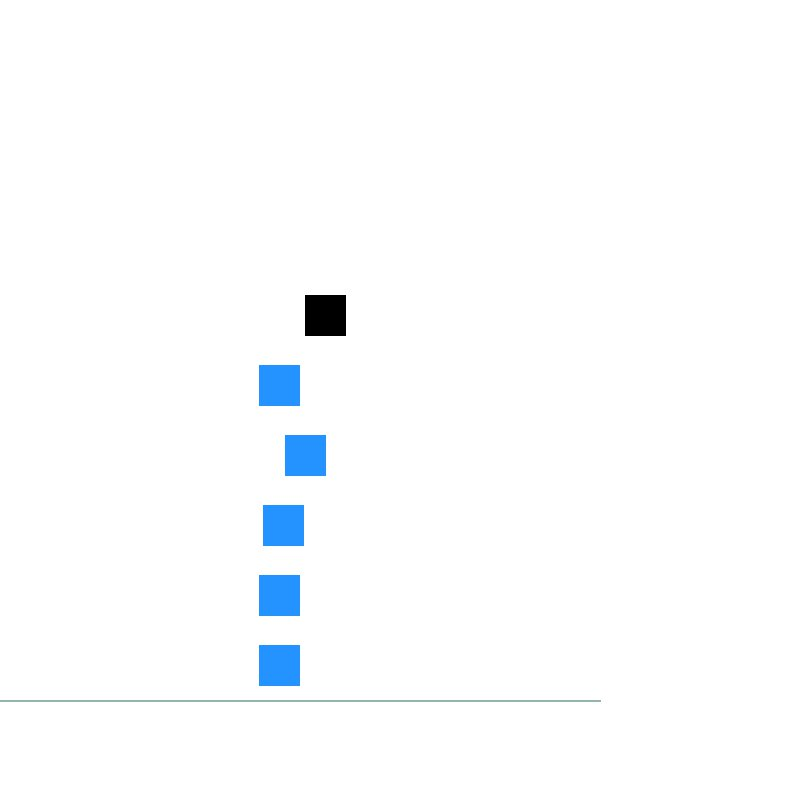

T


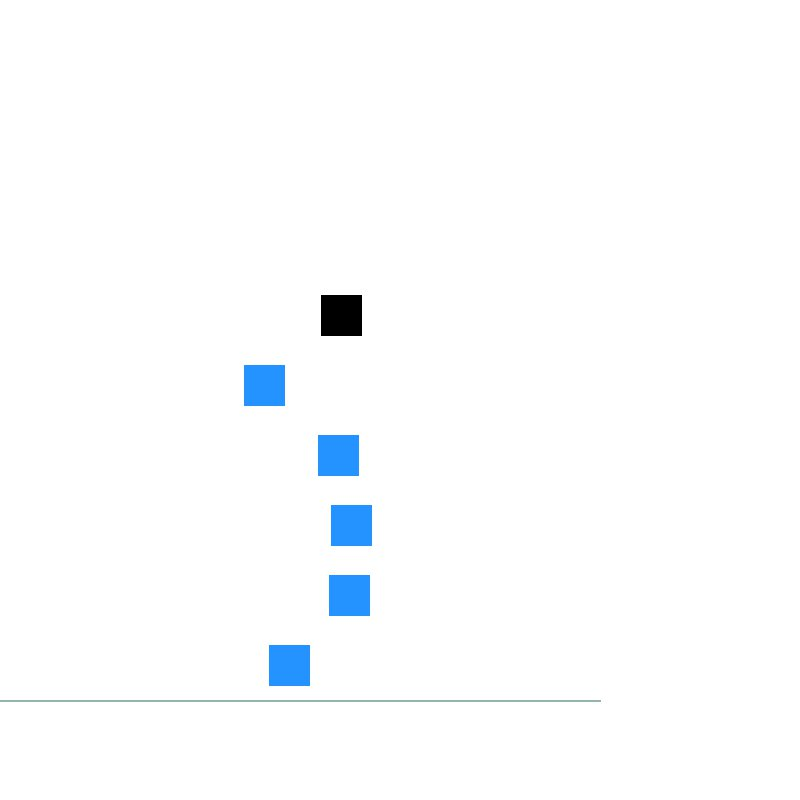

F


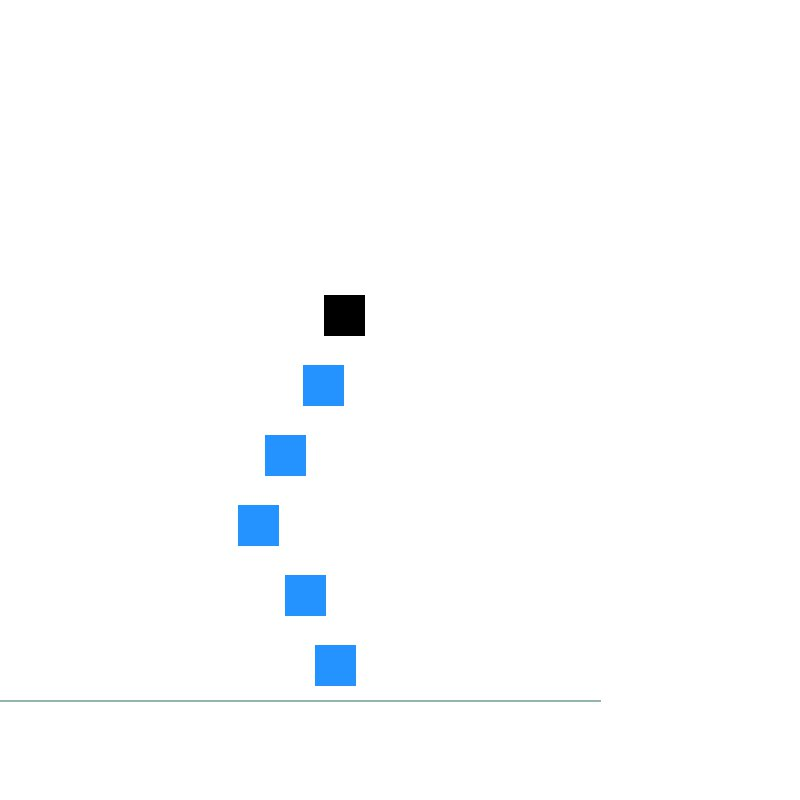

T


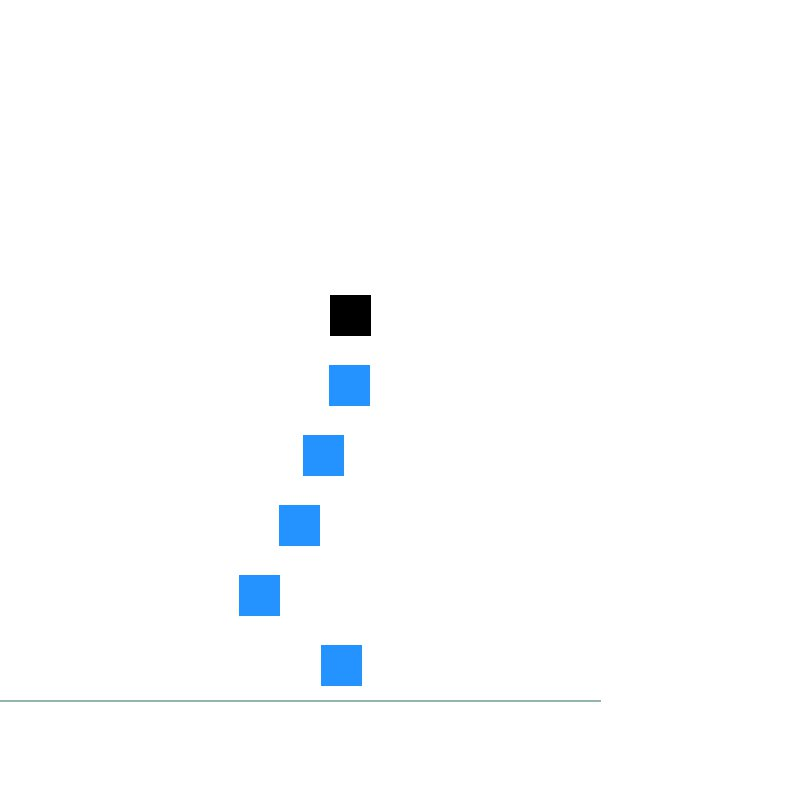

F


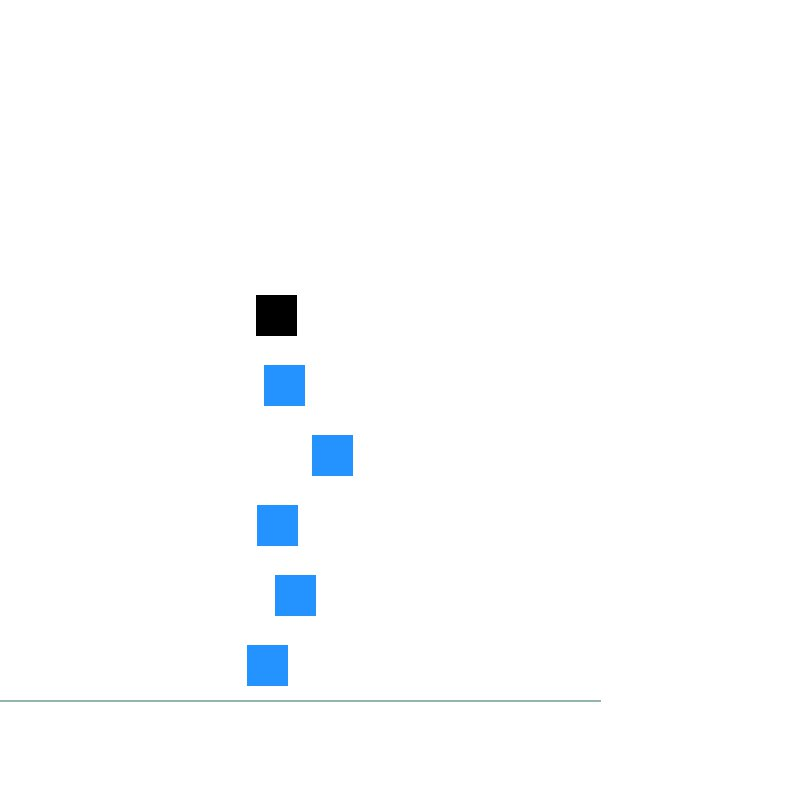

F


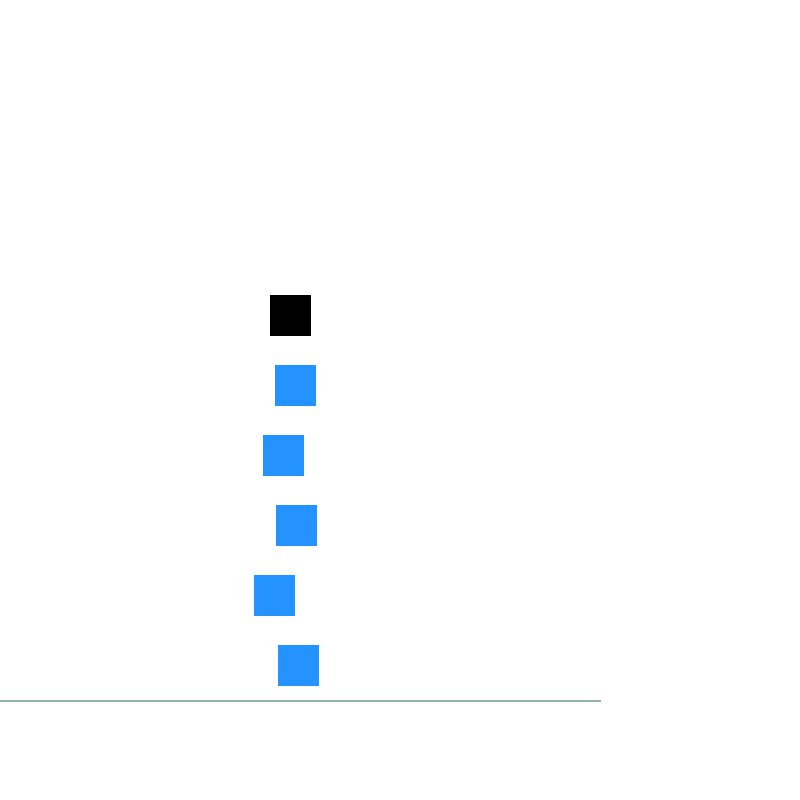

T


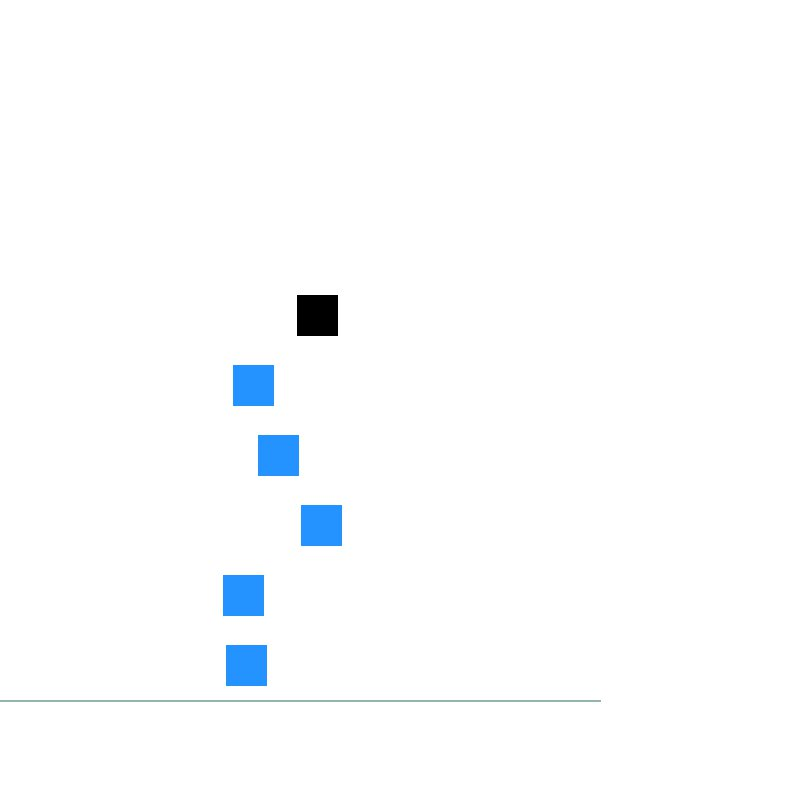

F


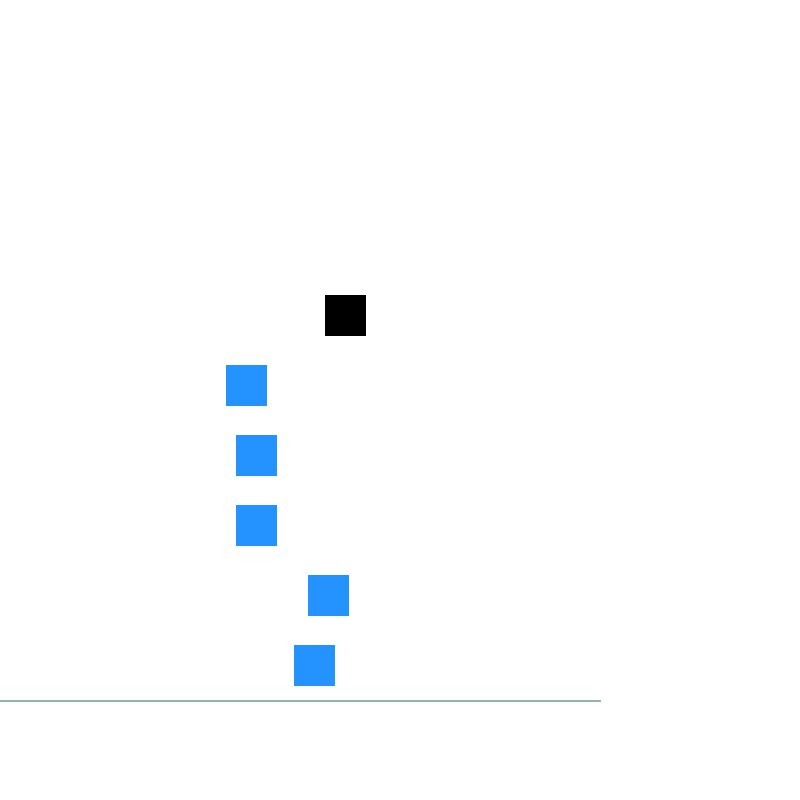

T


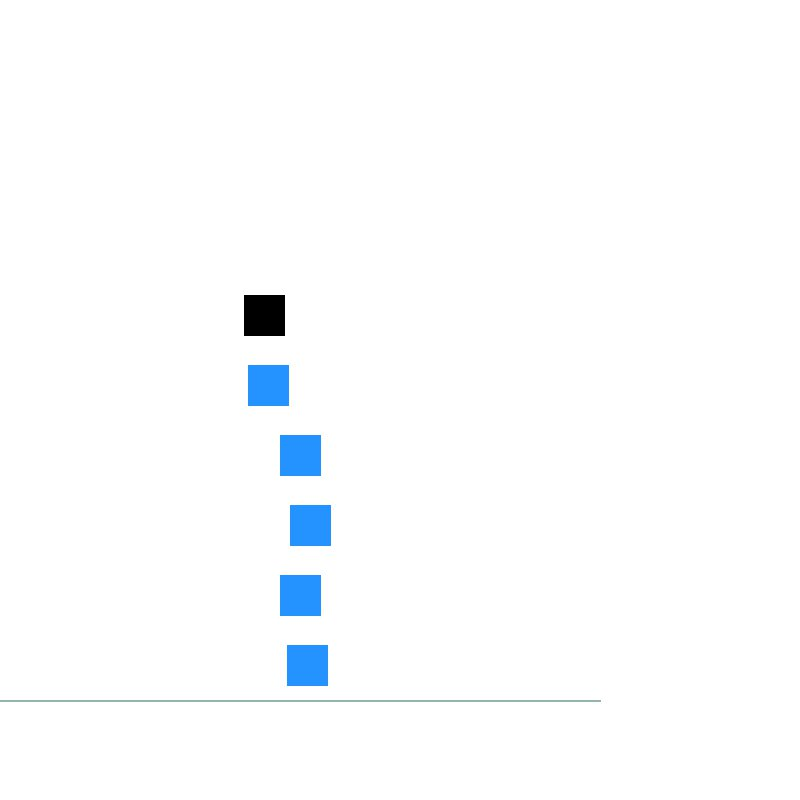

F


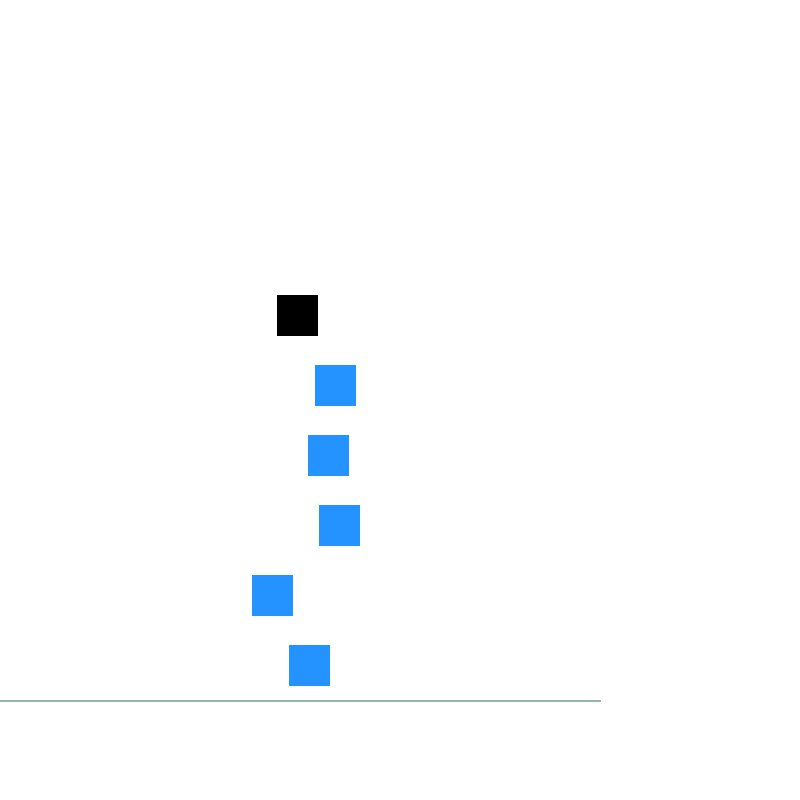

F


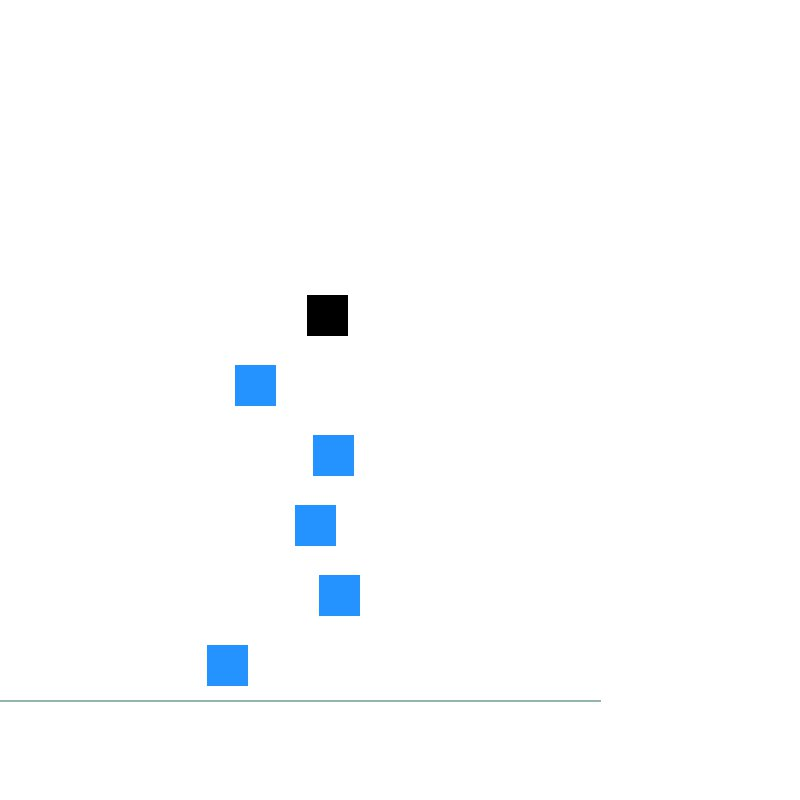

F


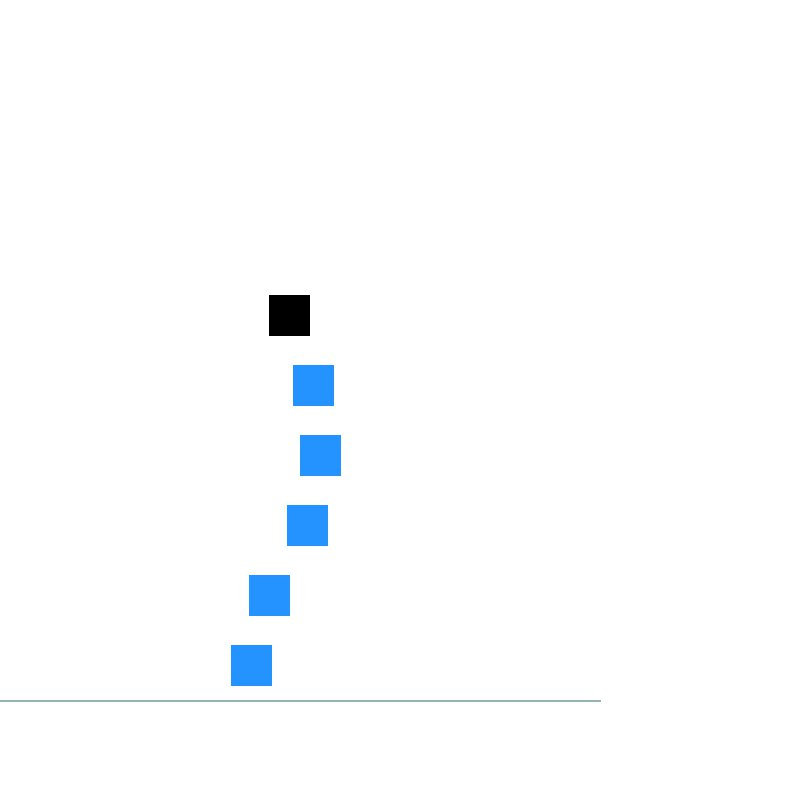

F


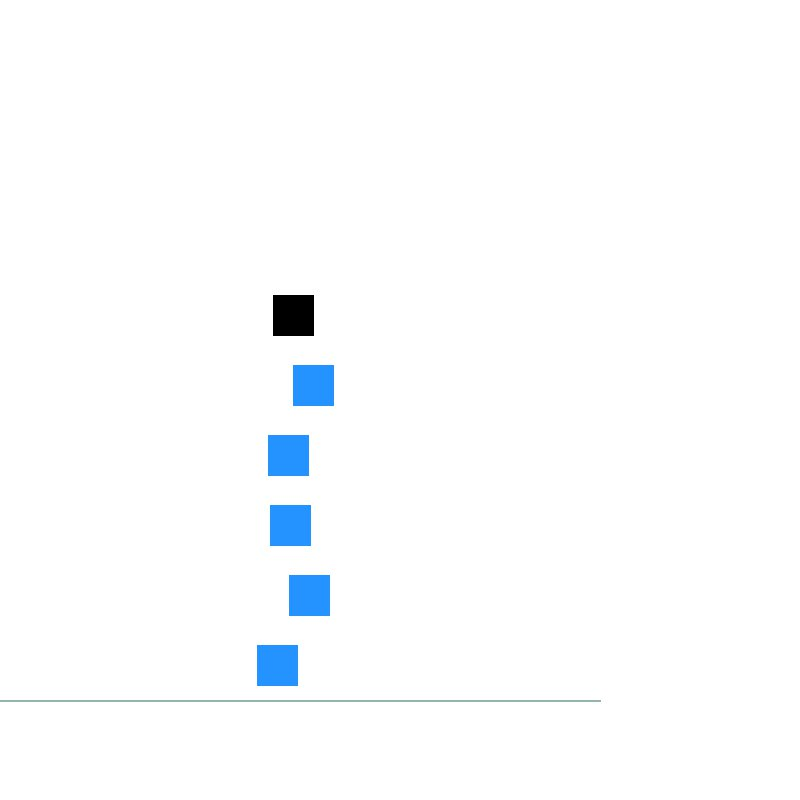

F


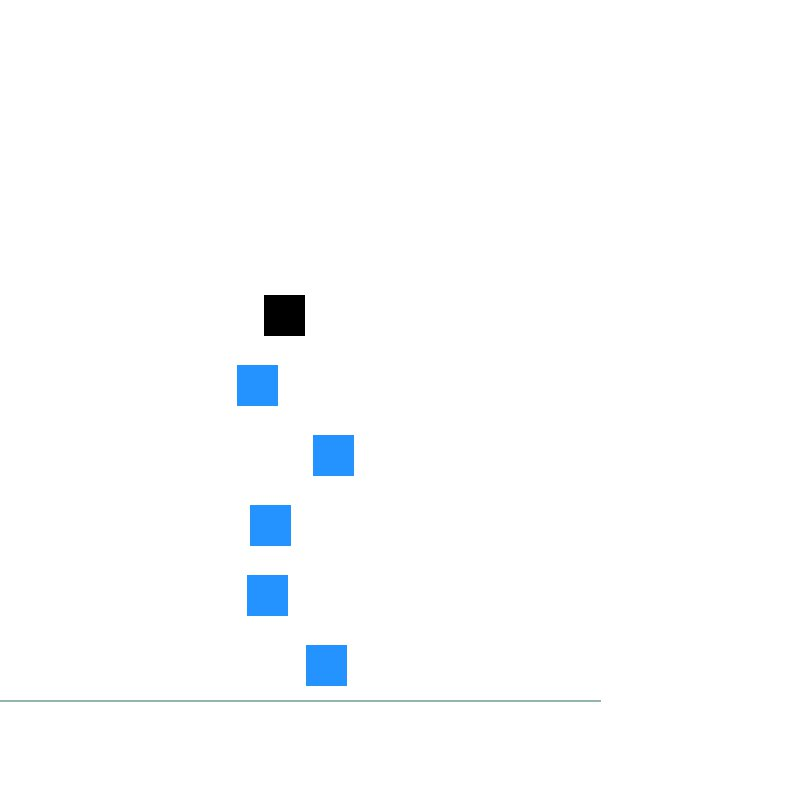

F


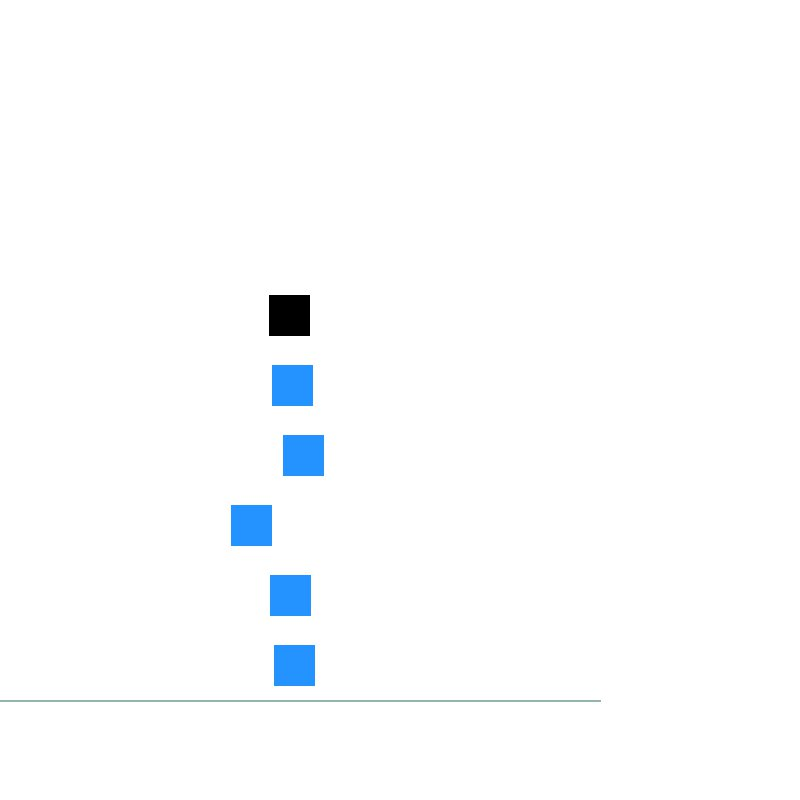

F


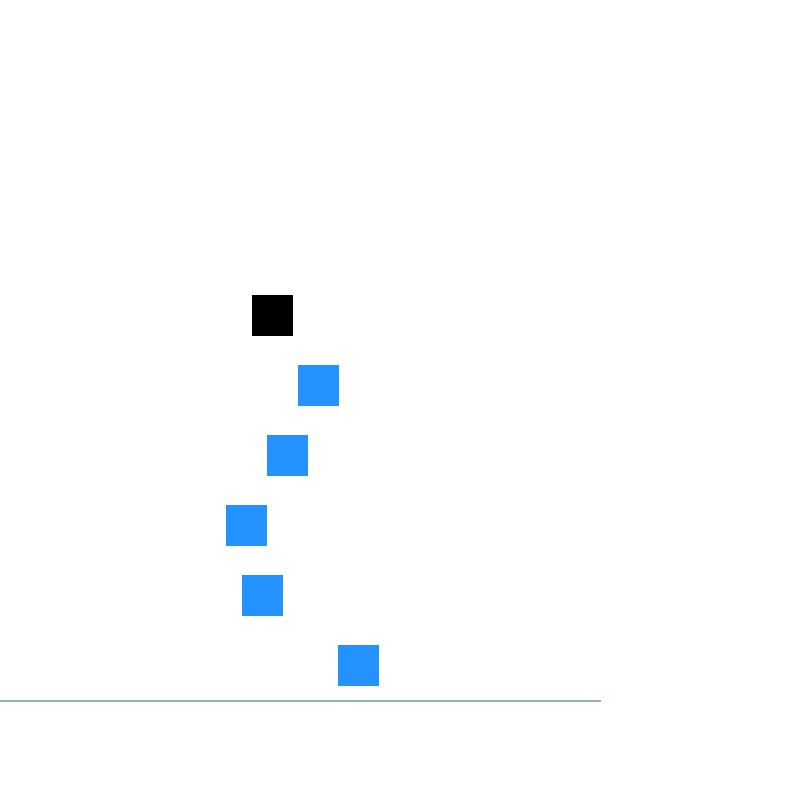

F


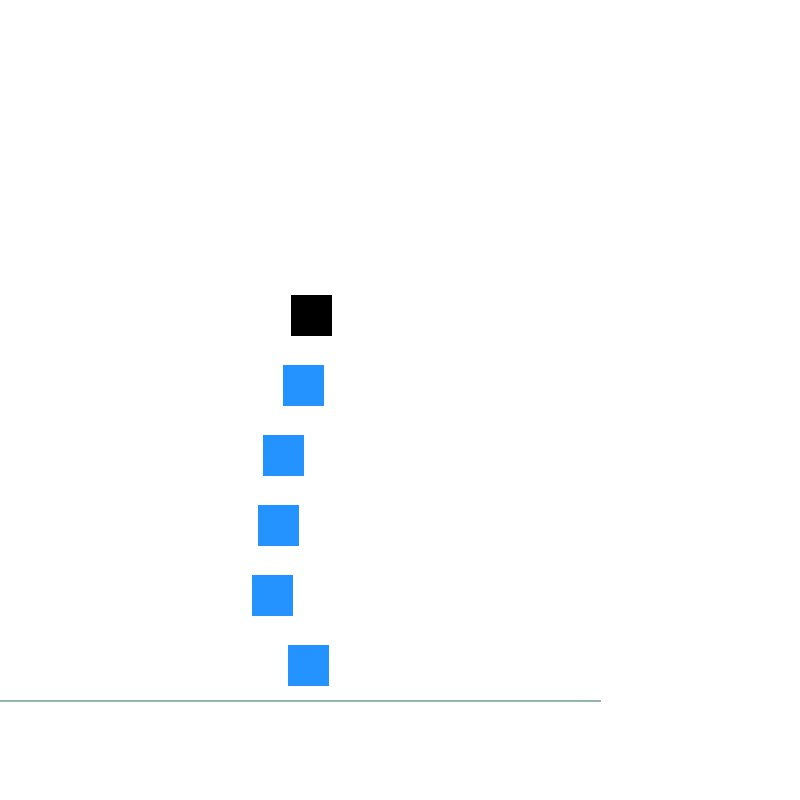

T


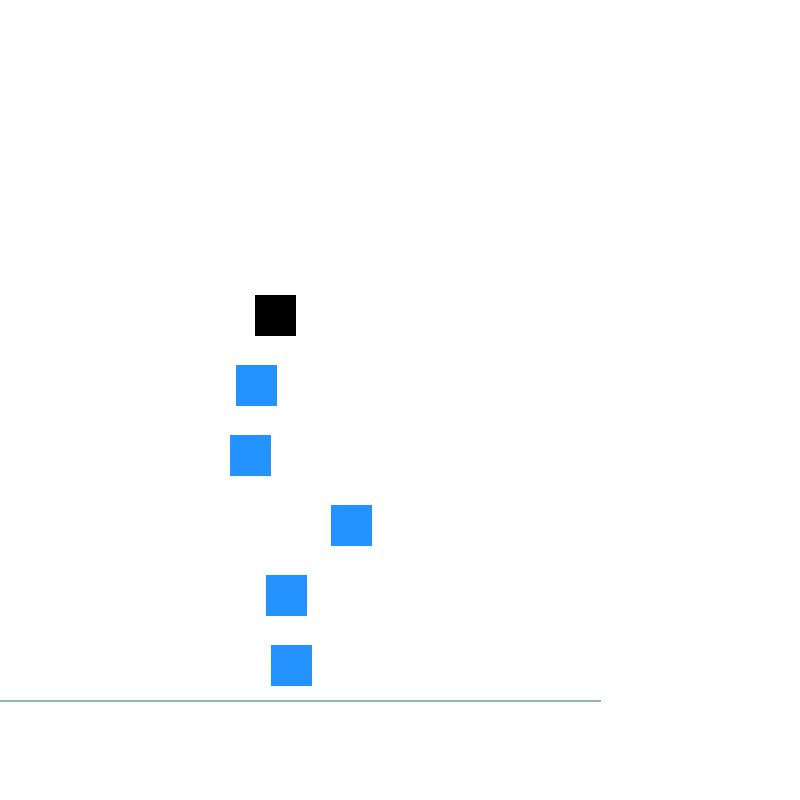

F


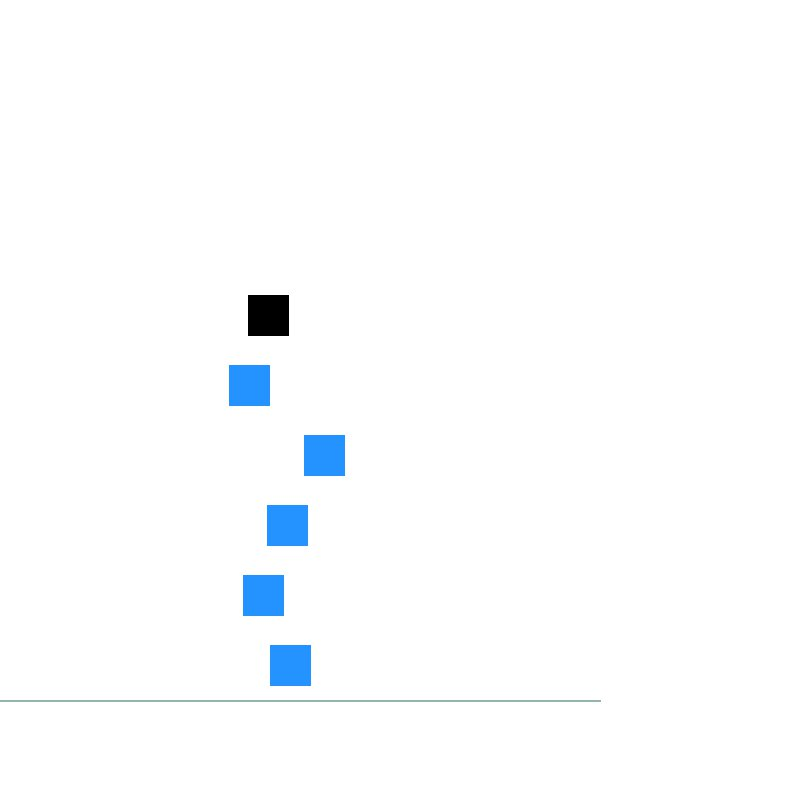

F


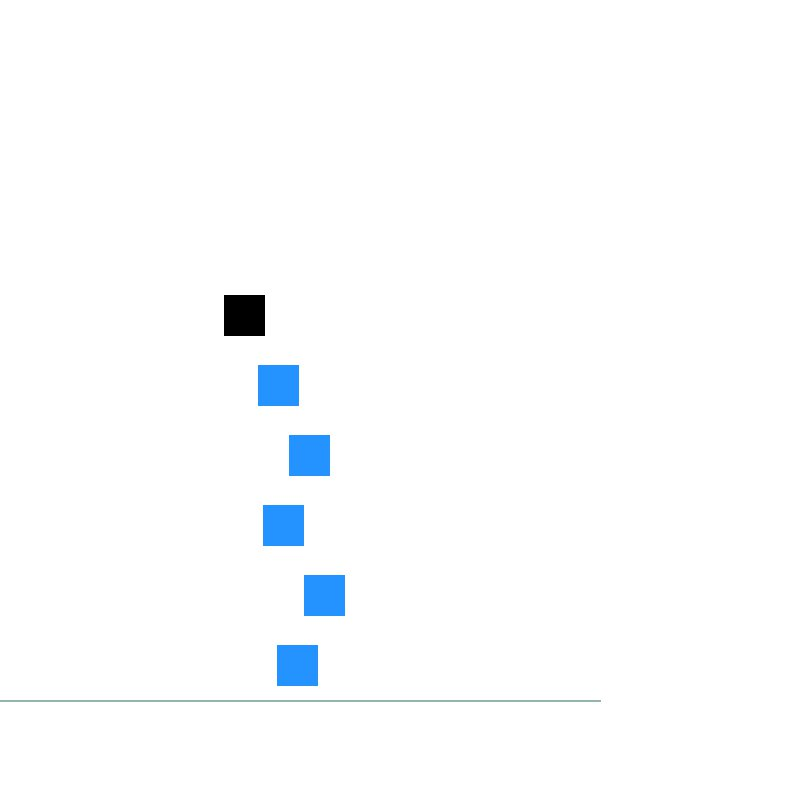

T


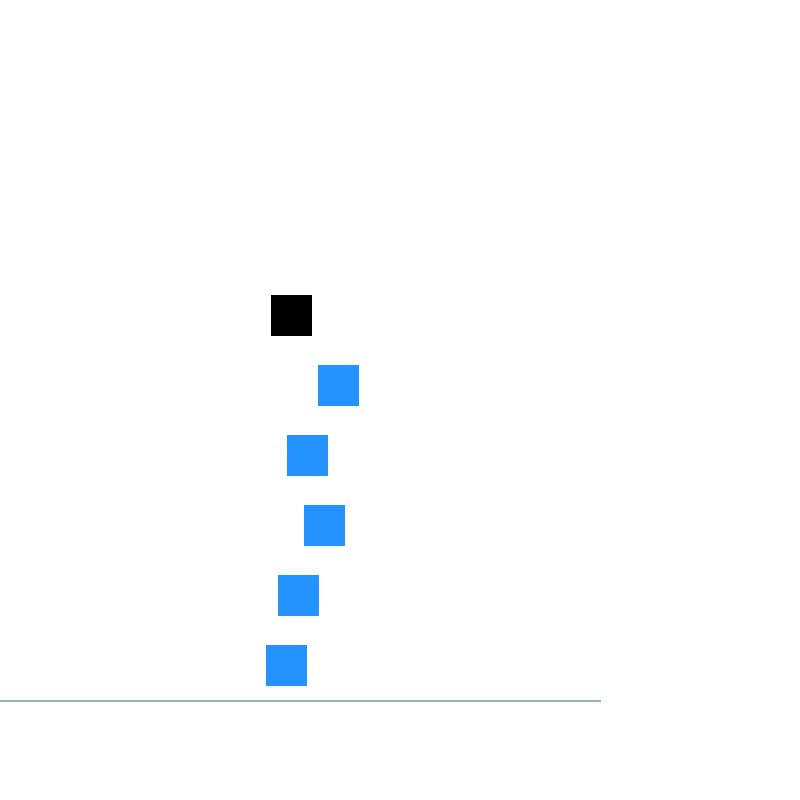

F


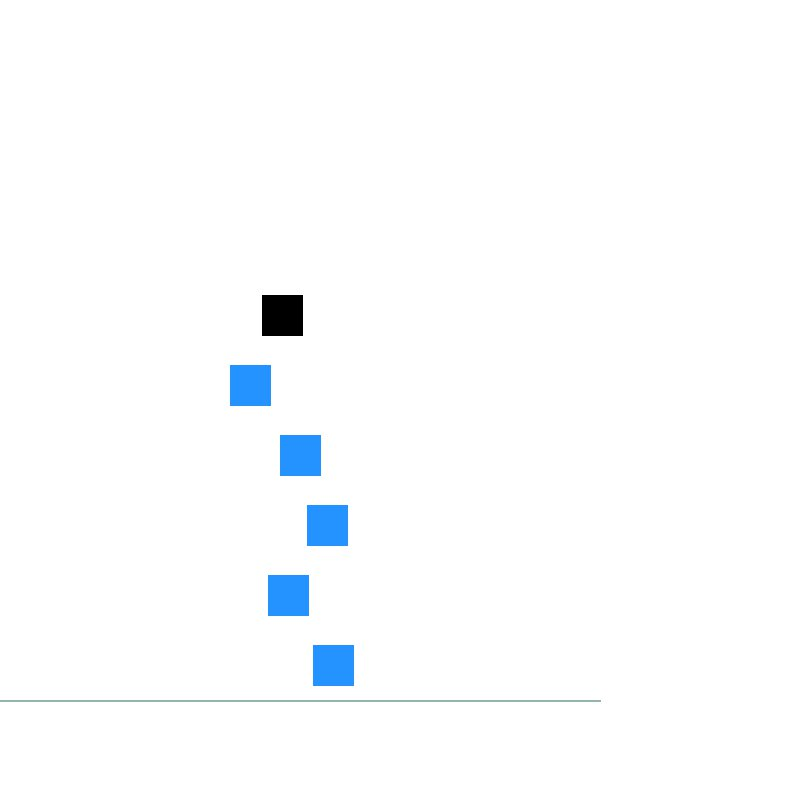

F


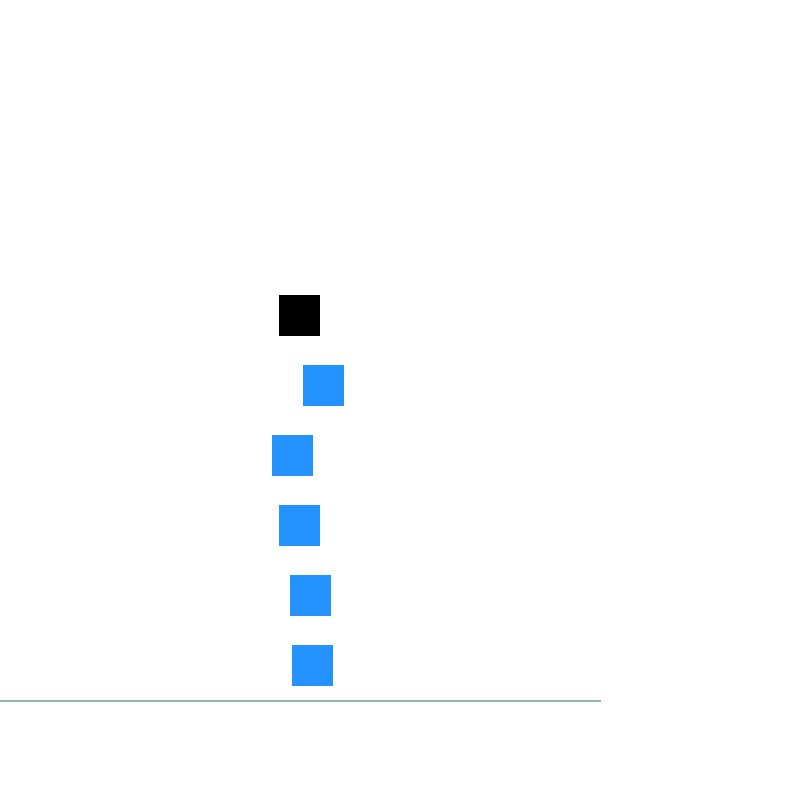

F


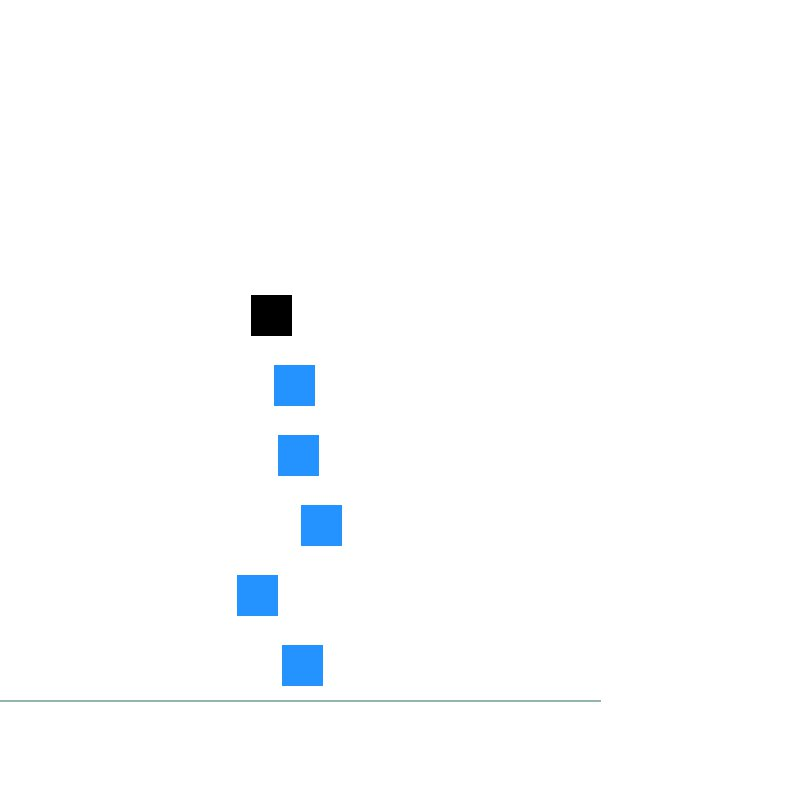

F


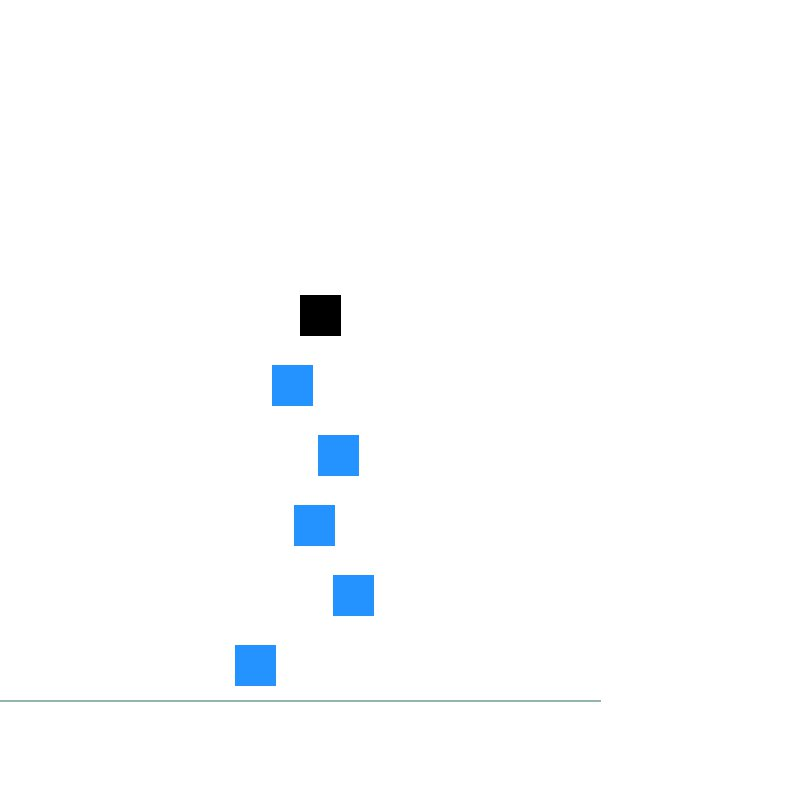

F


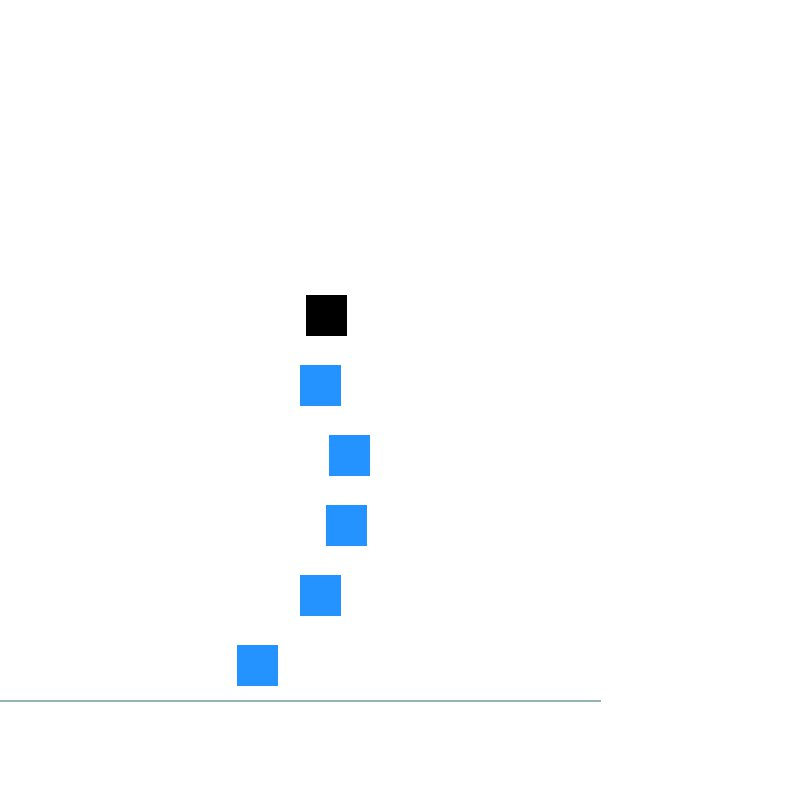

F


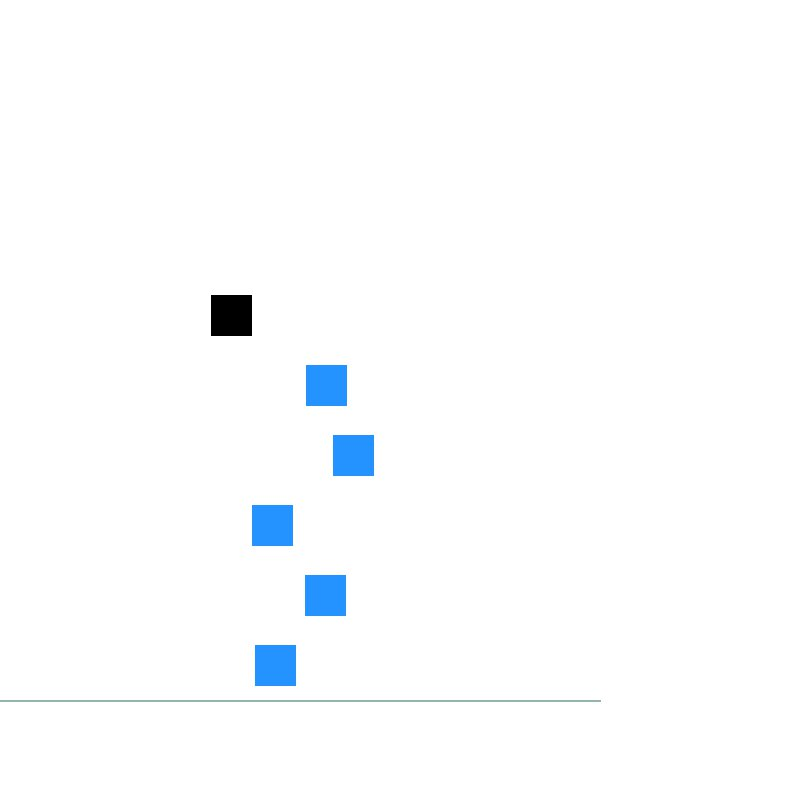

T


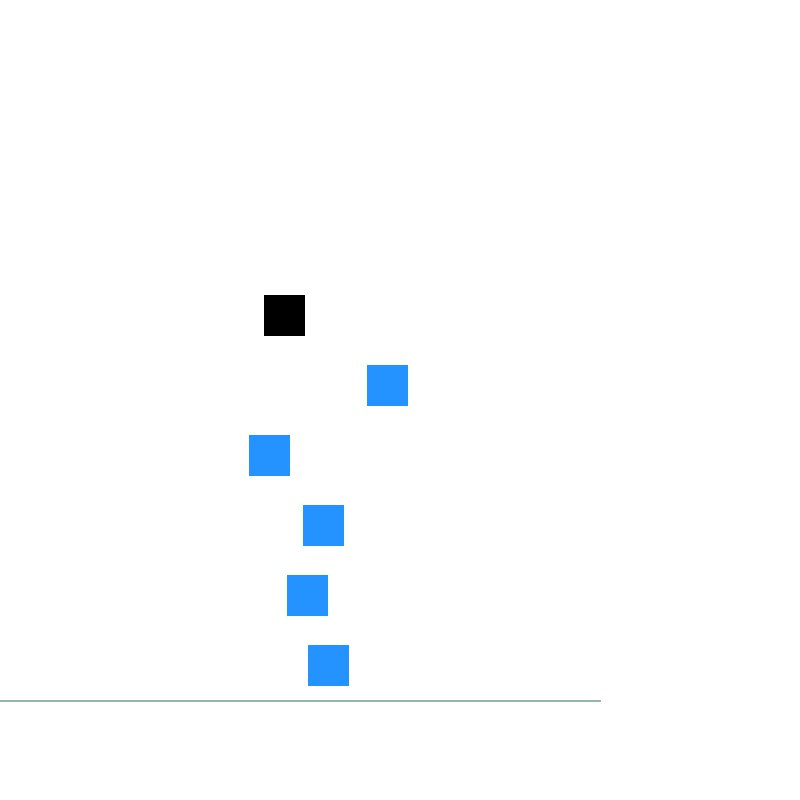

F


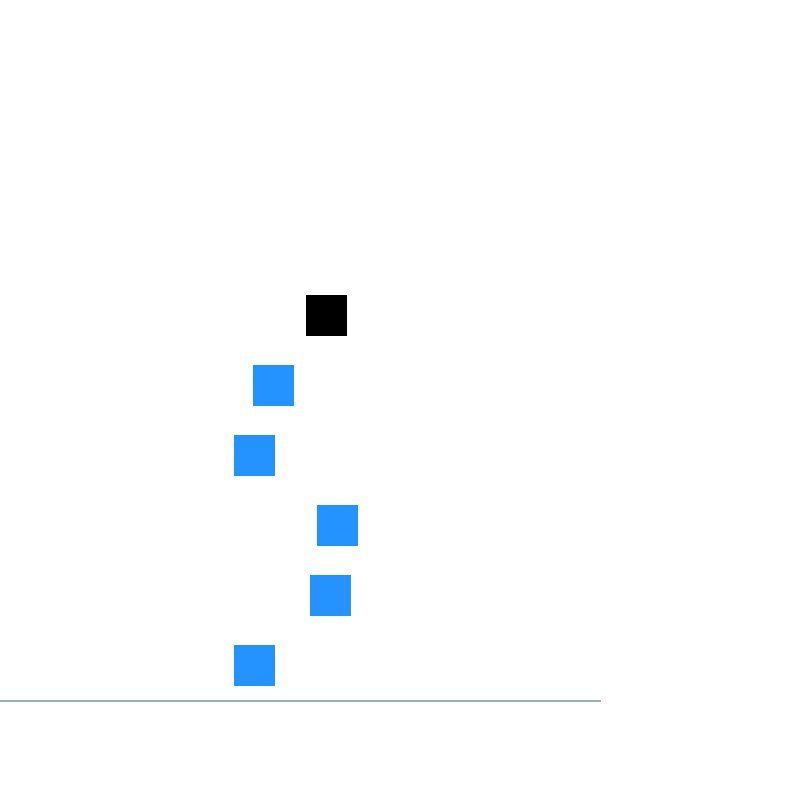

F


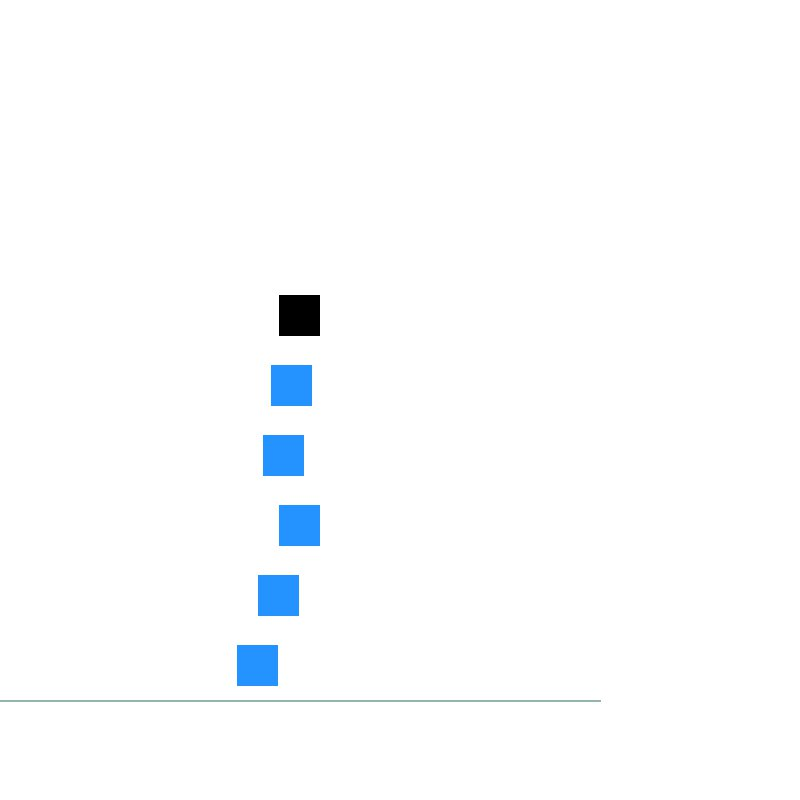

T


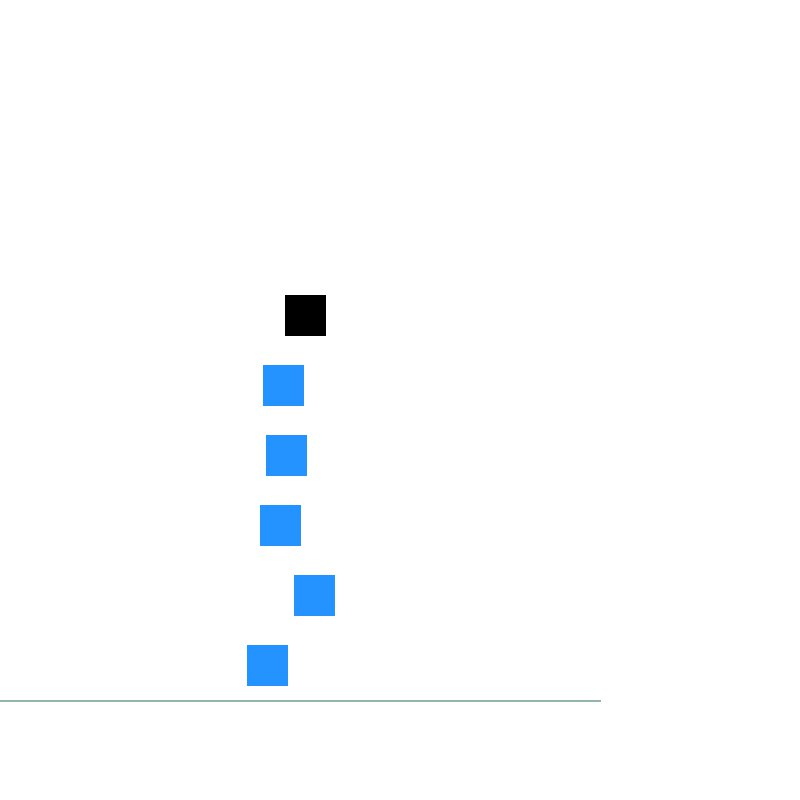

F


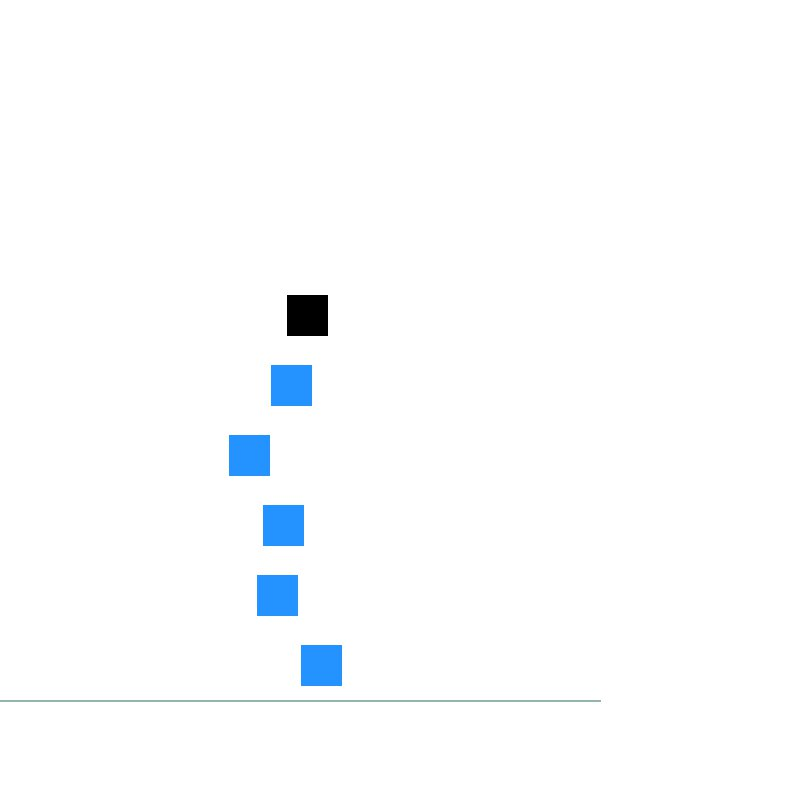

F


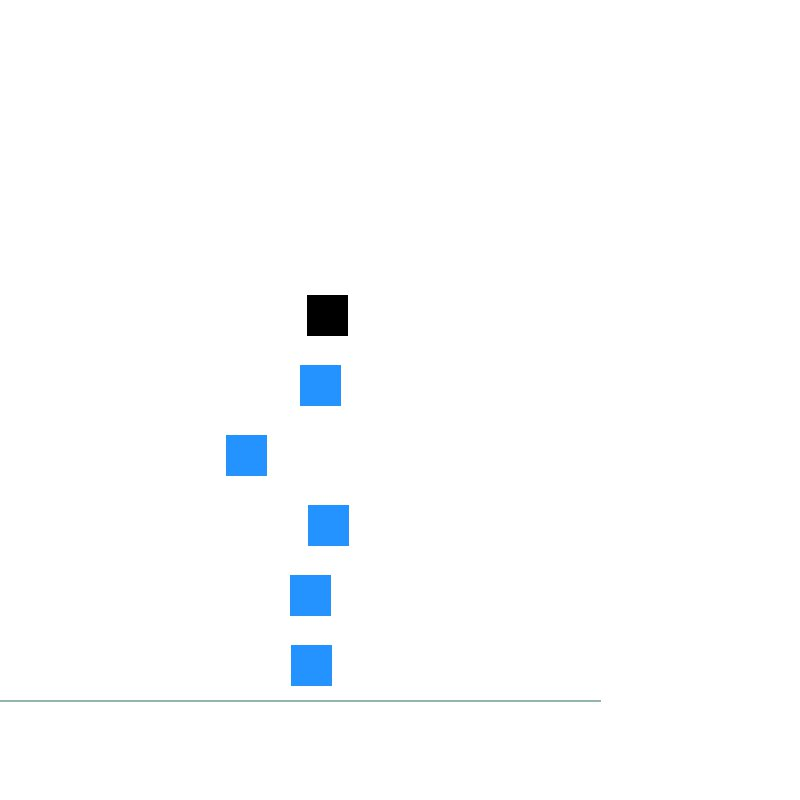

F


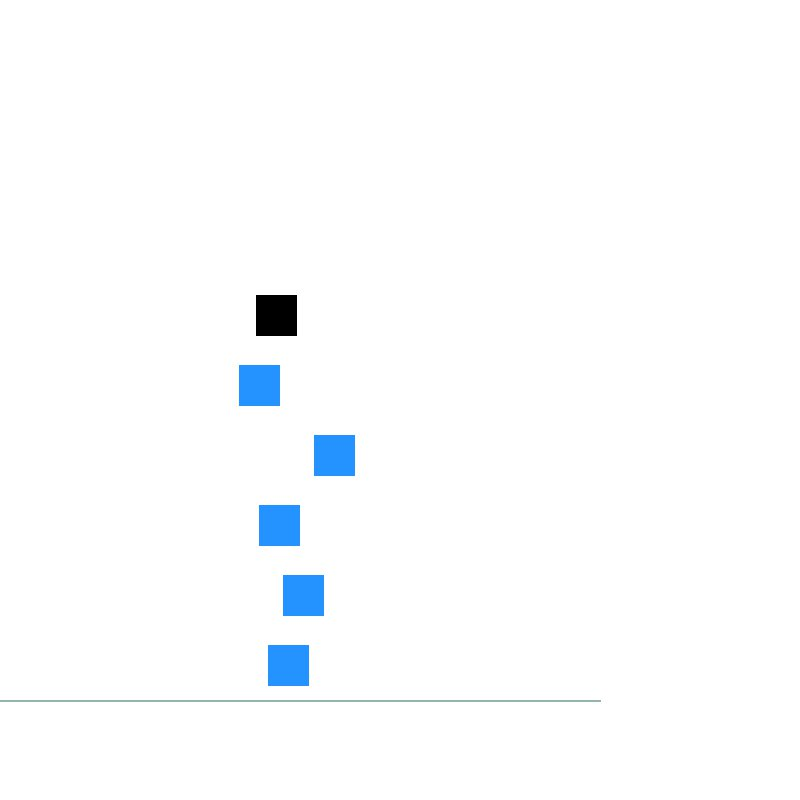

F


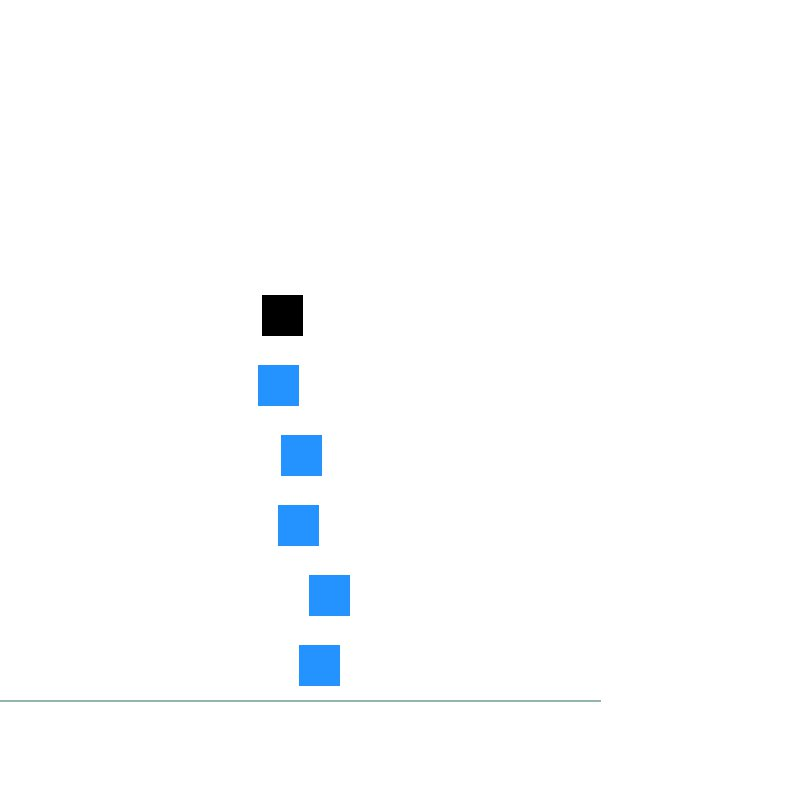

F


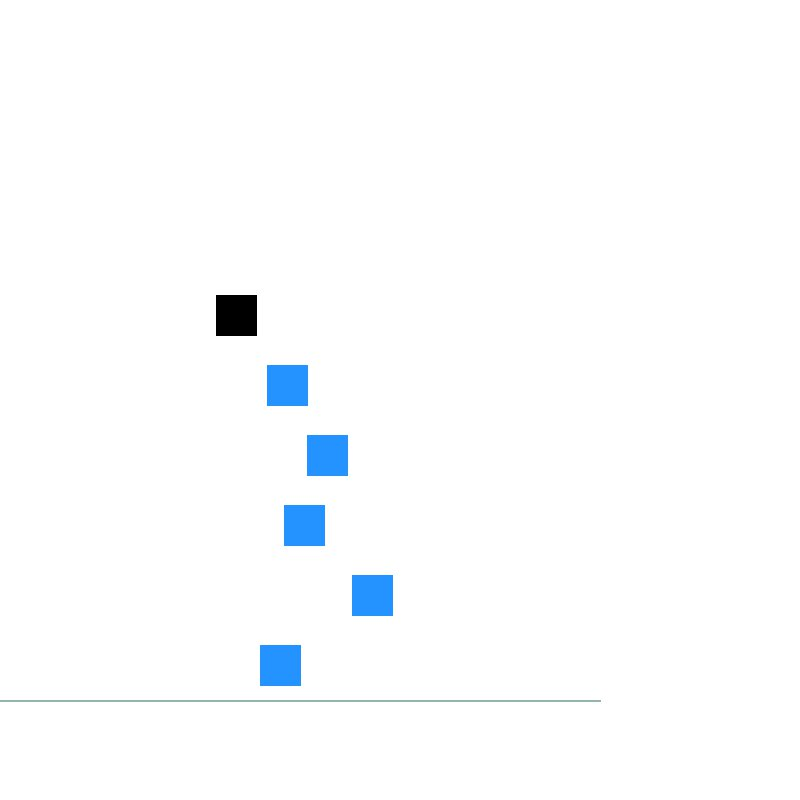

T


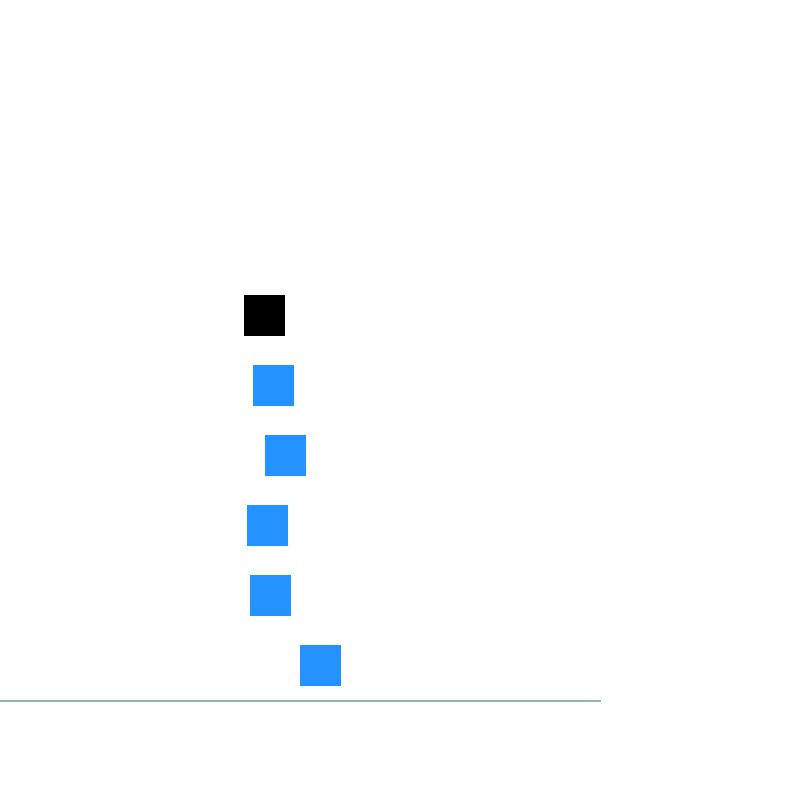

F


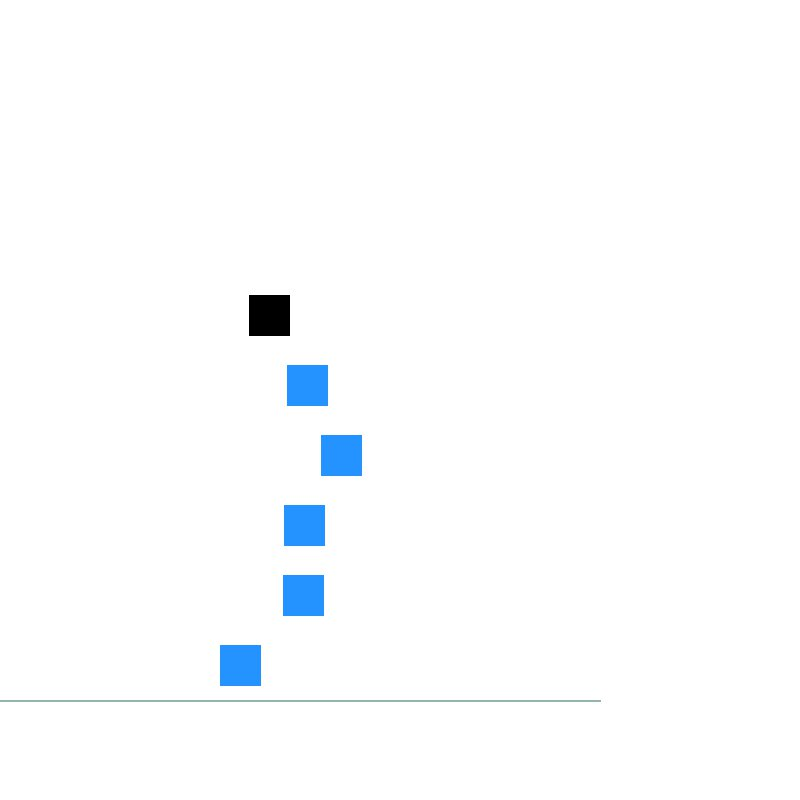

F


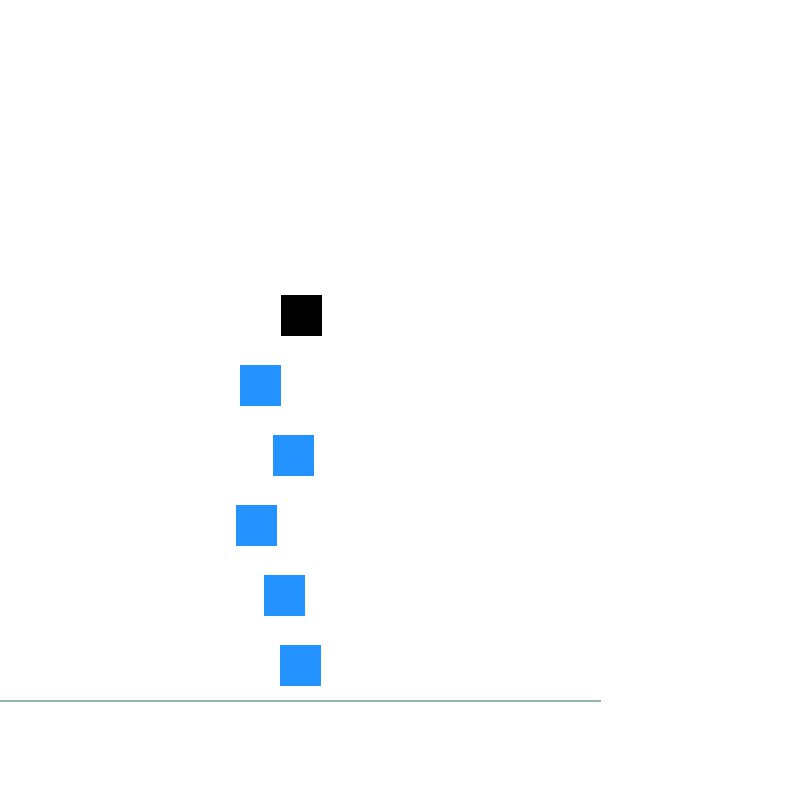

T


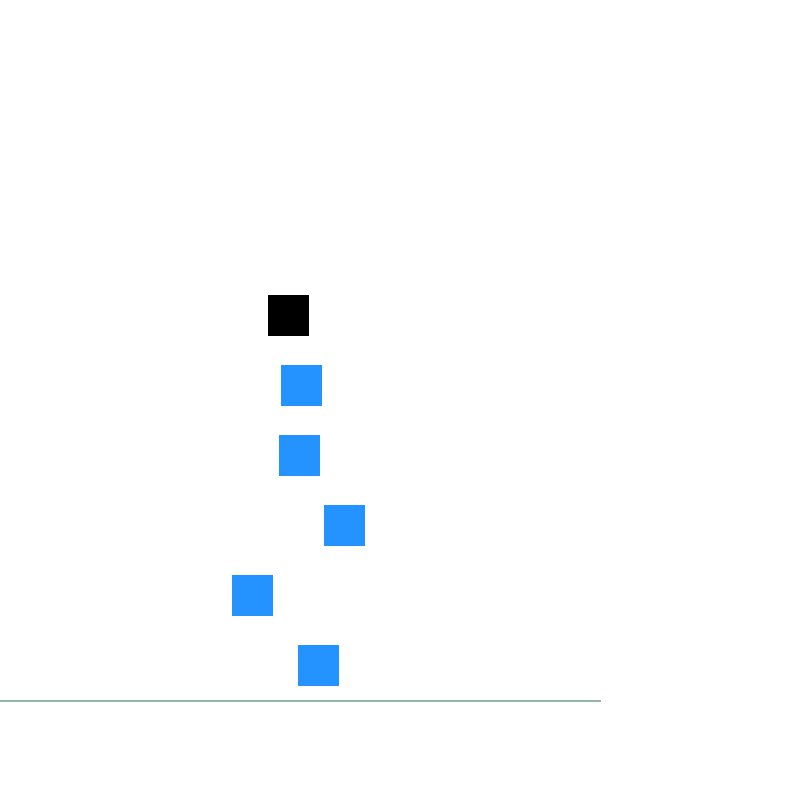

F


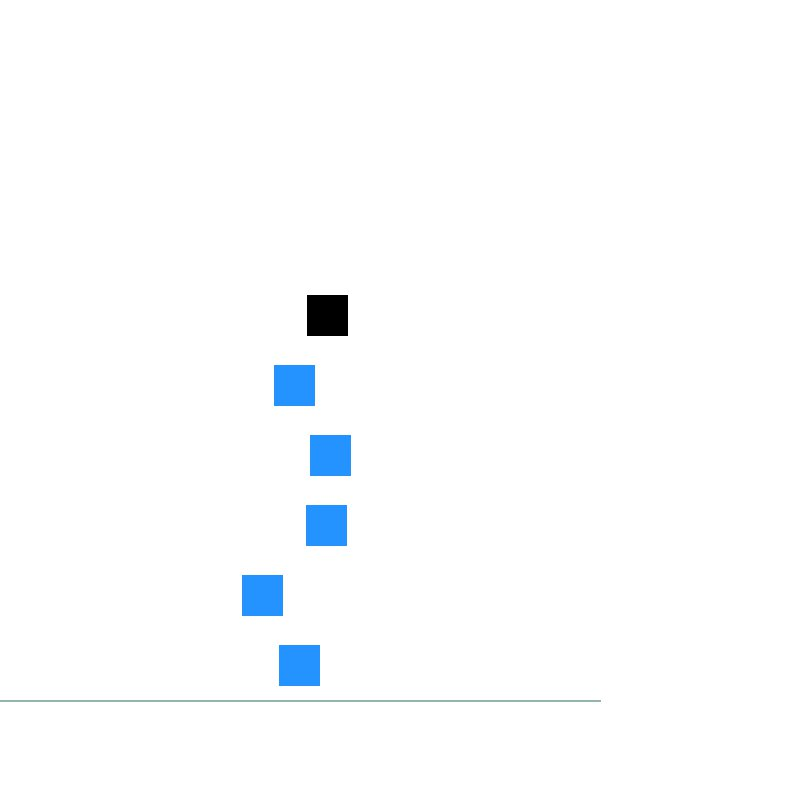

F


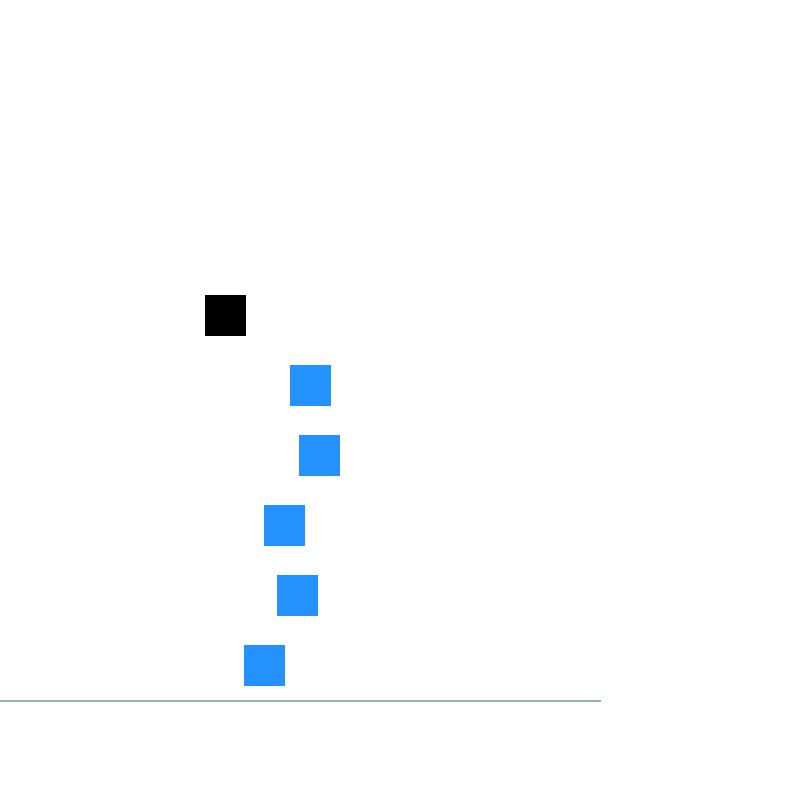

T


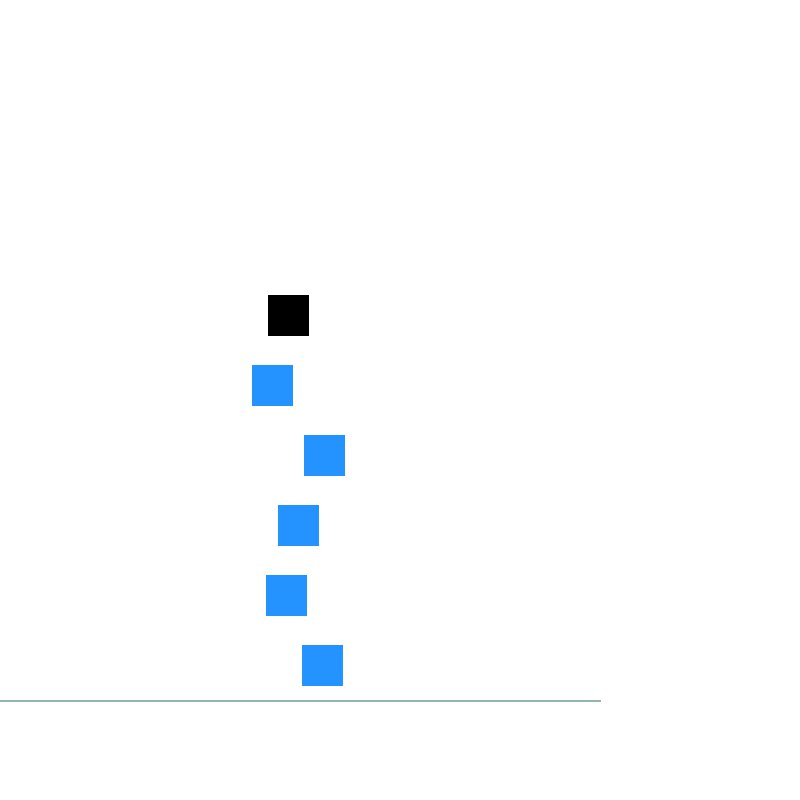

F


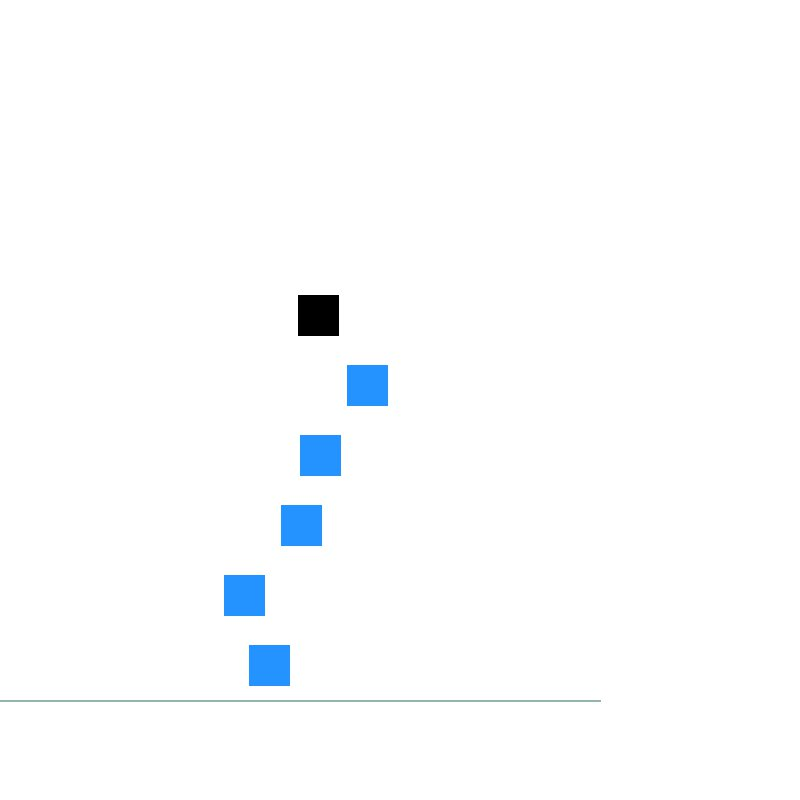

F


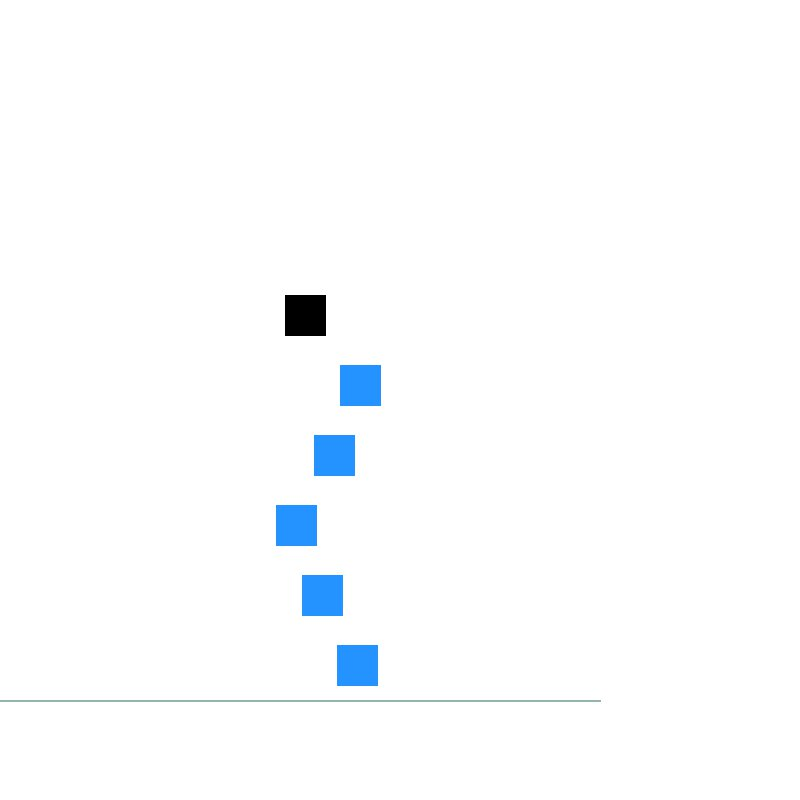

F


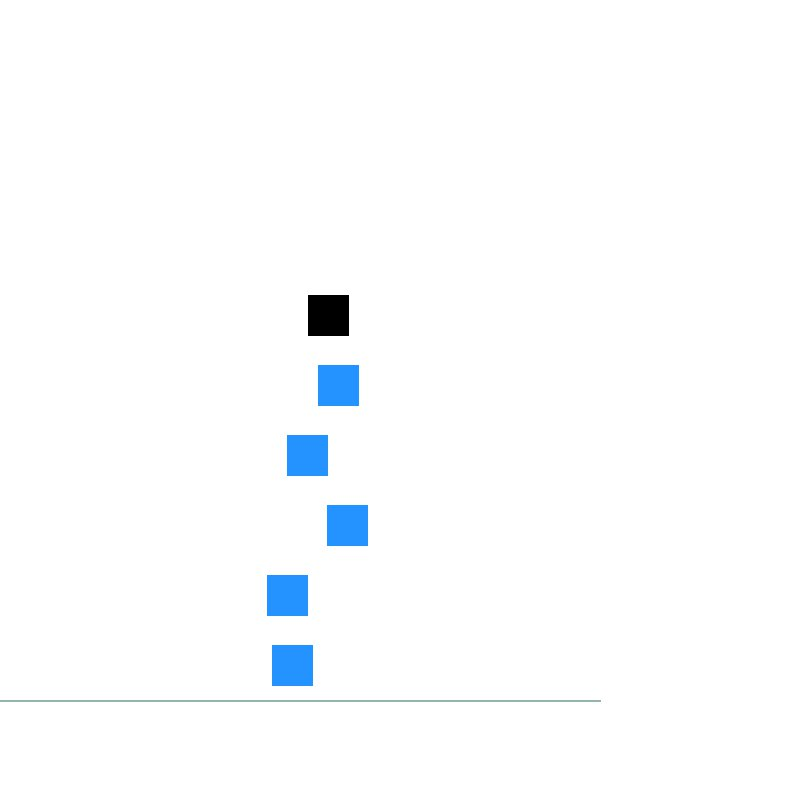

F


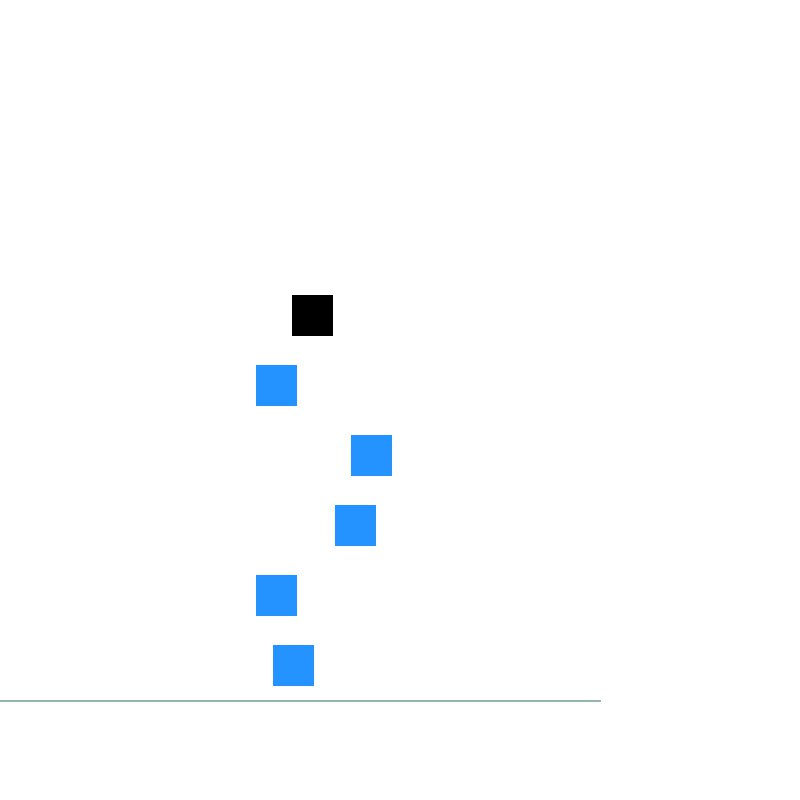

F


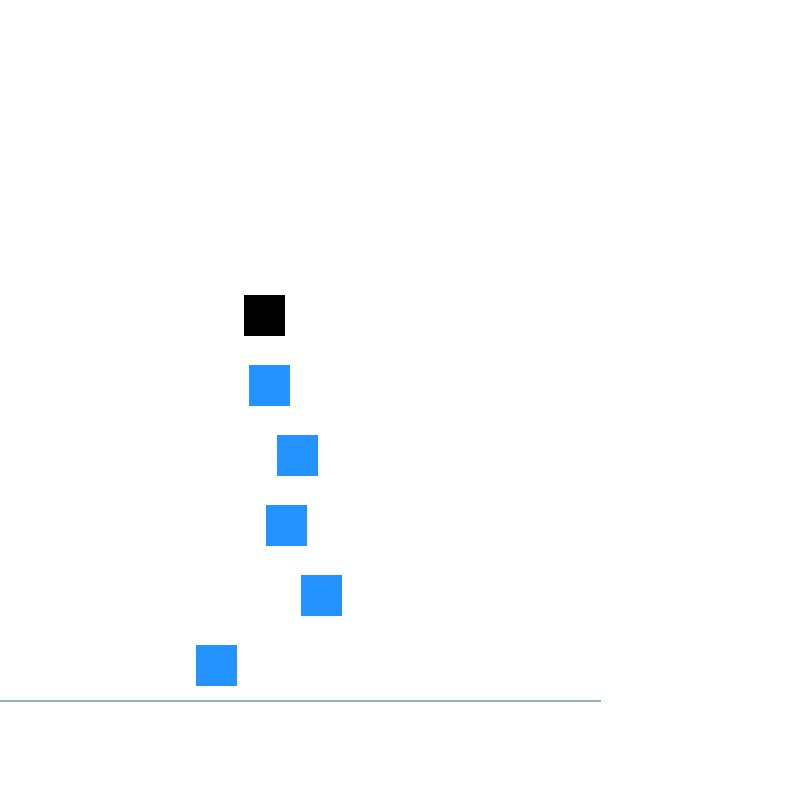

F


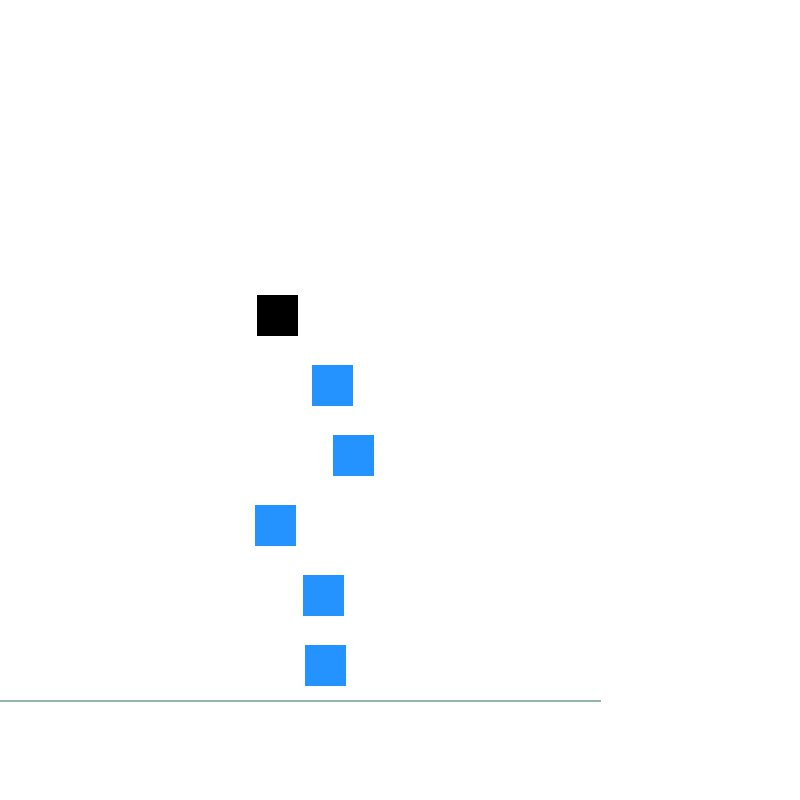

F


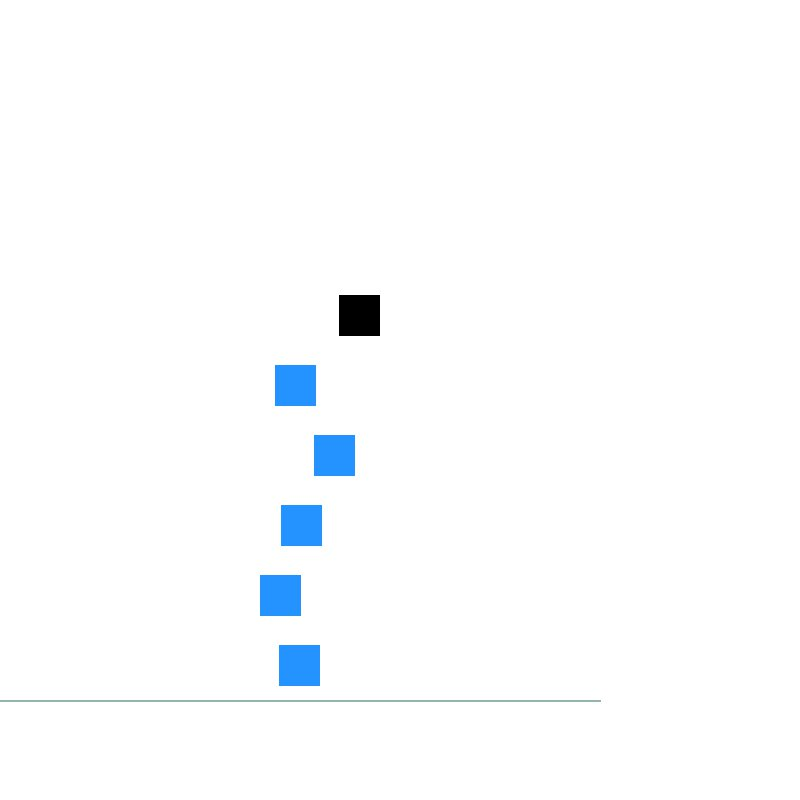

T


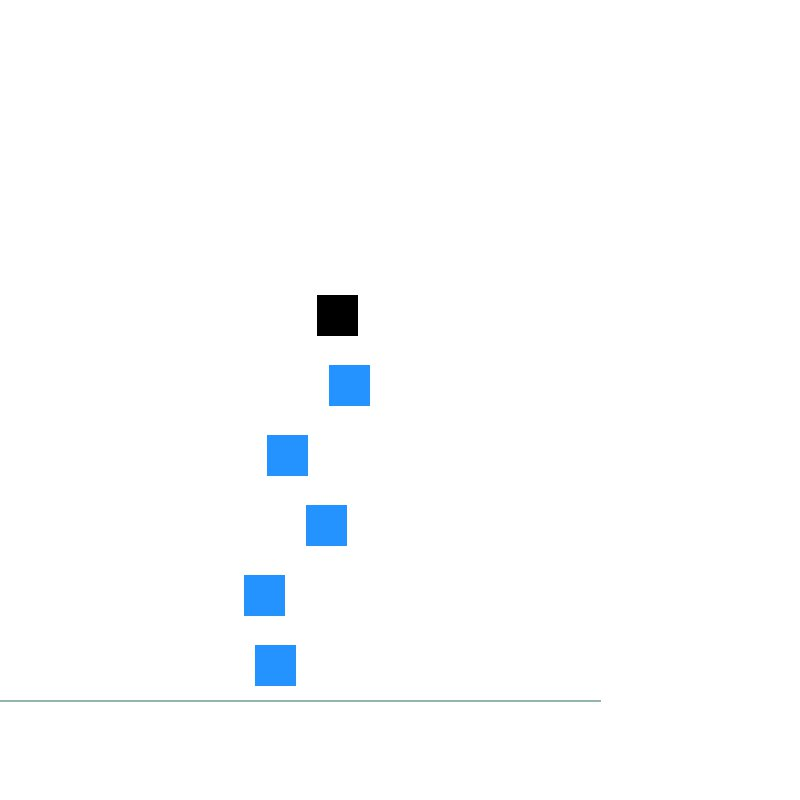

F


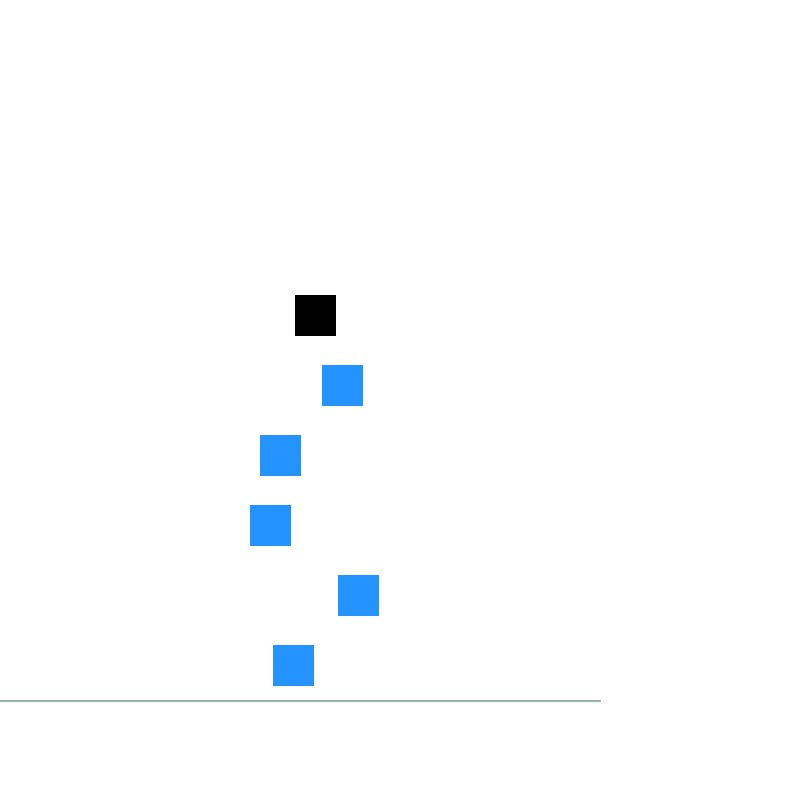

F


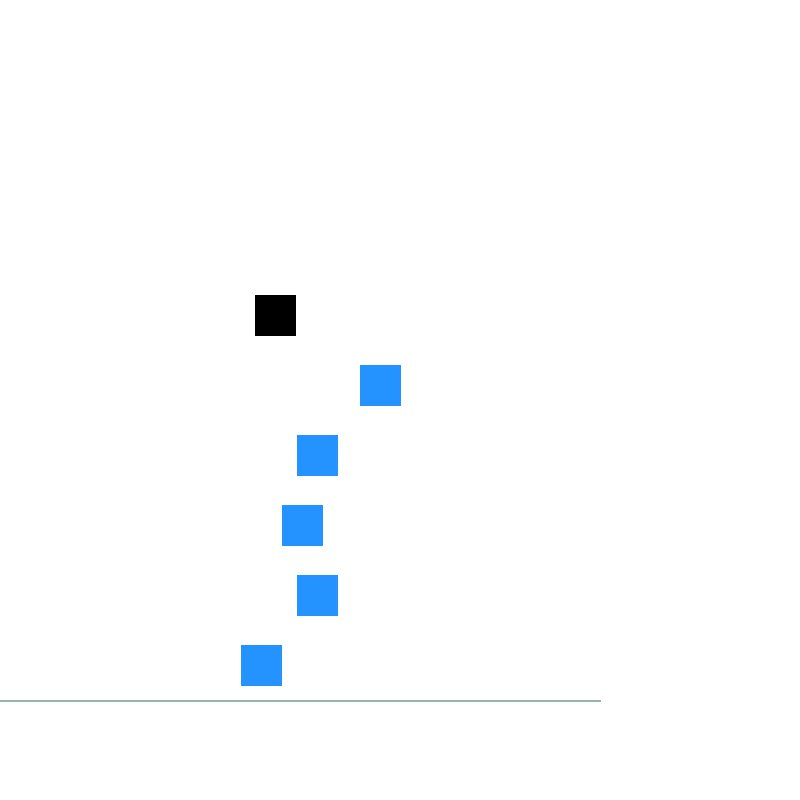

T


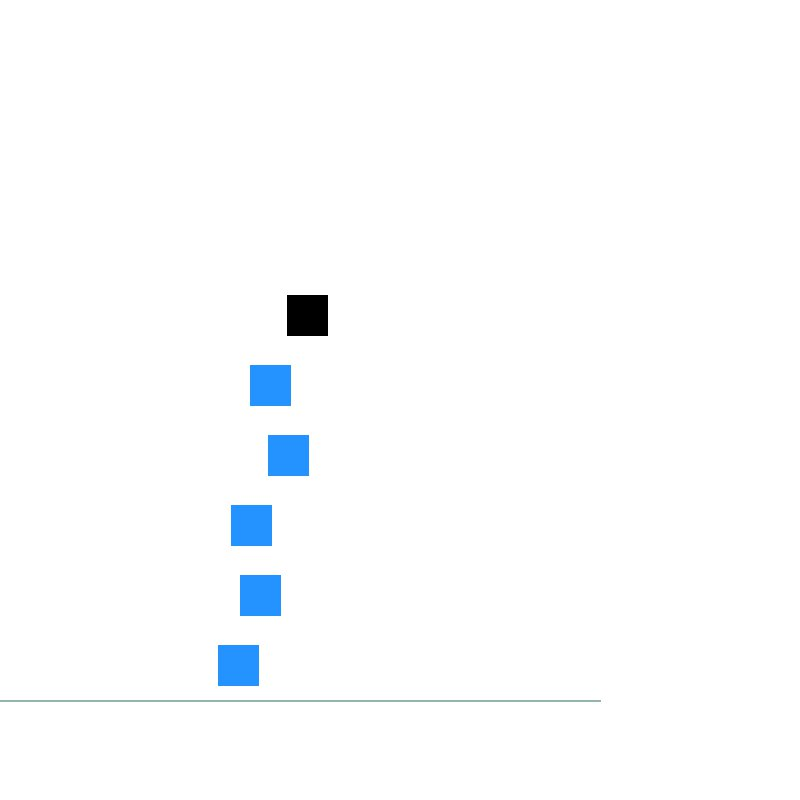

T


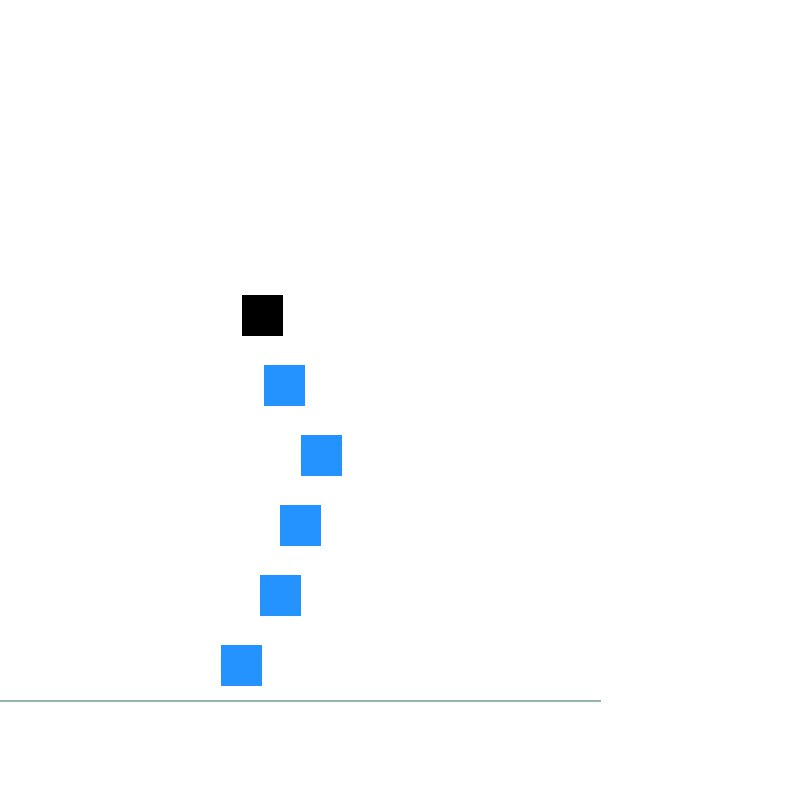

F


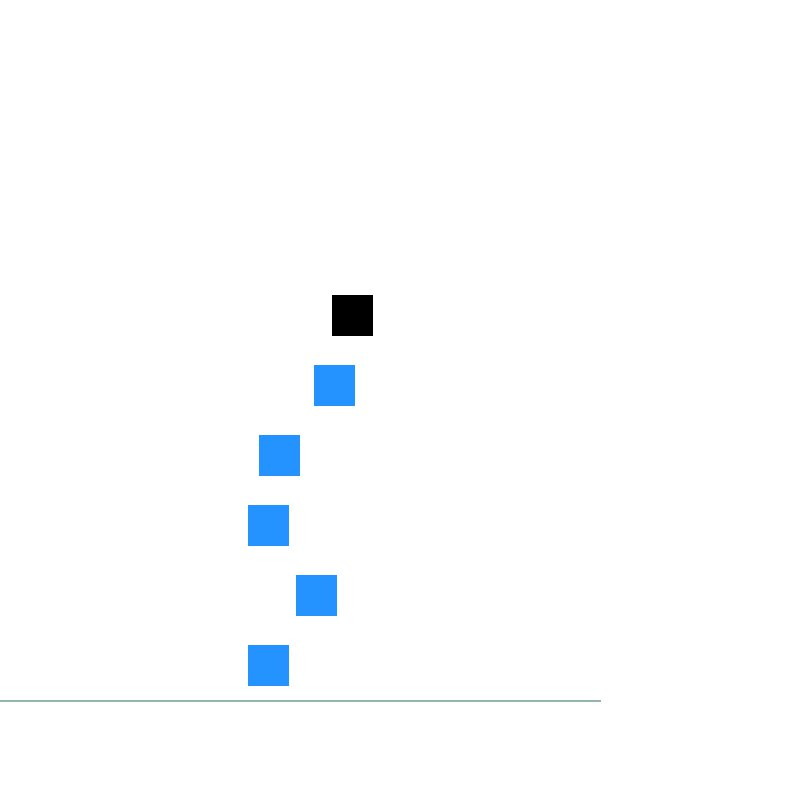

T


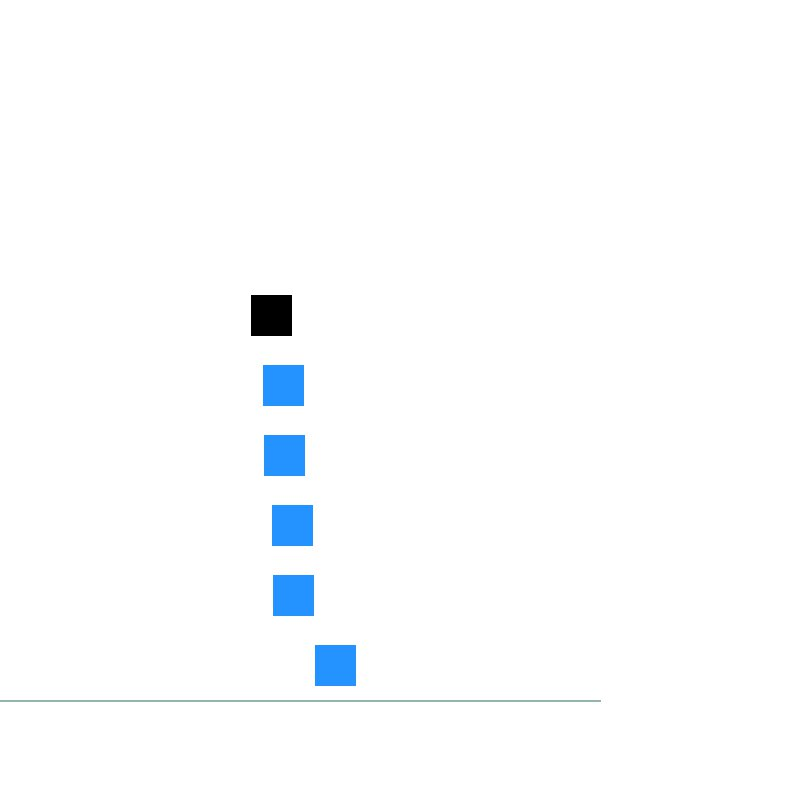

T


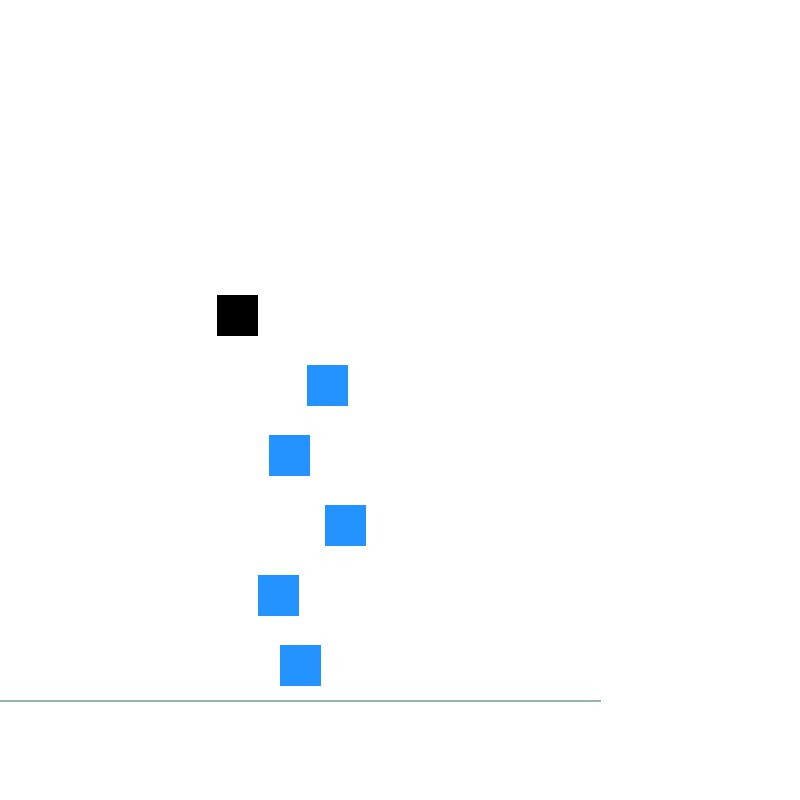

T


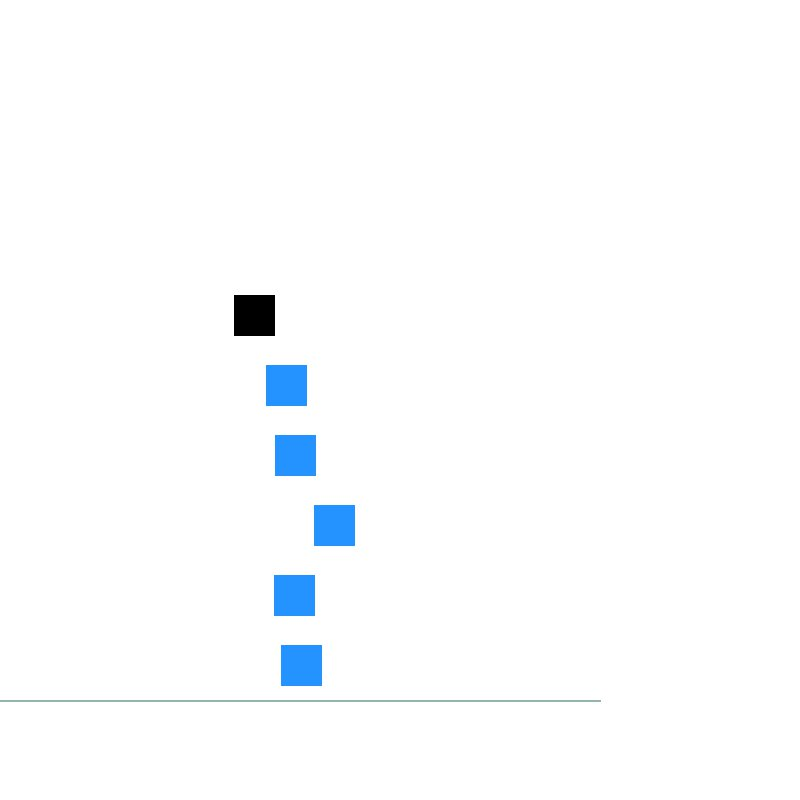

T


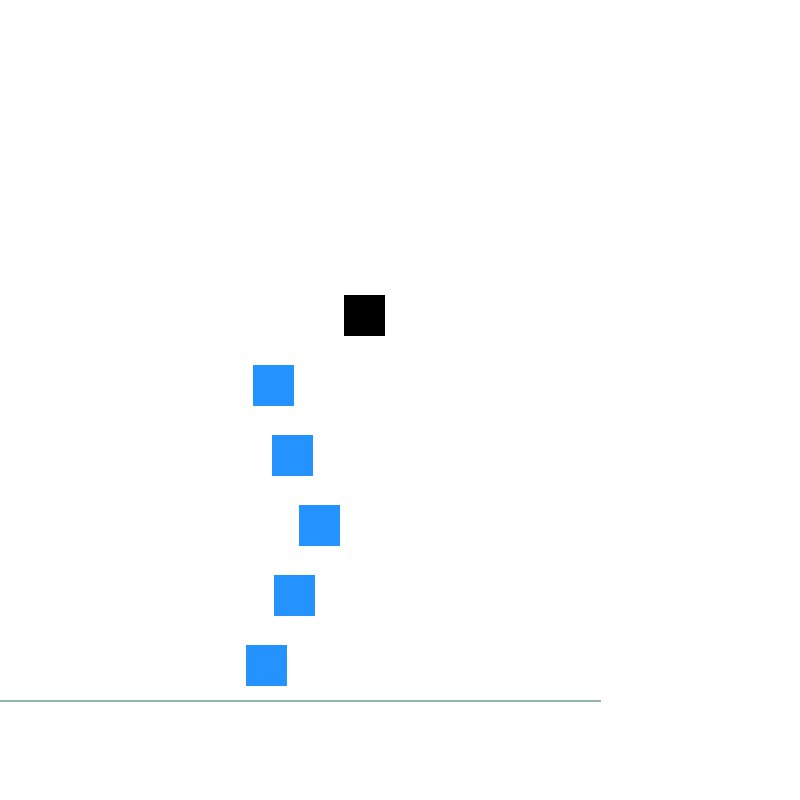

T


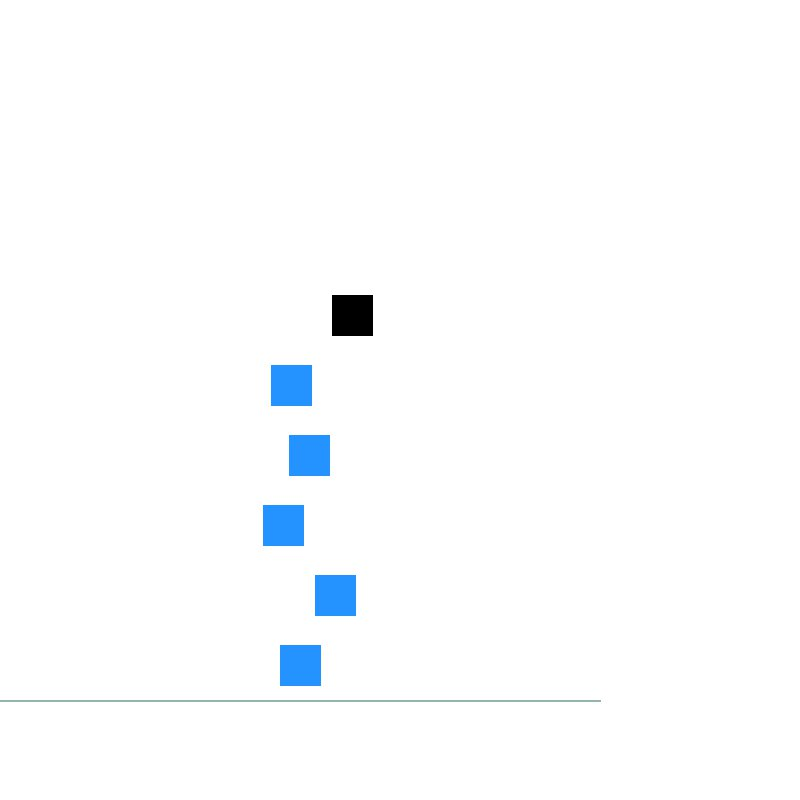

T


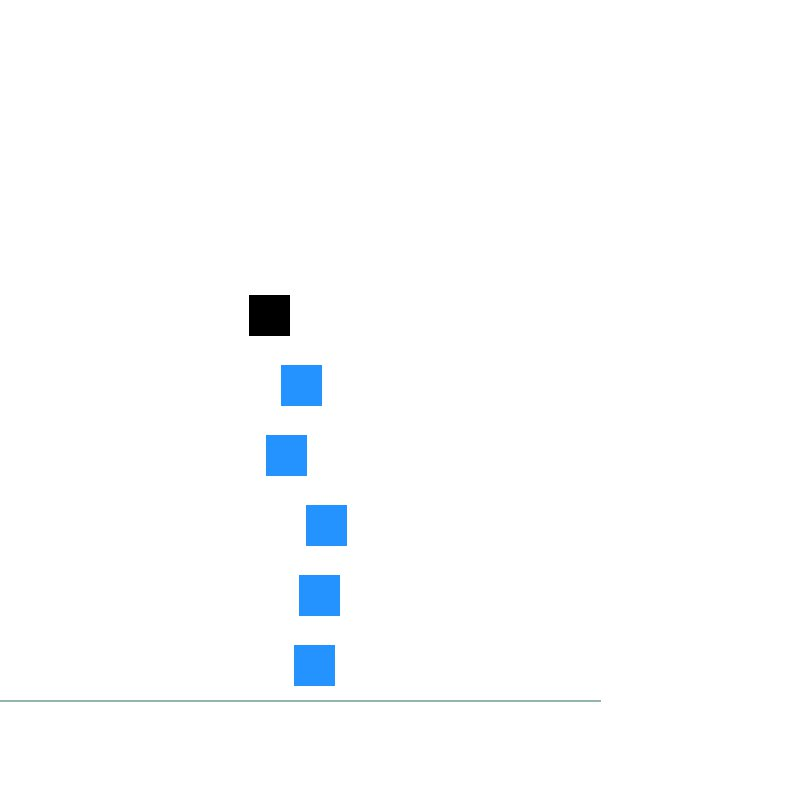

T


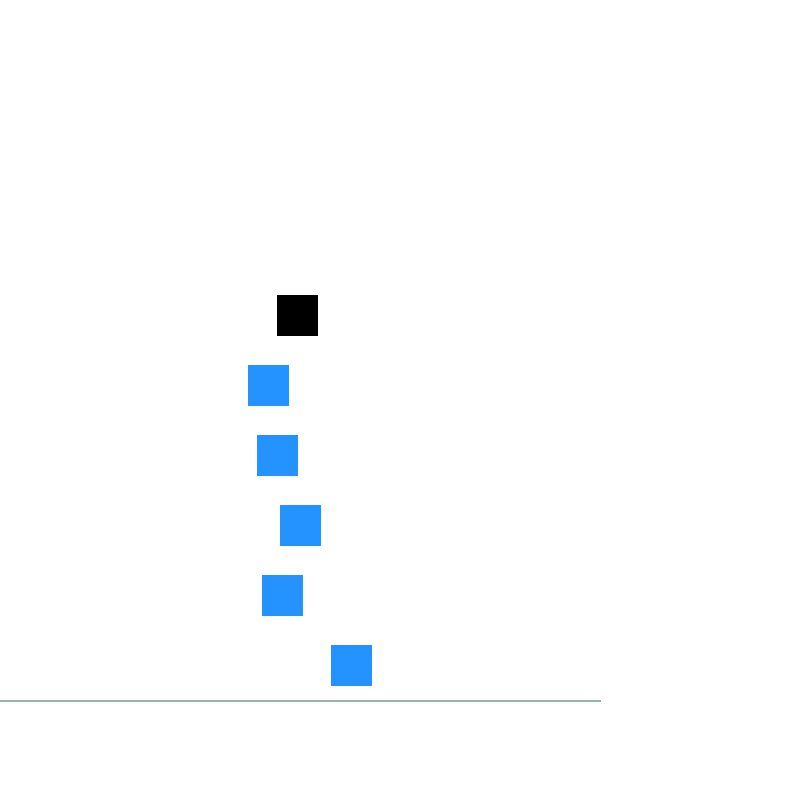

F


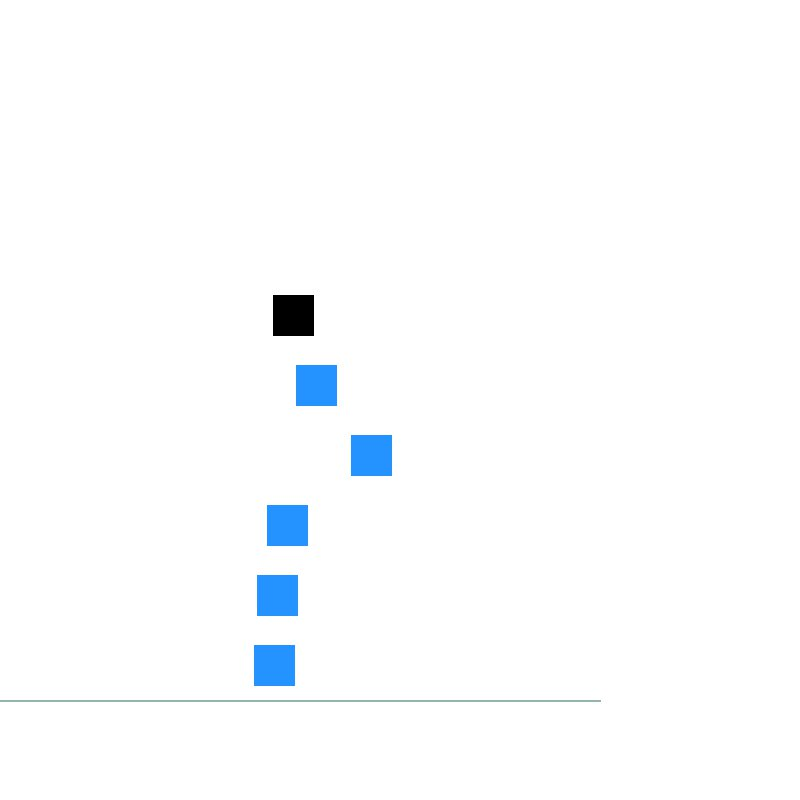

F


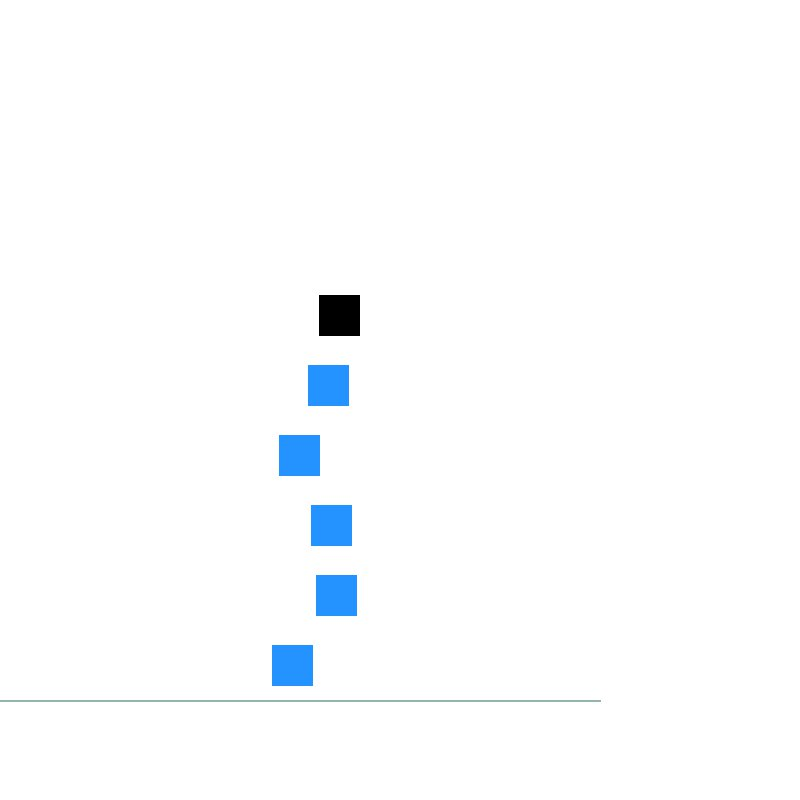

F


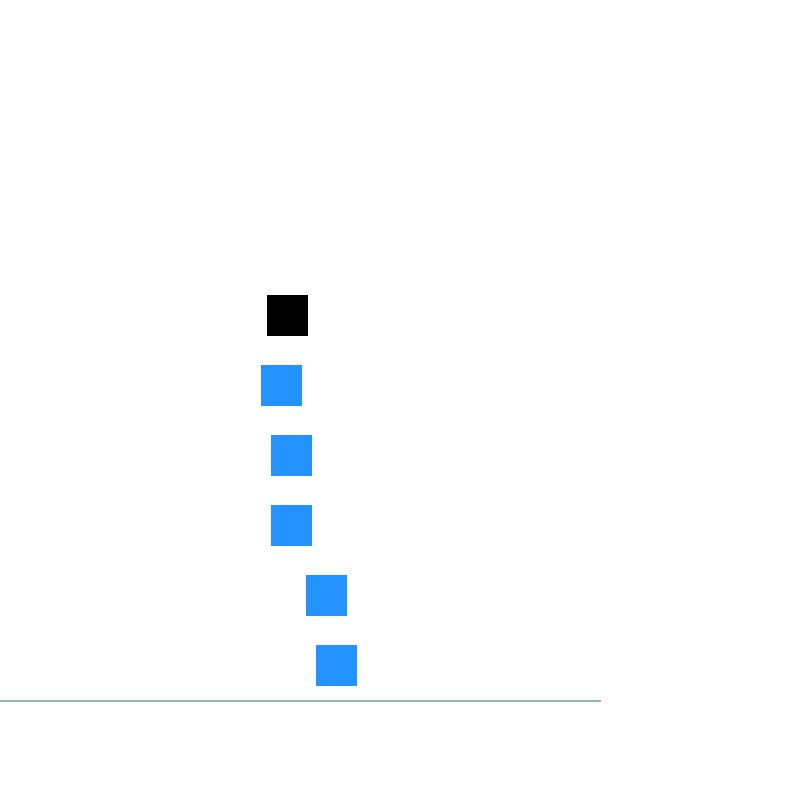

F


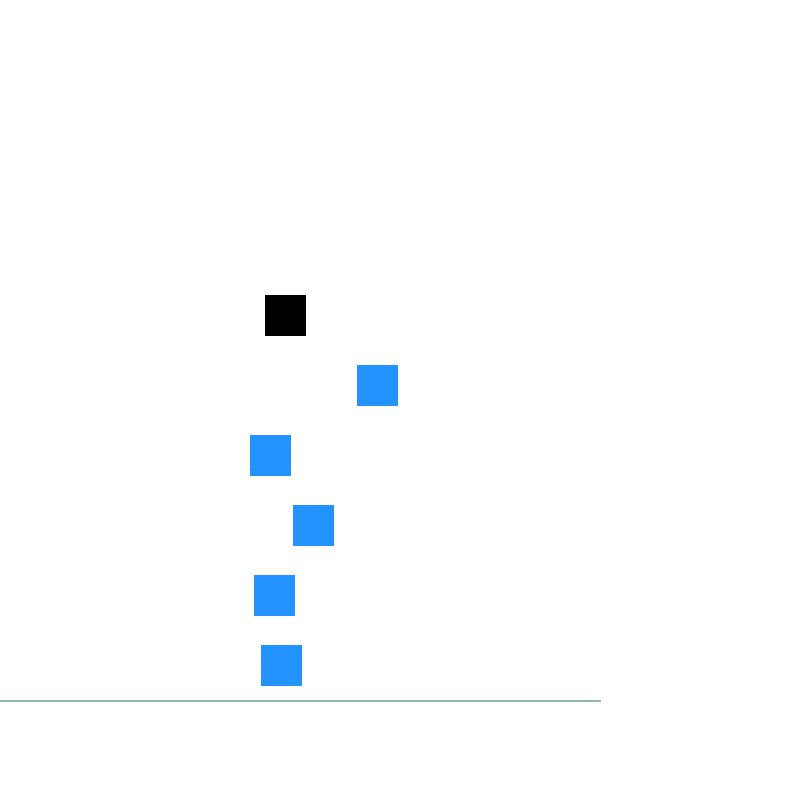

F


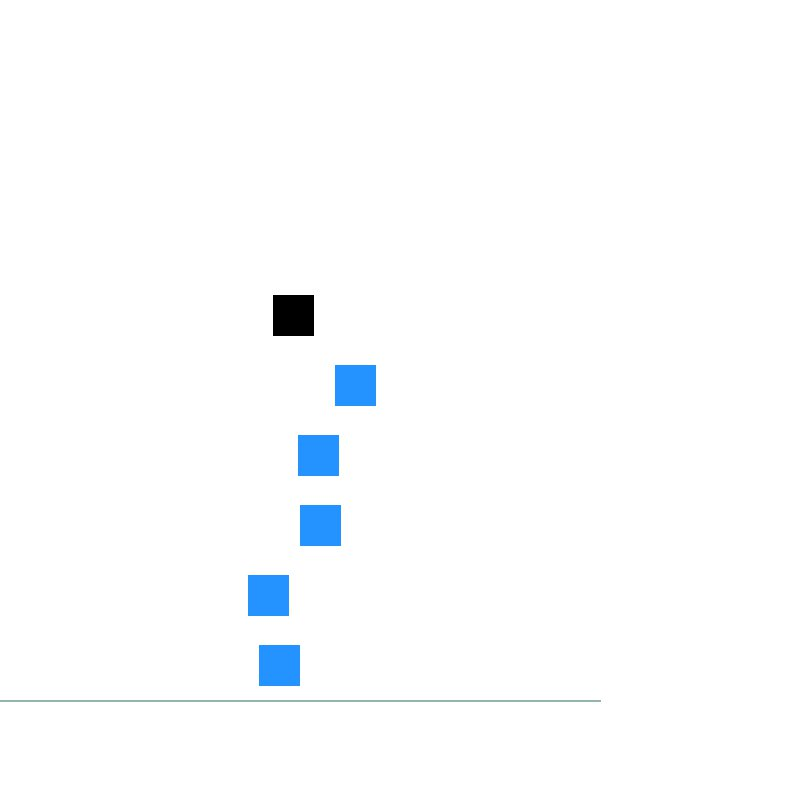

F


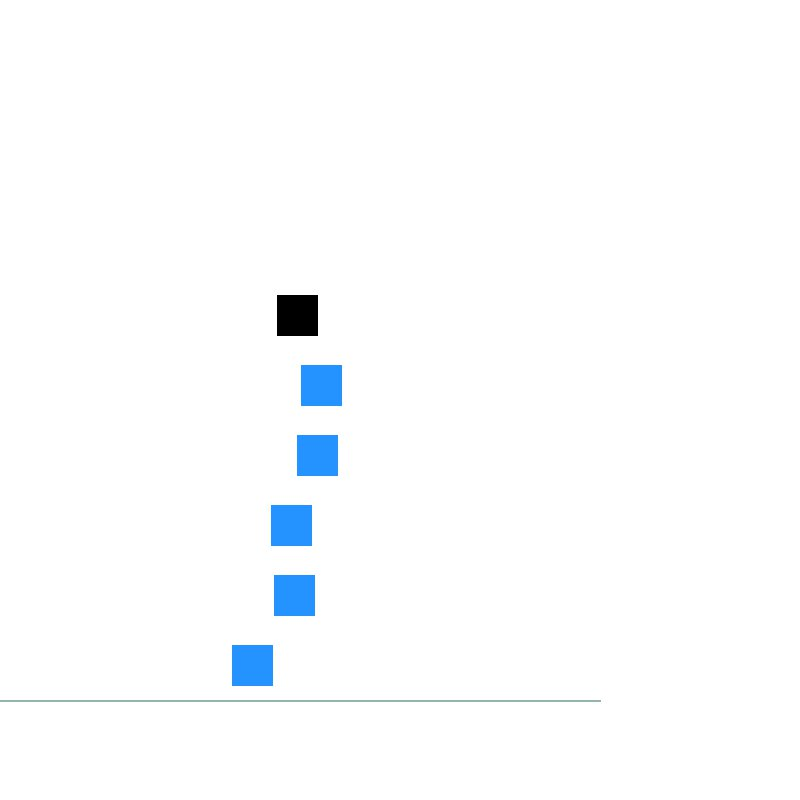

F


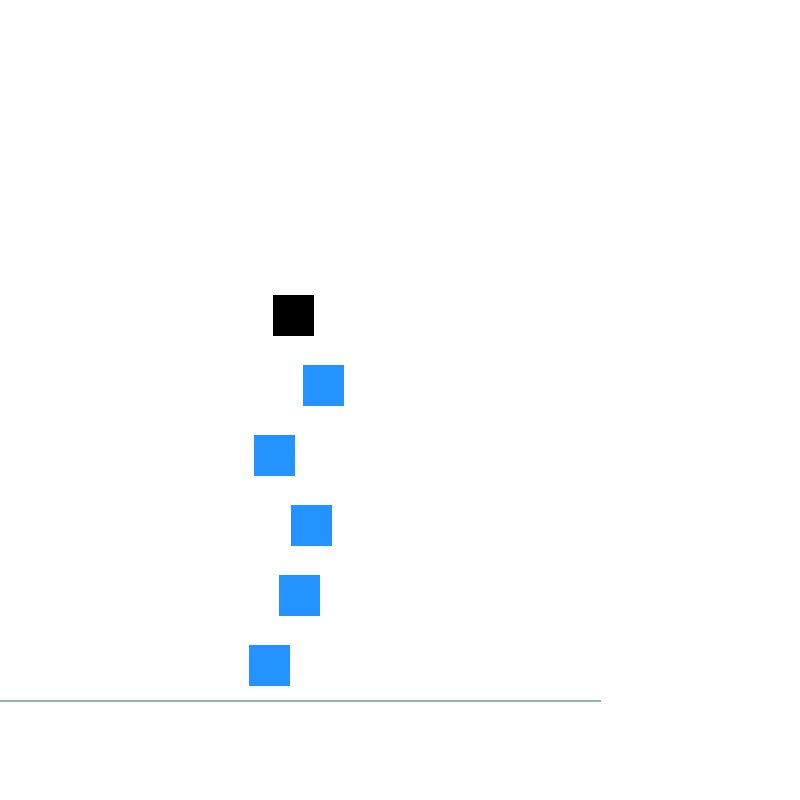

F


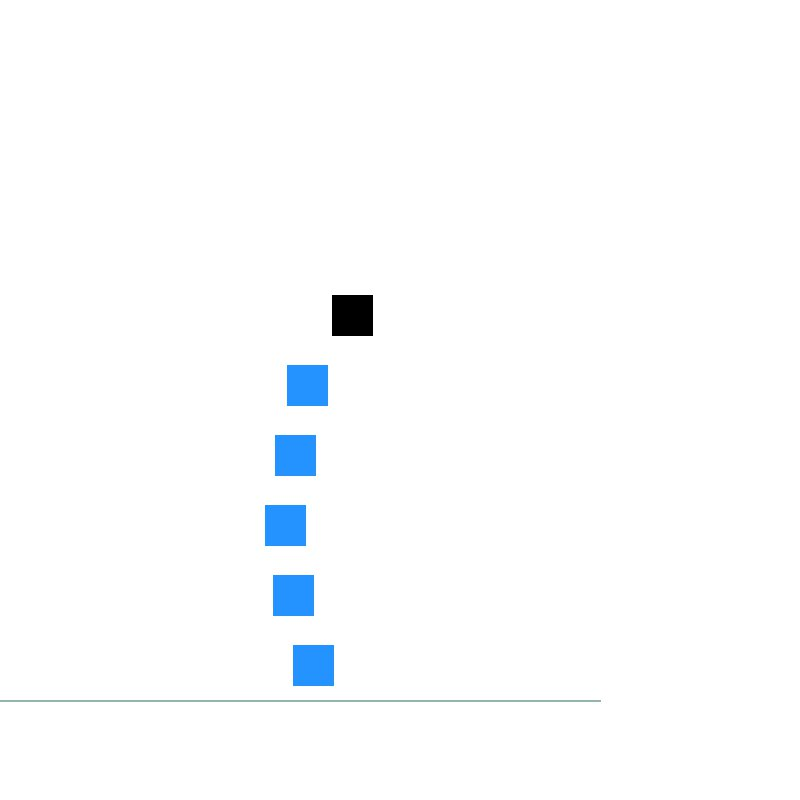

T


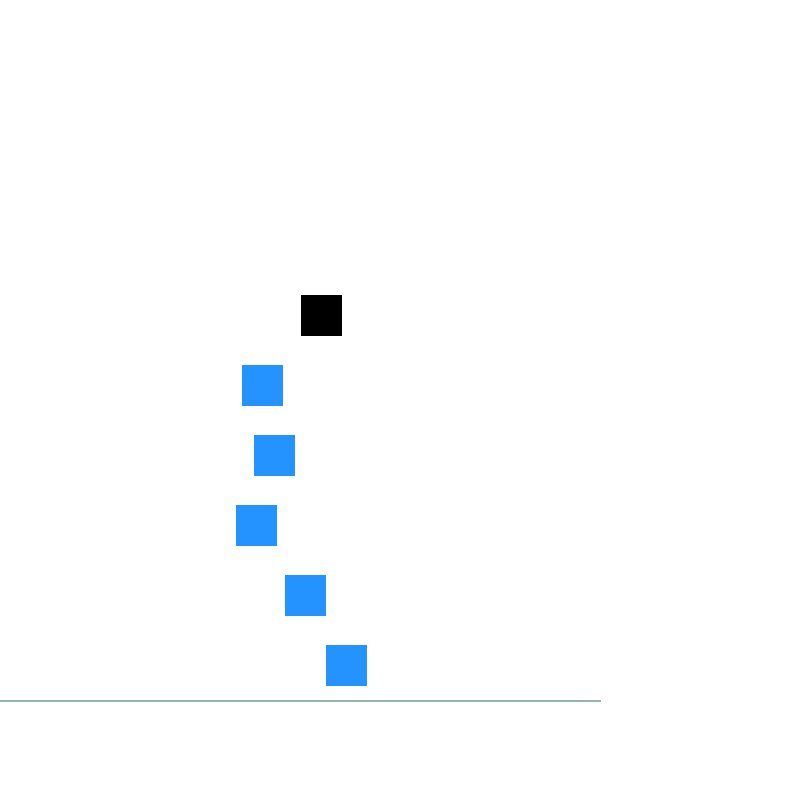

F


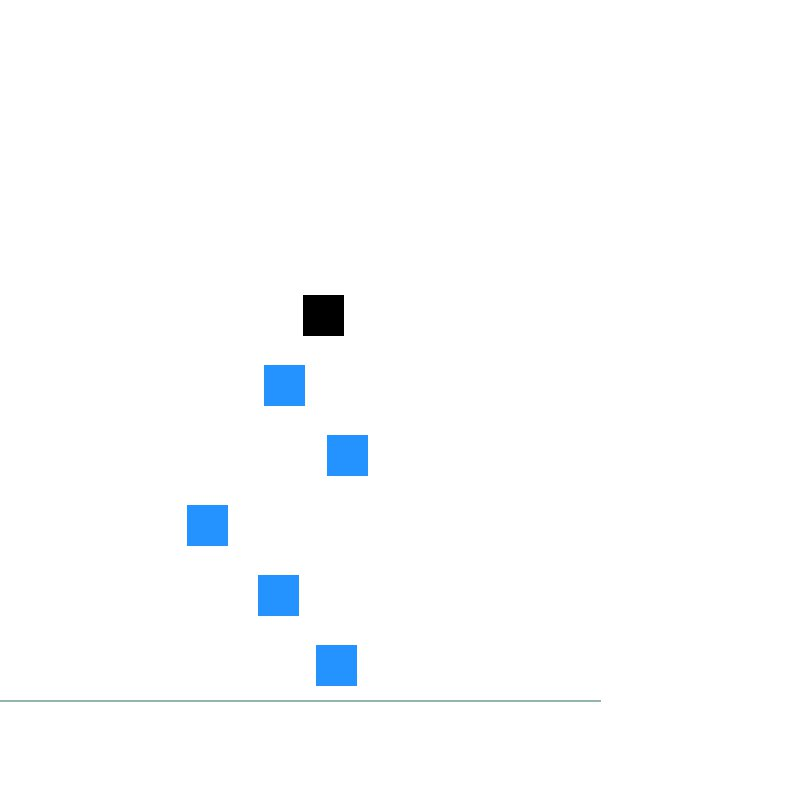

F


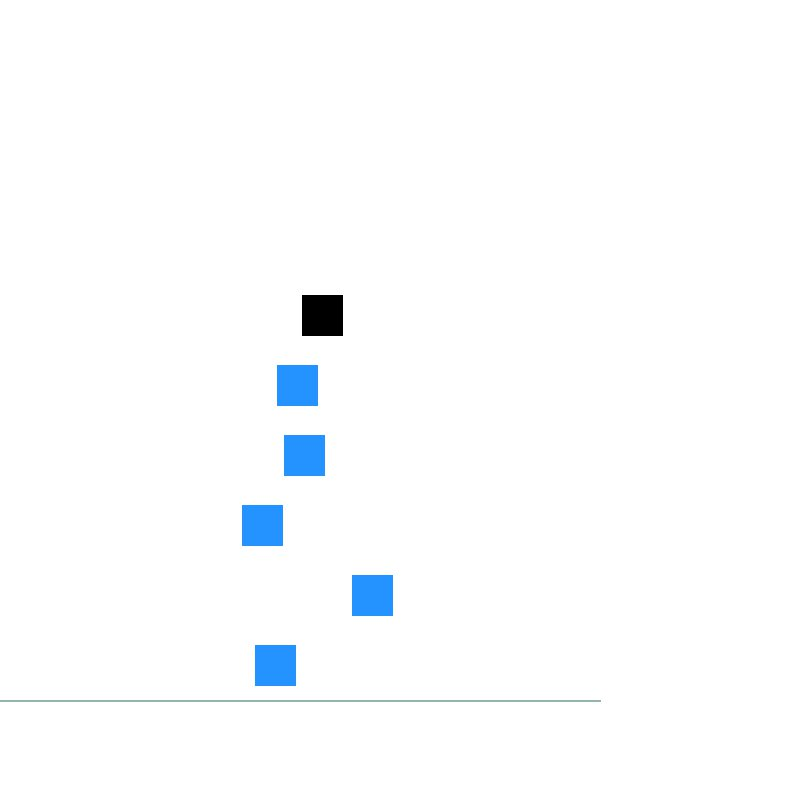

F


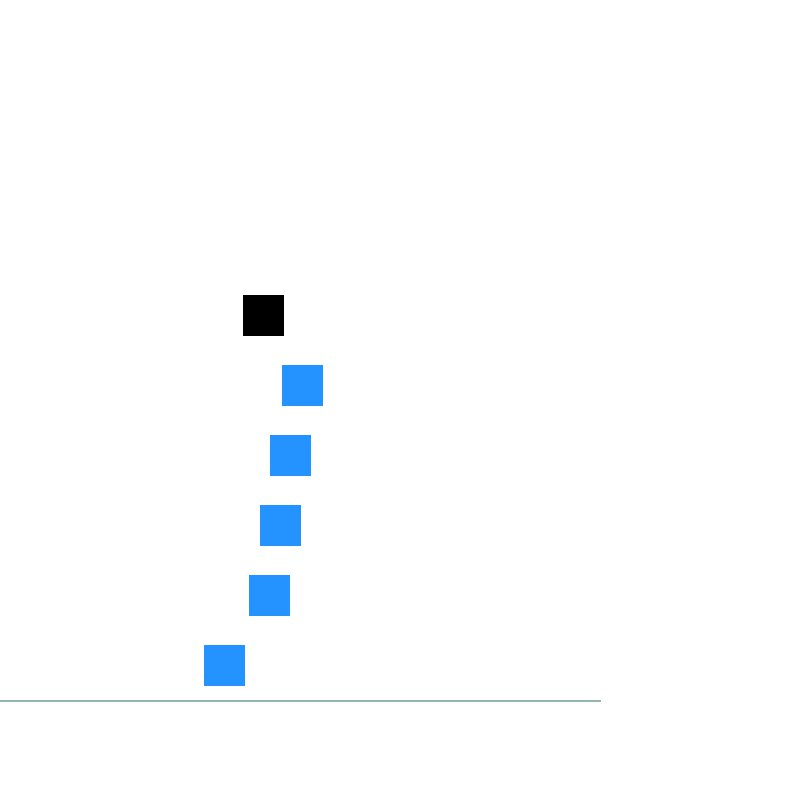

F


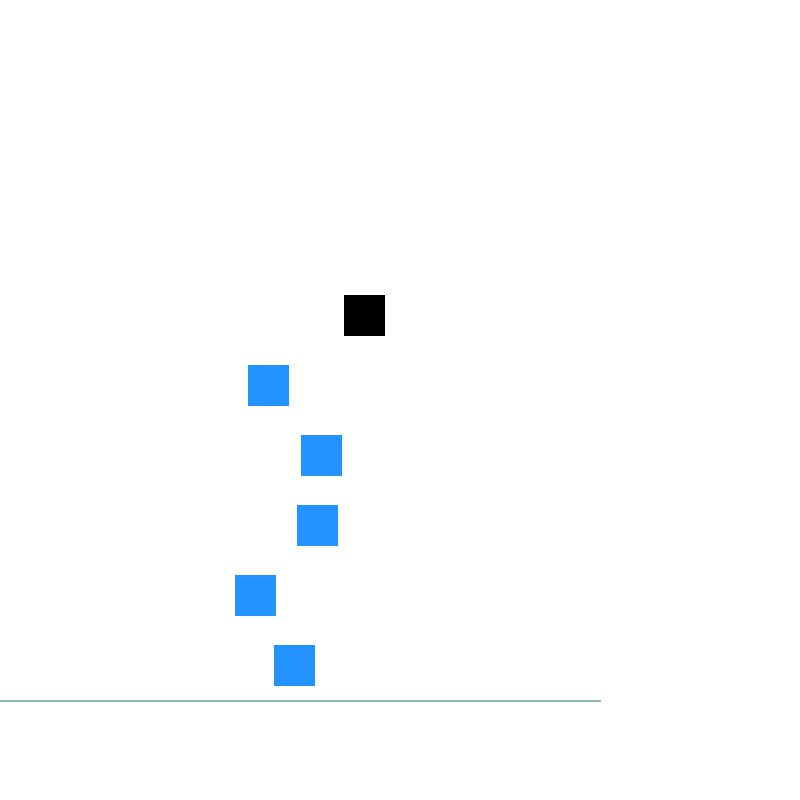

T


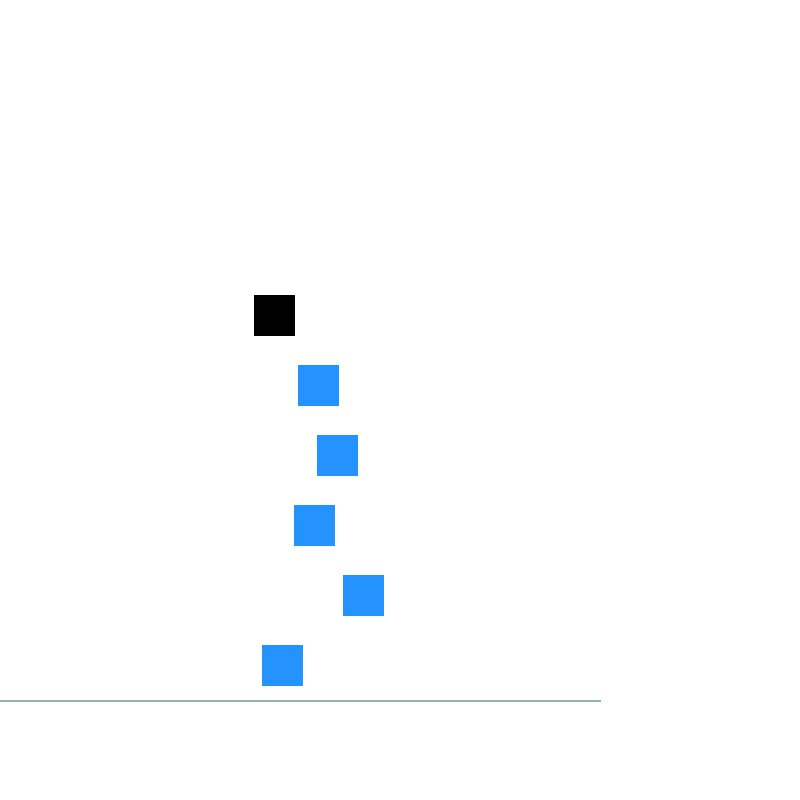

F


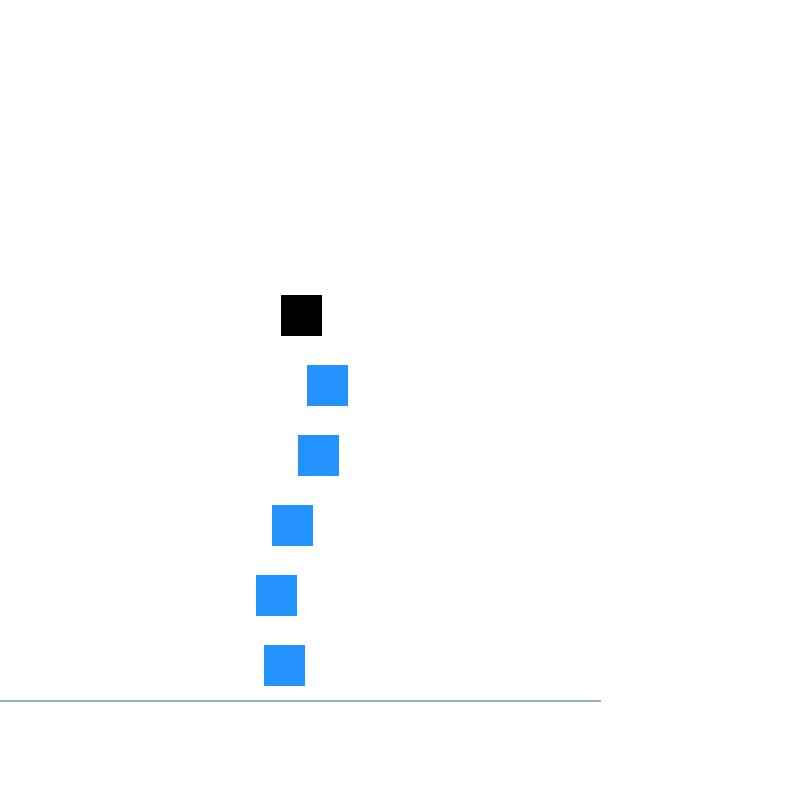

F


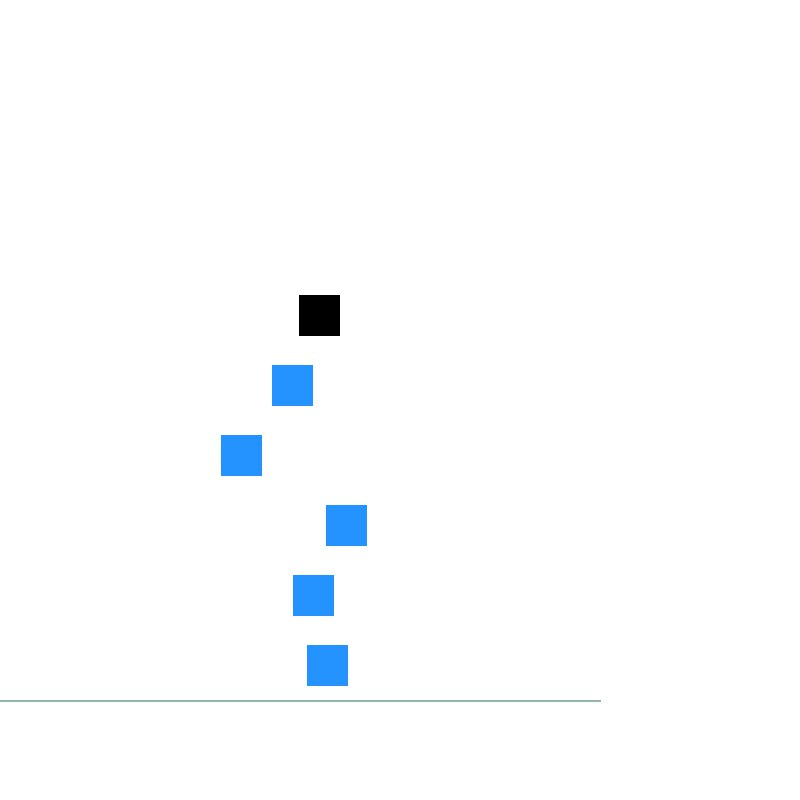

F


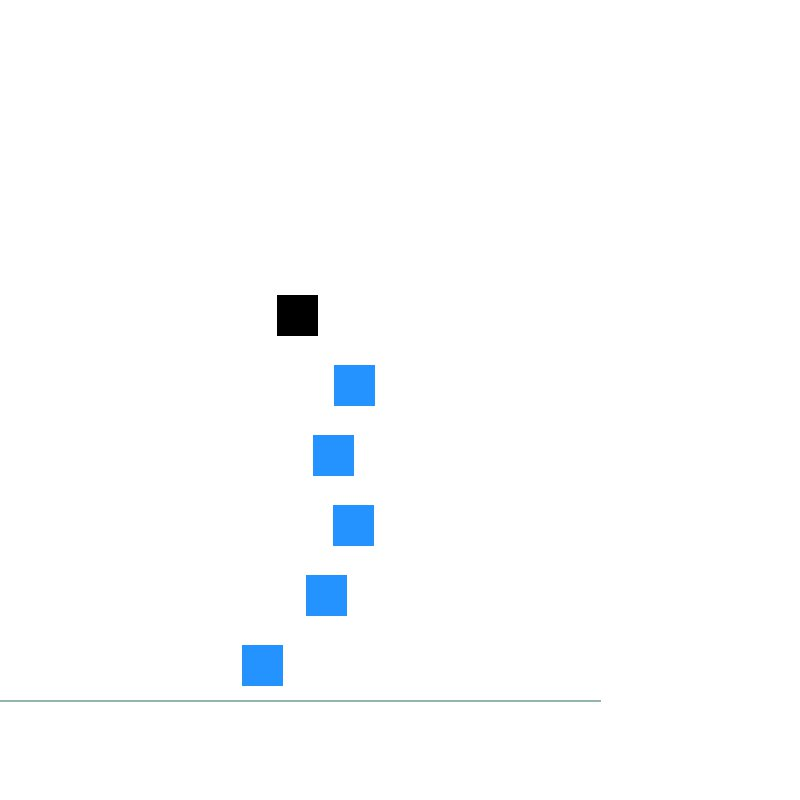

F


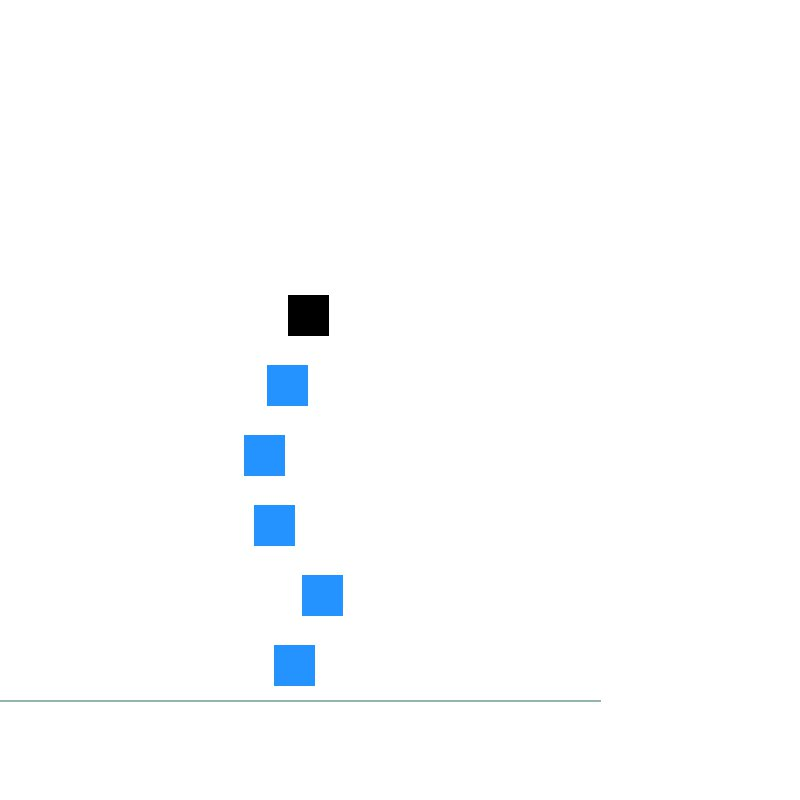

F


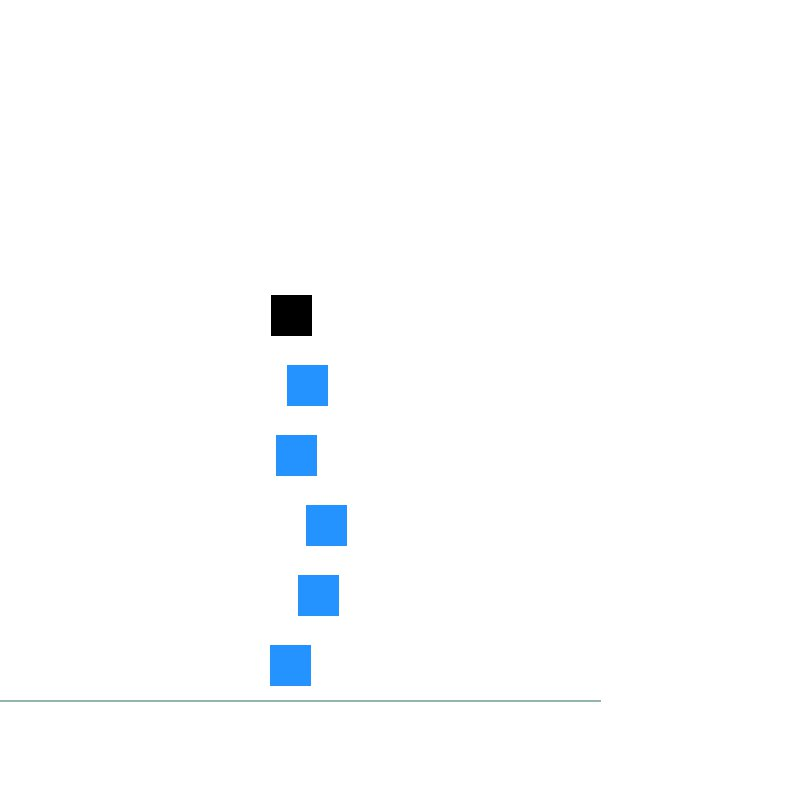

F


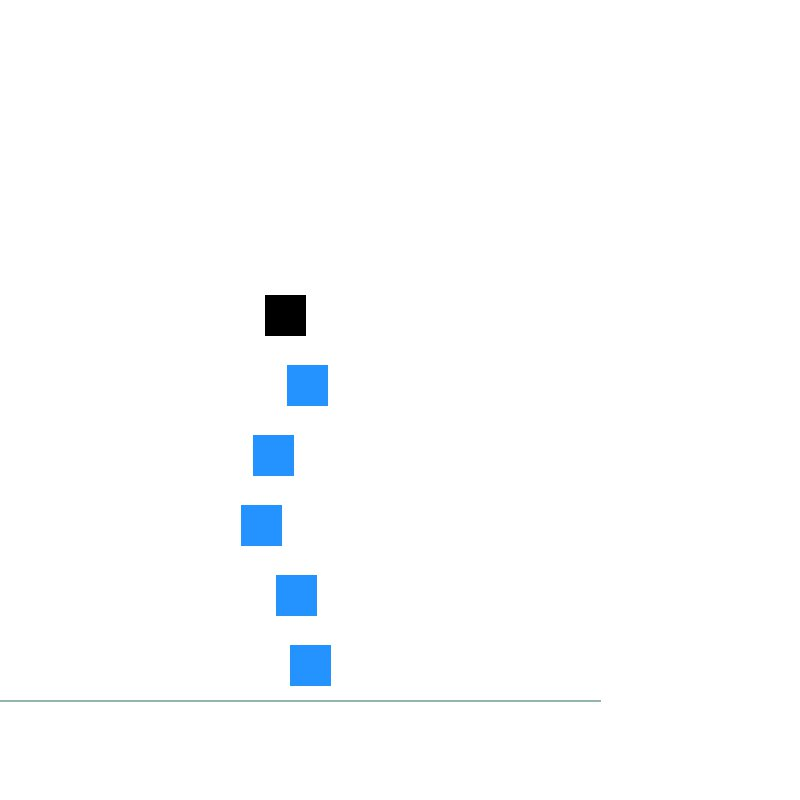

F


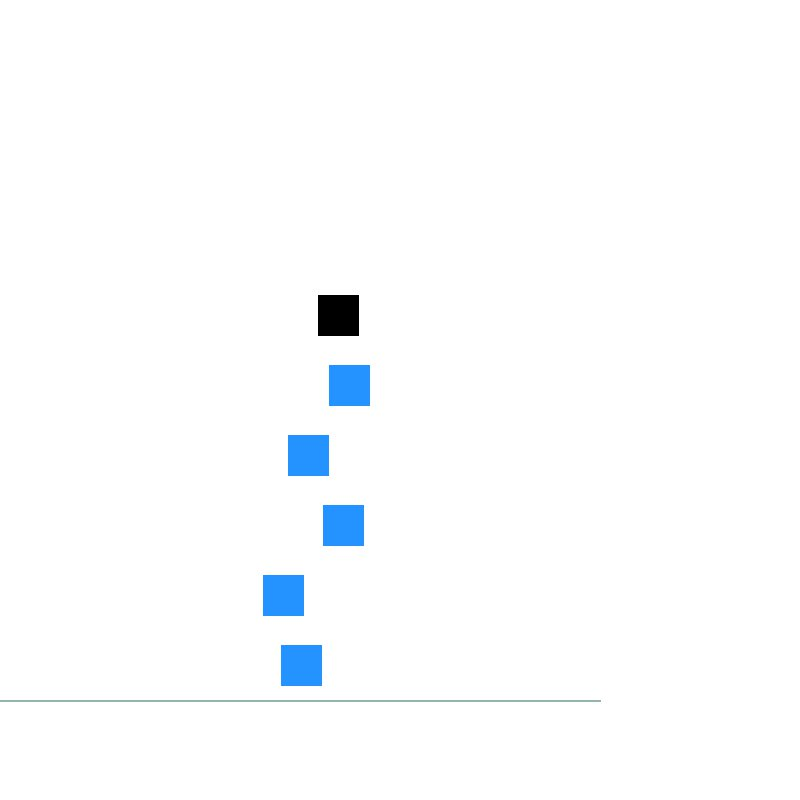

F


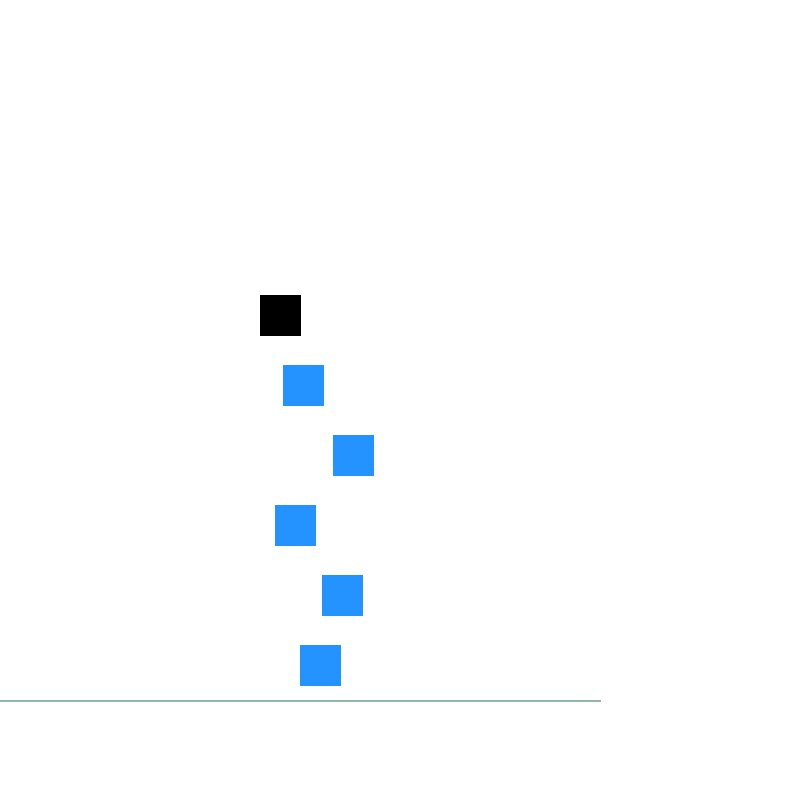

F


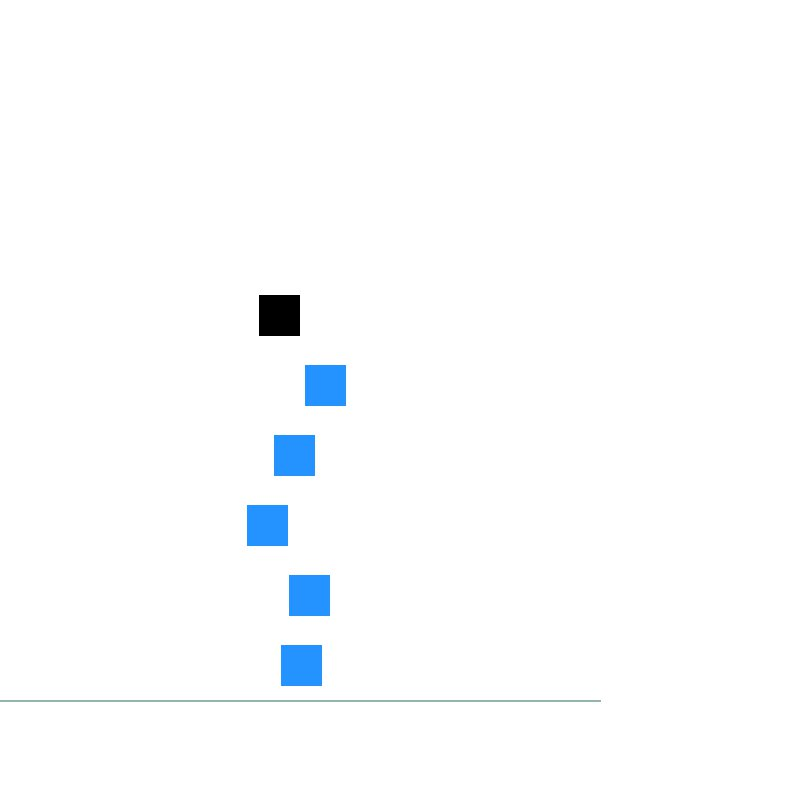

F


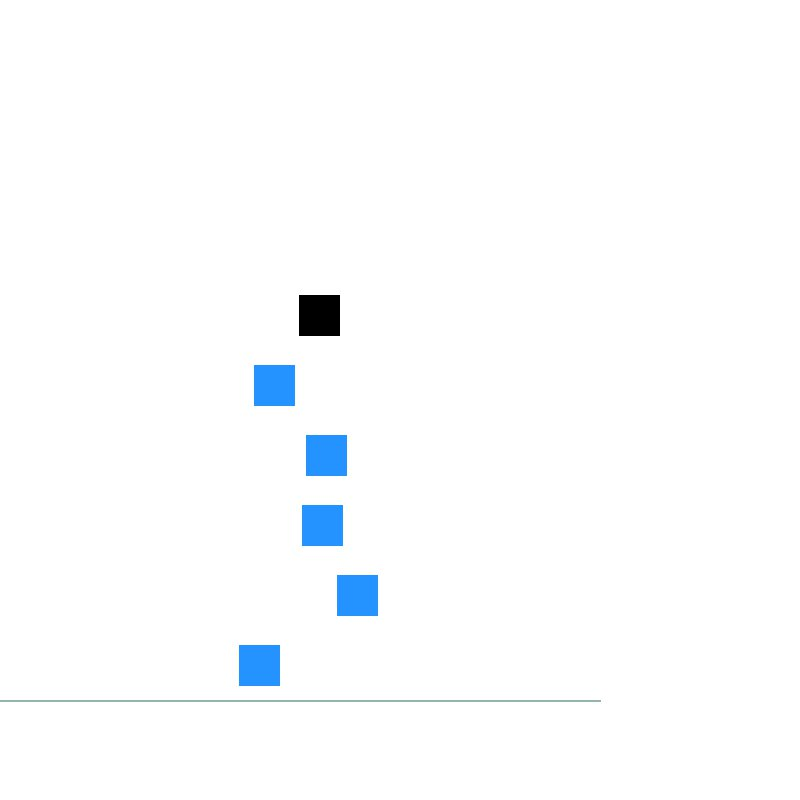

F
[[331.9725107763573, 313.75745859728033, 358.8419486319951, 318.9510351987225, 276.5796763384643, 288.1610617182245], ['F', False], [314.717465492153, 307.7335740699151, 303.1436951889623, 287.61232955152934, 299.71072658224955, 297.198311456787], ['T', False], [294.5287524781519, 319.68754910848384, 320.3334435907406, 291.68983171906564, 304.9577788957017, 336.76563666601226], ['T', False], [275.254576984174, 252.62270911442653, 375.20122825483423, 327.5068074336315, 278.4773604428027, 308.9842805773436], ['F', False], [349.6131349016396, 323.6975275457869, 381.16826124285166, 295.72521995890787, 333.0383434399587, 296.3293375849667], ['F', False], [297.1767168196274, 333.7372977252507, 303.8795408863866, 296.59525060694693, 264.2633522686016, 267.94143177903373], ['F', False], [340.66161569664547, 267.9545862795295, 291.08092232629593, 293.5391300073296, 294.39720391728724, 256.56308594354186], ['T', False], [312.0155776089035, 293.98024192190894, 328.76330565934427, 300.6298458423

In [17]:
#######main code ###########

####Main code has been run once, since it takes too long, I comment it out. We already have data stored in result.csvn
#if __name__ == "__main__":
    # Set up a null pygame video driver
    #import os
    #os.environ['SDL_VIDEODRIVER']='dummy'

    #from IPython.display import Image # required for showing the image
    #result=trial(200)

In [23]:
#with open('result.csv', 'w') as csvFile:
    #writer = csv.writer(csvFile)
    #writer.writerows(result)
#csvFile.close()

In [75]:
with open('result.csv', 'r') as f:
  reader = csv.reader(f,delimiter=',')
  result = list(reader)

In [93]:
#extract 200 initial positions from Q1
positions_200= [result[i] for i in range(0,len(result)) if i%2==0 ]
positions_200=[[float(j) for j in i] for i in positions_200]

In [111]:
#extract 200 initial responses from Q1
responses_200= [result[i] for i in range(0,len(result)) if i%2!=0 ]  
responses_200=[i[0:2] for i in responses_200]
responses_200=[[distutils.util.strtobool(j) for j in i] for i in responses_200]

In [120]:
responses_200

1

In [117]:
#2. Now you should write code that will load your saved positions and use the
#BlockTower.simulate() method to generate predictions from a noisy physics model. For this, assume
#that the noise is normal with a SD of S=10 (pixels) on the recorded starting positions from Q1, What would a “good” model of you look like in this plot.
def avg_prediction(position,s): #initial positions from Q1
    sum=0
    for i in range(0,100): 
        noise = np.random.normal(0,s,6)
        position=position+noise
        bt=BlockTower(position)
        if bt.simulate()==True:
            sum+=1
    score=sum/100
    return score
   

In [143]:
#group them and get my reponses for each group
def group_and_plot(score,response):
    count=np.zeros(10)
    re=np.zeros(10)
    for i in range(0,200):
        if score[i]>0 and score[i]<=0.1:
            count[0]+=1
            re[0]+=response[i][0]
        elif score[i]>0.1 and score[i]<=0.2:
            count[1]+=1
            re[1]+=response[i][0]
        elif score[i]>0.2 and score[i]<=0.3:
            count[2]+=1
            re[1]+=response[i][0]
        elif score[i]>0.3 and score[i]<=0.4:
            count[3]+=1
            re[3]+=response[i][0]
        elif score[i]>0.4 and score[i]<=0.5:
            count[4]+=1
            re[4]+=response[i][0]
        elif score[i]>0.5 and score[i]<=0.6:
            count[5]+=1
            re[5]+=response[i][0]
        elif score[i]>0.6 and score[i]<=0.7:
            count[6]+=1
            re[6]+=response[i][0]
        elif score[i]>0.7 and score[i]<=0.8:
            count[7]+=1
            re[7]+=response[i][0]
        elif score[i]>0.8 and score[i]<=0.9:
            count[8]+=1
            re[8]+=response[i][0]
        else:
            count[9]+=1
            re[9]+=response[i][0]
            
    y1=count
    y2=re
    plt.hist(y1)
    plt.hist(y2)
    plt.show()
    return y1
#A good model means that in each group, my predictions will be highly aligned with the score in each decile. Which indicate that the simulation 
#matches human responses and captures human reponses well enough. 

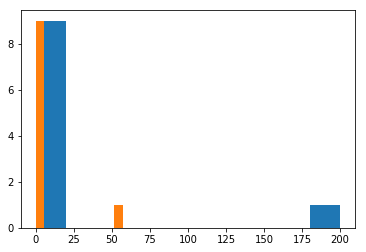

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [133]:
score_200_s10=[]
for i in positions_200:
    score_200_s10.append(avg_prediction(i,10))
group_and_plot(score_200_s10,responses_200)

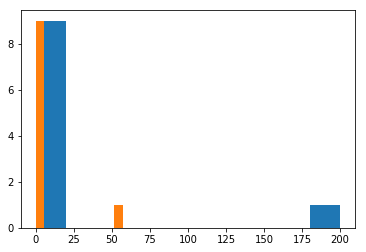

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [134]:
#3. Plot Q2 for S=1, 5, 10, 15, 20, 50, 100. How do you determine which S value matches best to
#your responses and what is the value of S? How well does the best S value match with your responses?
#If no value works well, come up with a hypothesis as to how people may be thinking about it
#differently than the model, based on patterns you see in the plots.
s=1
score_200_s1=[]
for i in positions_200:
    score_200_s1.append(avg_prediction(i,1))
group_and_plot(score_200_s1,responses_200)

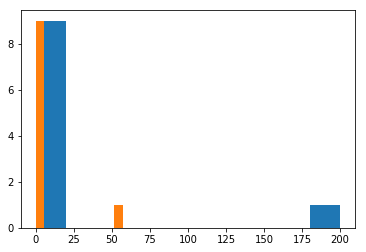

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [142]:
s=5
score_200_s5=[]
for i in positions_200:
    score_200_s5.append(avg_prediction(i,5))
group_and_plot(score_200_s5,responses_200)

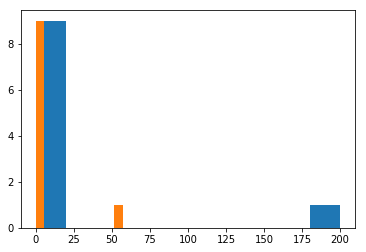

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [141]:
s=15
score_200_s15=[]
for i in positions_200:
    score_200_s15.append(avg_prediction(i,15))
group_and_plot(score_200_s15,responses_200)

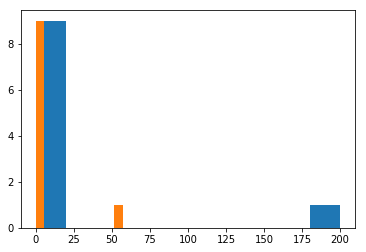

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [139]:
s=20
score_200_s20=[]
for i in positions_200:
    score_200_s20.append(avg_prediction(i,20))
group_and_plot(score_200_s20,responses_200)

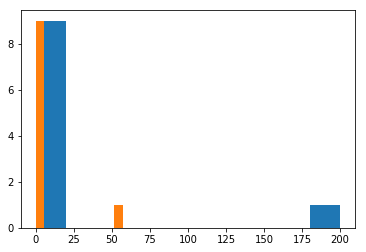

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [140]:
s=50
score_200_s50=[]
for i in positions_200:
    score_200_s50.append(avg_prediction(i,50))
group_and_plot(score_200_s50,responses_200)

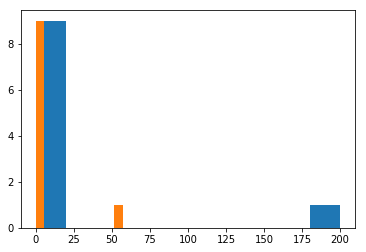

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.])

In [138]:
s=100
score_200_s100=[]
for i in positions_200:
    score_200_s100.append(avg_prediction(i,100))
group_and_plot(score_200_s100,responses_200)

In [ ]:
#which value works the best? If no value works the best, come up with a hypothesis about how people simulate.
#It seems that with the randomness, all value noises have similar performances.

In [ ]:
#4.pick 50% slot data from Q2, and show friends. Record mean response and see if it matches with the average prediction. 
#I picked 20 plots and have 2 friends respond. Most of them have no idea if the blockTower wiil fall on floor. Thus most of the responses are based 
#on guesses. 
#Records: T F F T F F F T T F F F T F F F F T F T 
 #            F T T F F T F F F T T F F T F T F F T F
#To conclude, the result matches the average prediction. 